# Problem Statement

An insurance company started a new insurance policy in the recent past. The company has launched a direct marketing campaign to expand its policy holder base. To this end the company sends one of its staff members to personally interact with potential customers likely to buy the insurance in an effort to convert her/him to a new policyholder.
 
The company wants to use predictive analytics to predict whether a person would buy its insurance product. If the prediction is “Yes” the person will be probed and if the prediction is “No” the person will not be probed. It may be assumed that the awareness level of the prospective customers about the product is such that no person would buy the product unless probed. Needless to mention, a person may or may not buy the product even after probing.

# Assignment

The dataset of 2000 records with labelled data and 500 records with target label missing and the Data dictionary that explains all 84 attributes in a record have been uploaded. Build a classification model that would maximize the profit on a test data set.

# Submission format and Evaluation

* A csv file containing the results (Policy bought or not) of the Test set in the same order (2001-2500)
* A one-page report in pdf format containing the final attributes of the dataset you retained for modeling, the modeling method you chose, and the parameters of the model (attributes retained for modeling etc) with brief arguments in favor of your decisions on such matters
* The report must contain the misclassification matrix of your final model when applied to Training set & Validation set respectively
* In case of any doubt or lack of clarity in the problem statement or data dictionary, make assumptions that you consider reasonable and go ahead

# Step1: Exploratory Data Analysis

### 1. Configure the options

In [1236]:
options(jupyter.plot_mimetypes = c('text/plain', 'image/png'))
options(warn=-1)

### 1. Load the libraries

In [1237]:
library(lattice)
library(corrplot)
library(rpart)
library(randomForest)
library(e1071)
library(nnet)
library(factoextra)
library(pROC)
library(gdata)

### 3. Load the Dataset

In [1238]:
data <- read.csv('C:/Users/amanur/Documents/HackMe Week 3 Challenge/Data.csv')

In [1239]:
data <- data[,-1]
data$X <- NULL

In [1240]:
head(data)

,Customer.subtype,Number.of.houses,Avg.size.household,Avg.age,Customer.main.type,Protestant,Other.religion,No.religion,Married,Living.together,...,Number.of.private.accident.insurance.policies,Number.of.family.accidents.insurance.policies,Number.of.disability.insurance.policies,Number.of.fire.policies,Number.of.surfboard.policies,Number.of.boat.policies,Number.of.bicycle.policies,Number.of.property.insurance.policies,Number.of.social.security.insurance.policies,OUTCOME
1,Lower class large families,1,3,30-40 years,Family with grown ups,5,1,3,7,0,...,0,0,0,1,0,0,0,0,0,0
2,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,4,1,4,6,2,...,0,0,0,1,0,0,0,0,0,0
3,Mixed small town dwellers,1,2,30-40 years,Family with grown ups,4,2,4,3,2,...,0,0,0,1,0,0,0,0,0,0
4,"Modern, complete families",1,3,40-50 years,Average Family,3,2,4,5,2,...,0,0,0,1,0,0,0,0,0,0
5,Large family farms,1,4,30-40 years,Farmers,4,1,4,7,1,...,0,0,0,1,0,0,0,0,0,0
6,Young and rising,1,2,20-30 years,Living well,5,0,5,0,6,...,0,0,0,0,0,0,0,0,0,0


### Calculate Number of Rows and Columns

In [1241]:
paste("No. of Rows are", dim(data)[1])
paste("No. of Columns are", dim(data)[2])

[1] "No. of Rows are 2500"

[1] "No. of Columns are 85"

### Transform Attributes

In [1242]:
data$Avg.age <- as.integer(data$Avg.age)
data[,grepl('Contribution', names(data))] <- lapply(data[,grepl('Contribution', names(data))] , factor)
data$OUTCOME <- as.factor(data$OUTCOME)
data$Purchasing.power.class <- as.factor(data$Purchasing.power.class)

In [1243]:
Attributes <- c(0,0)
Attributes$name <- as.character(names(data))
for (i in 1:length(Attributes$name)) {Attributes$class[i] <- class(data[,i])}
Attributes <- as.data.frame(Attributes)

### Attribute Dimensions

In [1244]:
summary(Attributes$class)

factor integer 
     25      60

### Separate Attributes as per their Class

In [1245]:
data_factors <- data[,Attributes$class == 'factor']
data_numeric <- data[,Attributes$class == 'integer']

### Plot Correlation Matrix

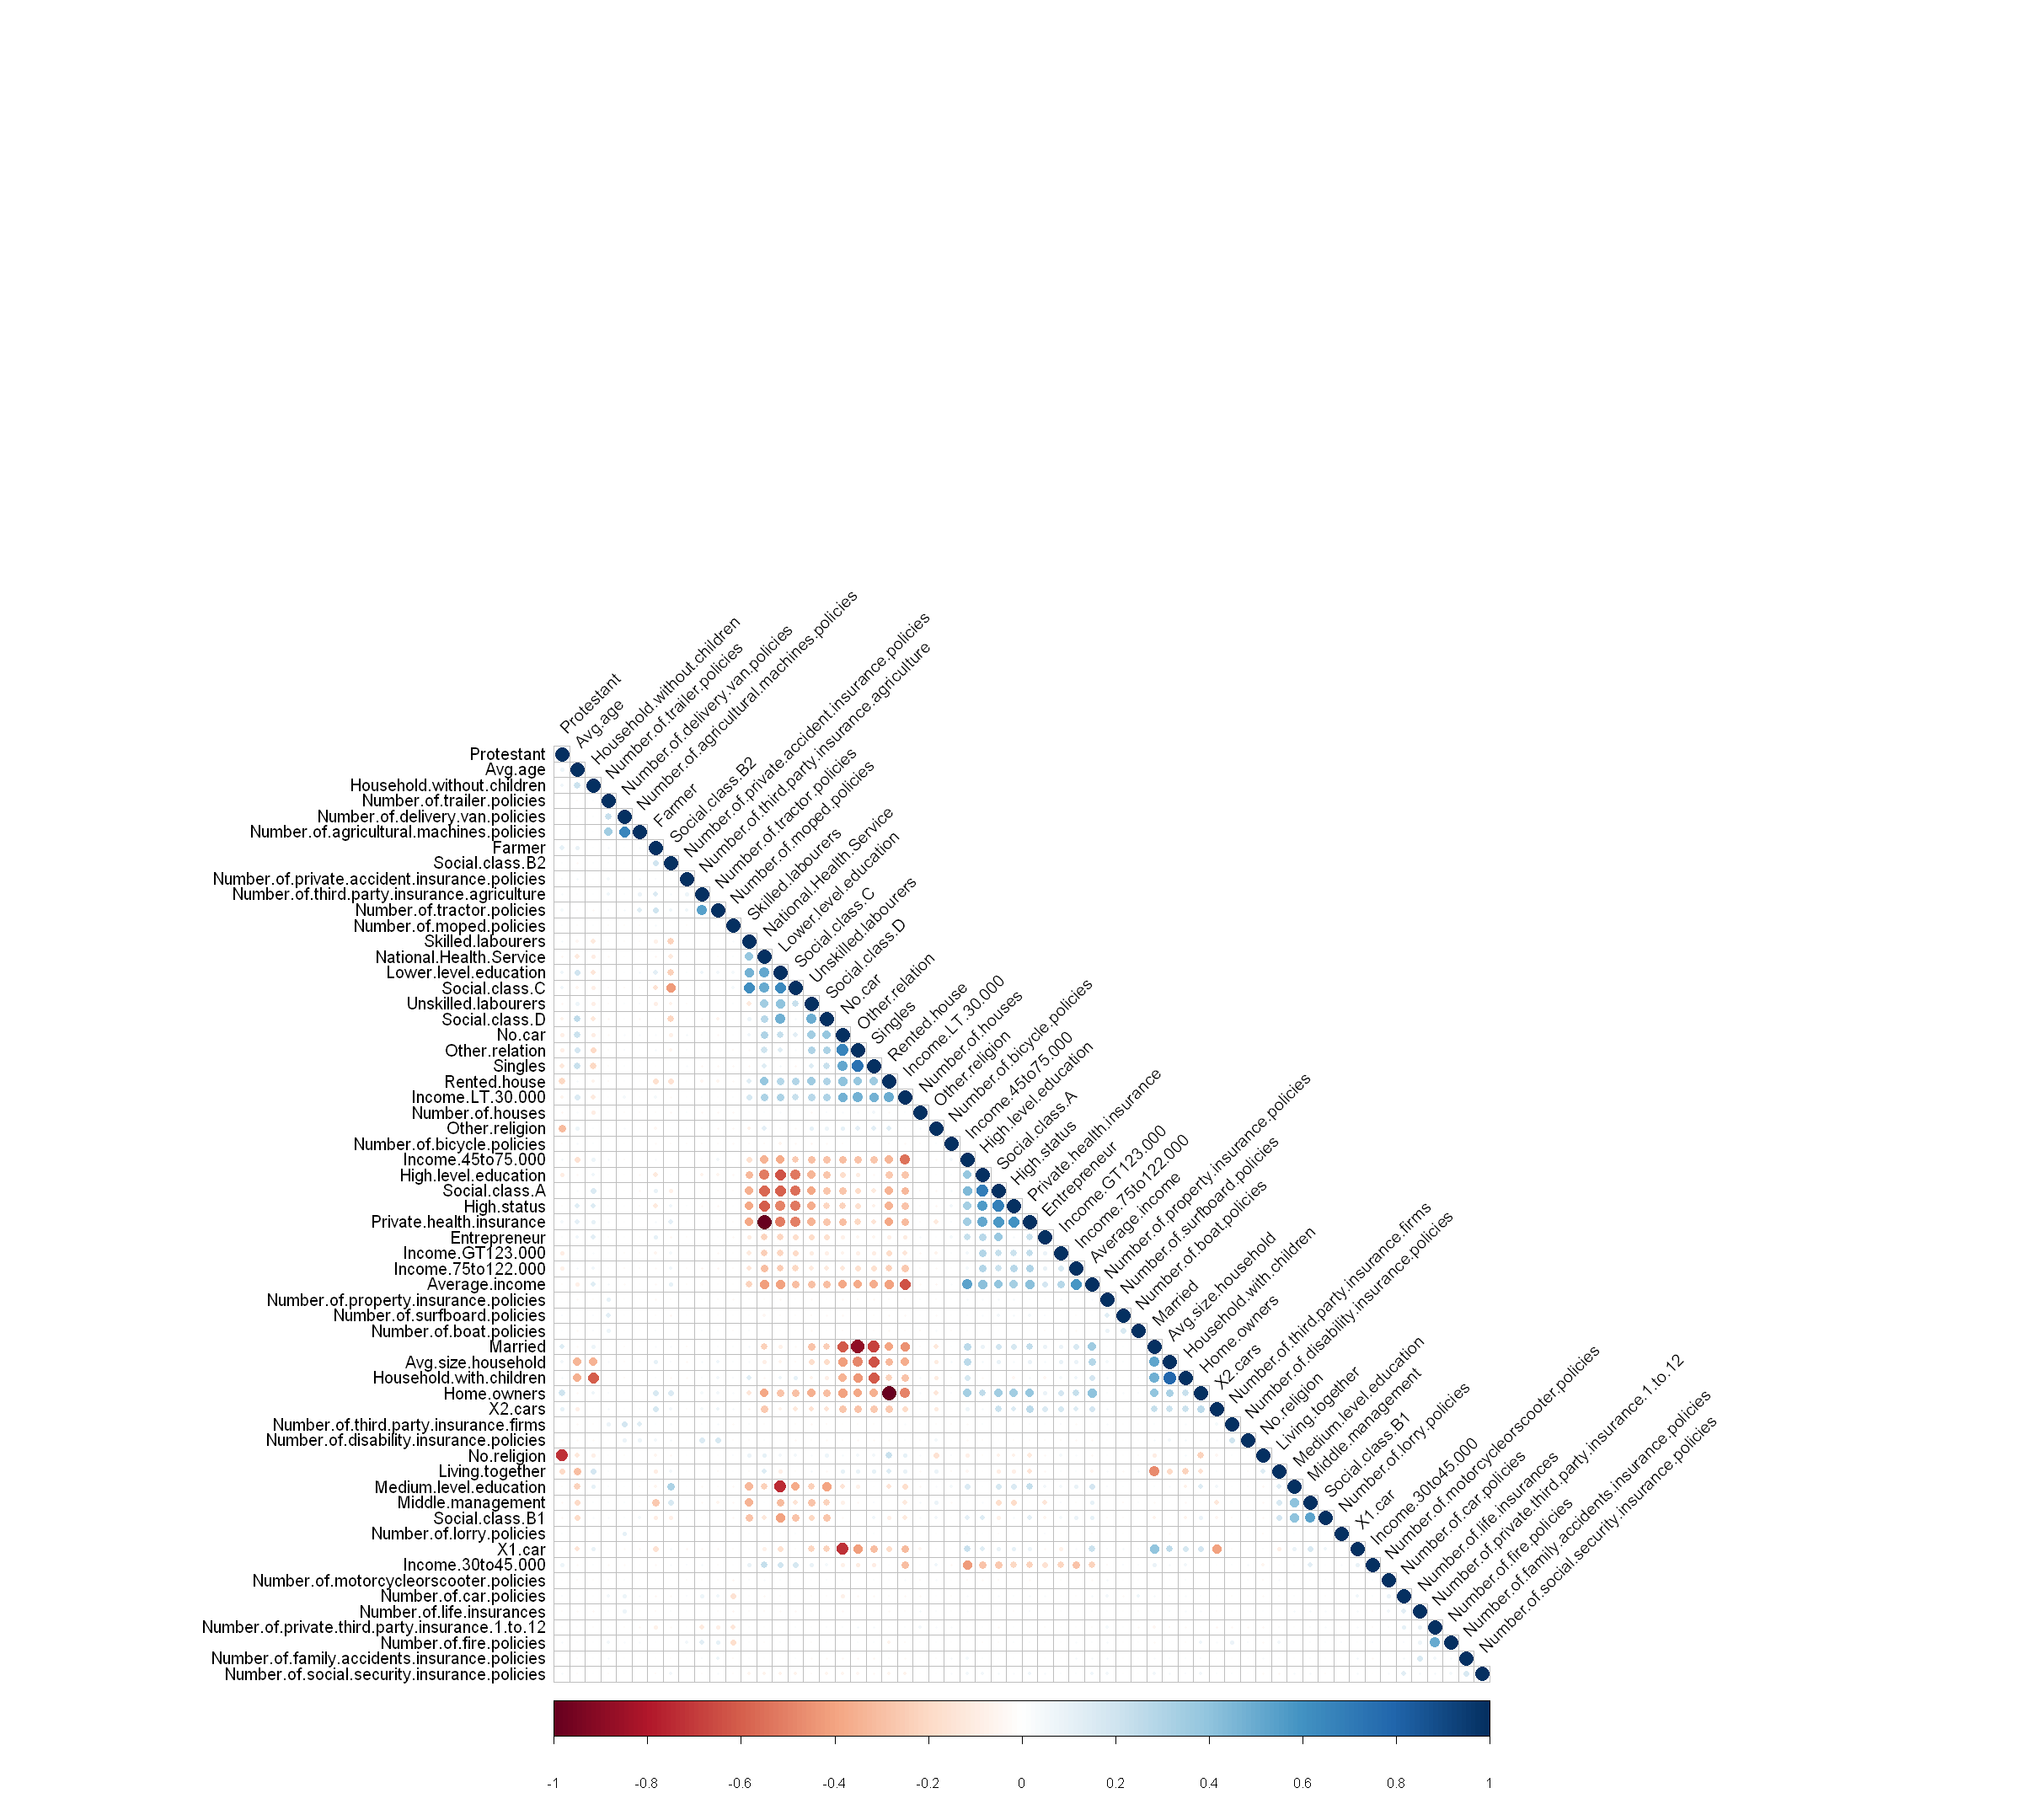

In [1246]:
options(repr.plot.width=20, repr.plot.height=18)
corrplot(cor(numeric), type = "lower", order = "hclust", 
         tl.col = "black", tl.srt = 45)

### Split the Data into Training, Validation and Test Set

In [1247]:
train <- data[1:1500,]
train <- droplevels(train)
validation <- data[1501:2000,]
validation <- droplevels(validation)
test <- data[2001:2500,]
test <- droplevels(test)
train_validation <- data[1:2000,]

### Building Models

#### 1. Include all the Attributes (Benchmark model) 

##### a. Logisitic Model 

###### Build the model

In [1248]:
model5 <- glm(OUTCOME~.,data = train_validation, family=binomial(logit))

###### Get the Predicted outputs

In [1249]:
pred_train <- predict(model5, train, type = "response")

###### Confusion Matrix

In [1250]:
table(train$OUTCOME, pred_train > 0.55, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0  1405    3
     1    73   19

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train, data = train)

Data: pred_train in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.8917

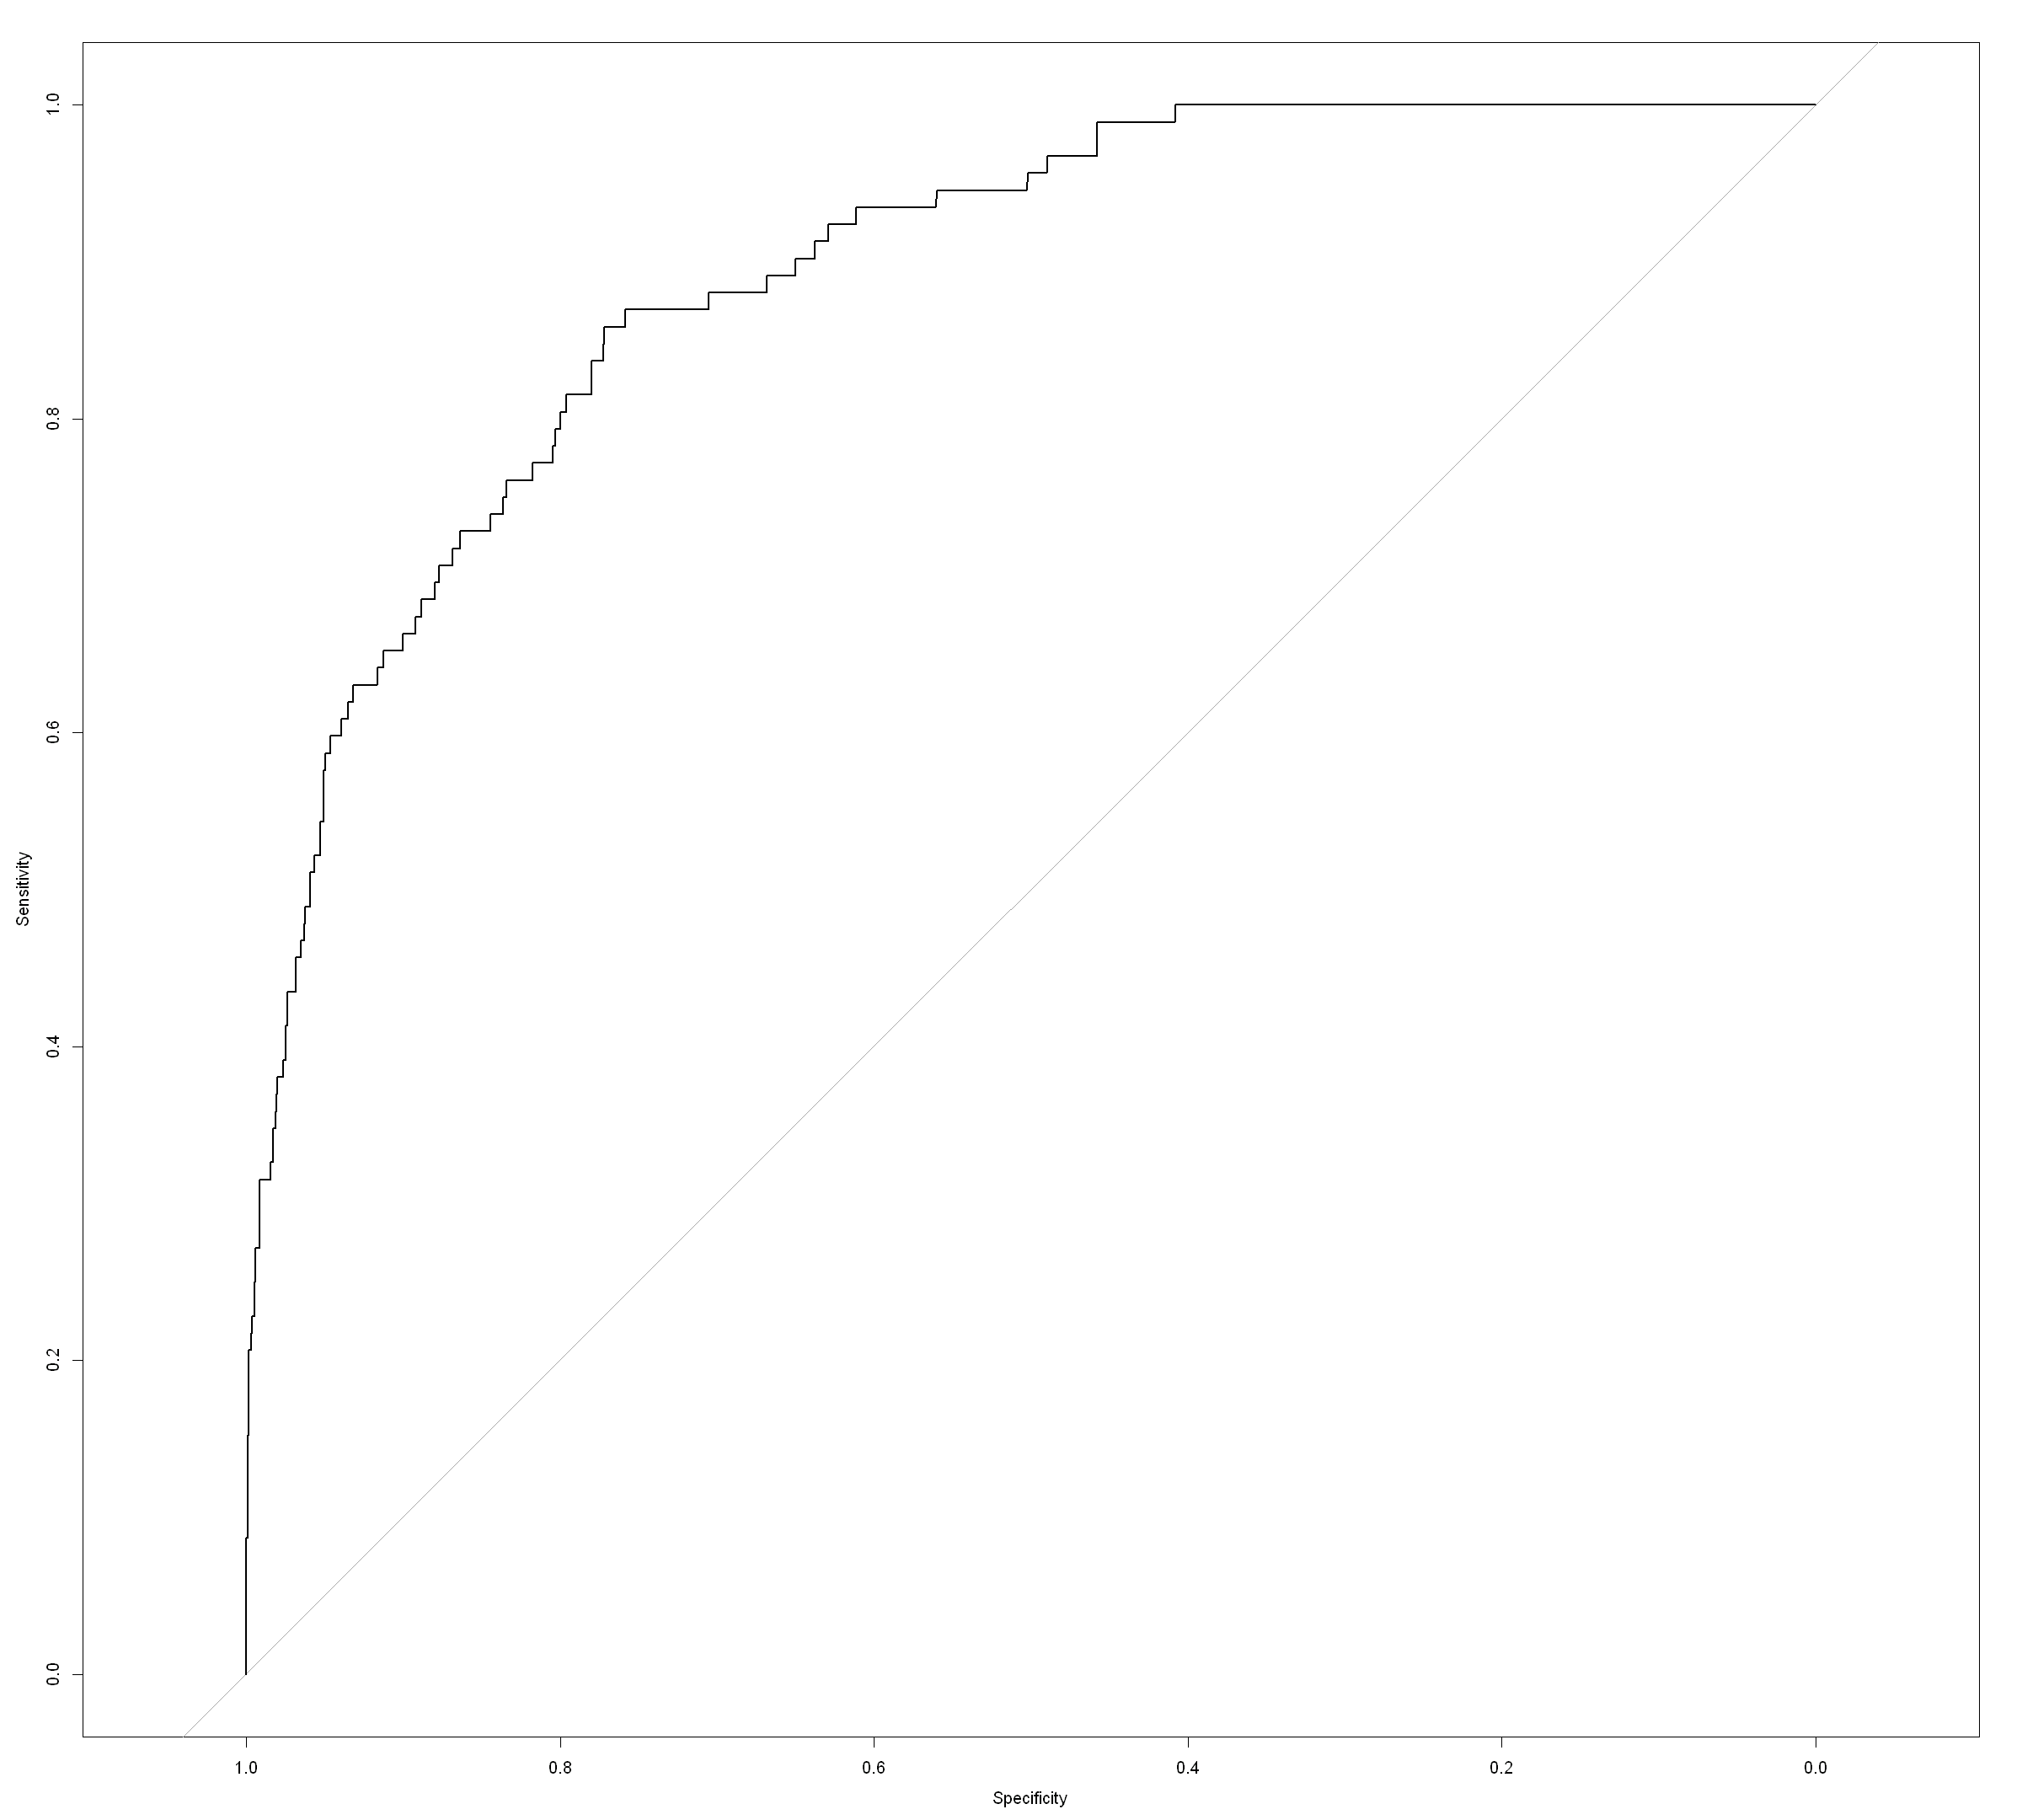

In [1251]:
roc_plot <- roc(OUTCOME ~ pred_train, data = train)
plot(roc_plot)

###### Get the Predicted outputs (validation set)

In [1252]:
pred_validation <- predict(model5, validation, type = "response")

###### Confusion Matrix

In [1253]:
table(validation$OUTCOME, pred_validation > 0.55, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0   468    3
     1    24    5

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation, data = validation)

Data: pred_validation in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.9168

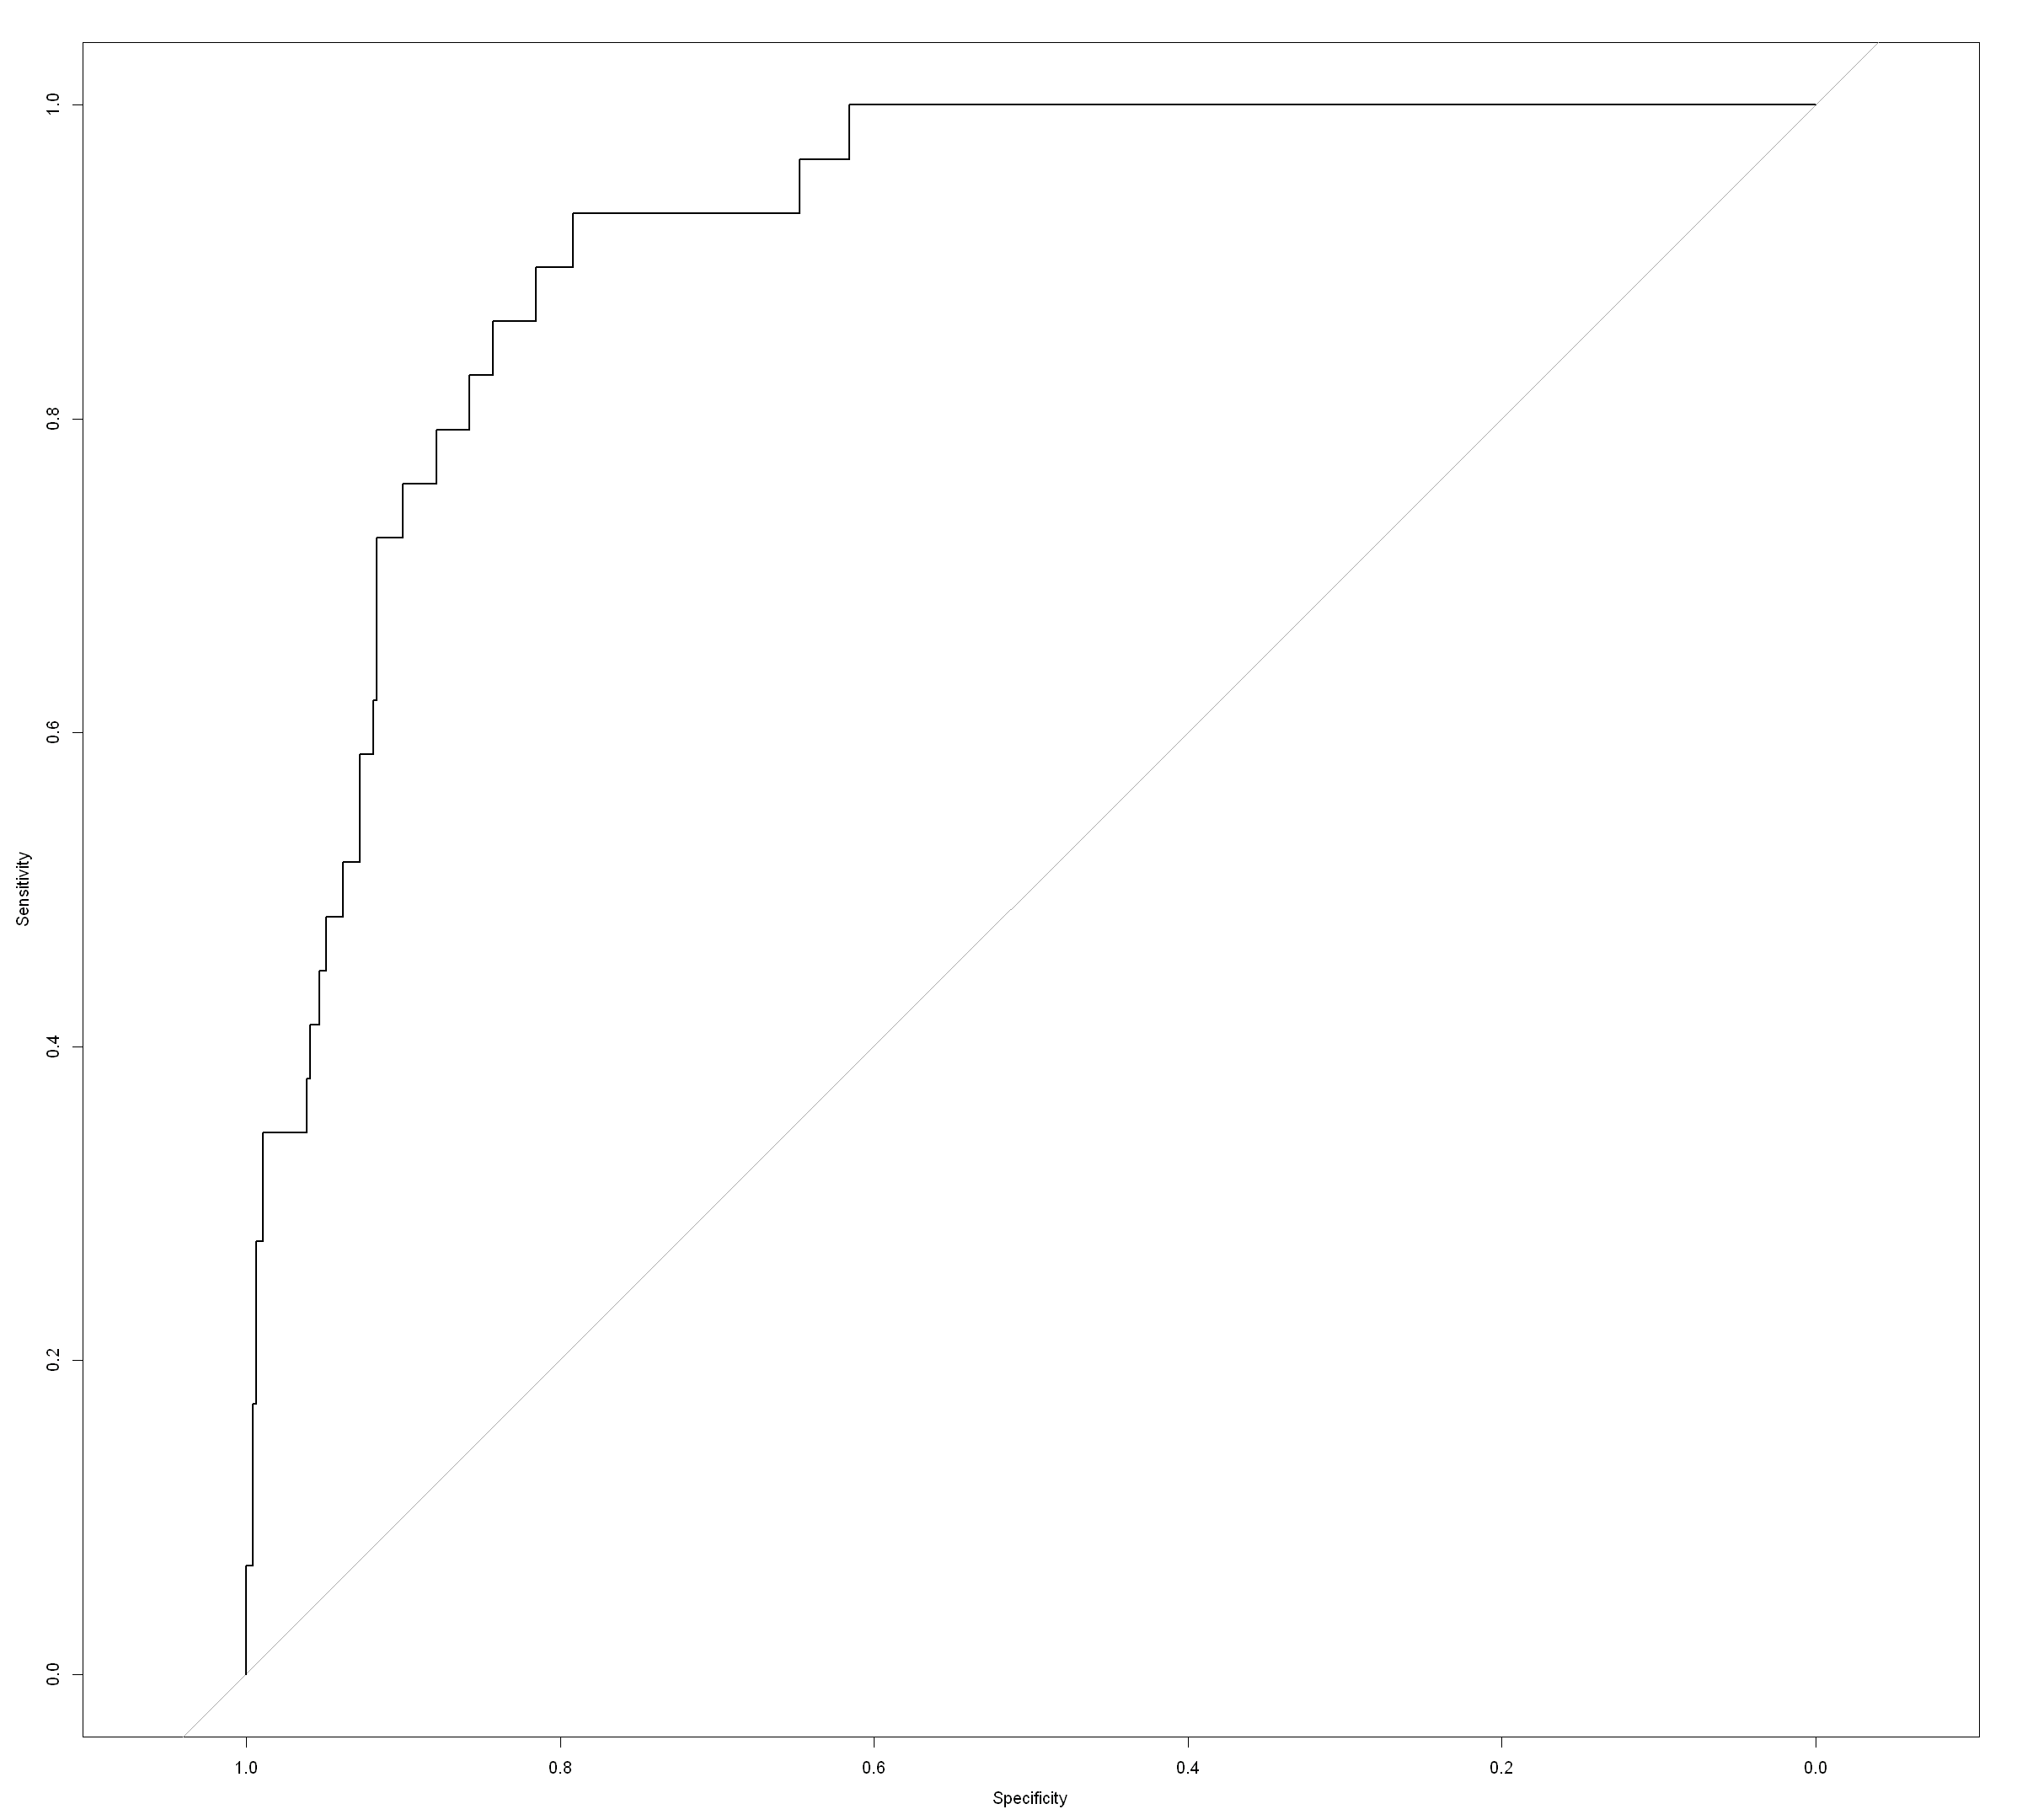

In [1254]:
roc_plot <- roc(OUTCOME ~ pred_validation, data = validation)
plot(roc_plot)

##### b. Decision Tree

###### Build the model

In [1255]:
model6 <- rpart(OUTCOME~.,data = train, method = "class")

###### Get the Predicted outputs

In [1256]:
pred_train_tree <- predict(model6, train, type = "class")

In [1257]:
pred_train_tree <- as.numeric(pred_train_tree)
pred_train_tree[pred_train_tree == 1] <- 0
pred_train_tree[pred_train_tree == 2] <- 1

###### Confusion Matrix

In [1258]:
table(train$OUTCOME, pred_train_tree, dnn = c("Actual", "Predicted"))

      Predicted
Actual    0    1
     0 1402    6
     1   77   15

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_tree, data = train)

Data: pred_train_tree in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.5794

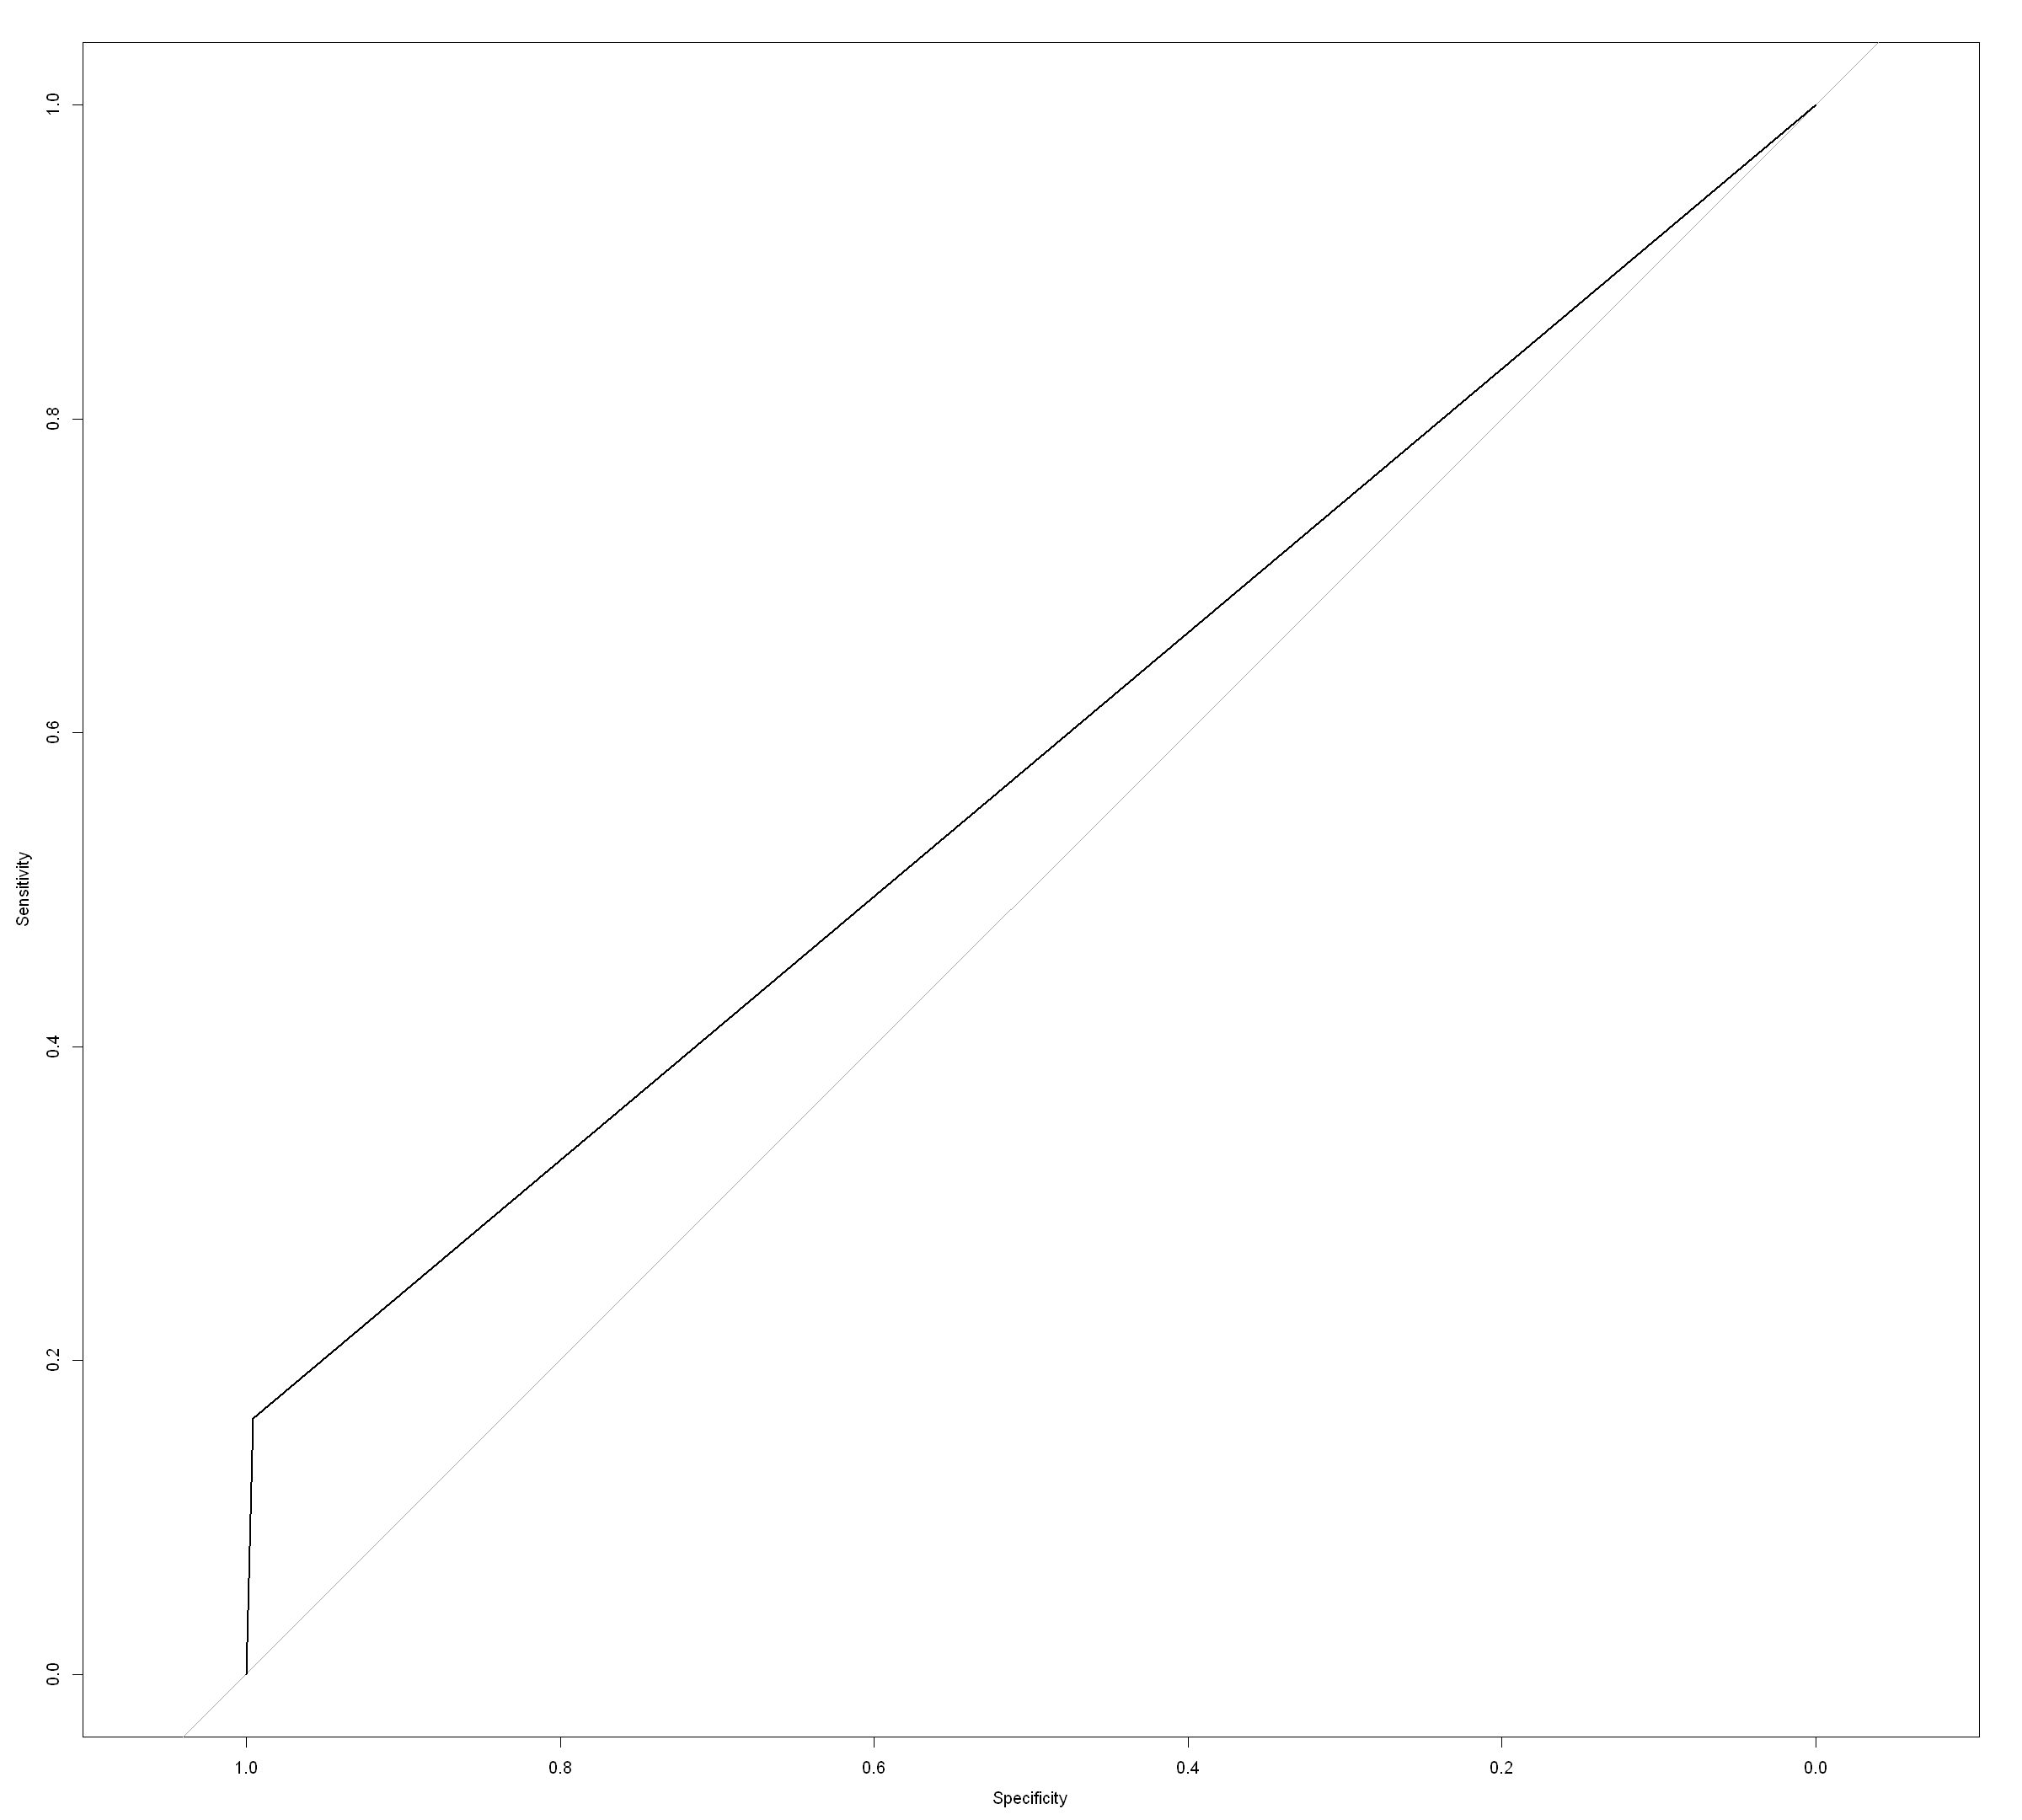

In [1259]:
roc_plot <- roc(OUTCOME ~ pred_train_tree, data = train)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1260]:
pred_validation_tree <- predict(model6, validation, type = "class")

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = attr(object, : factor Customer.subtype has new levels Senior cosmopolitans, Suburban youth


In [1261]:
pred_validation_tree <- as.numeric(pred_validation_tree)
pred_validation_tree[pred_validation_tree == 1] <- 0
pred_validation_tree[pred_validation_tree == 2] <- 1

###### Confusion Matrix

In [1262]:
table(validation$OUTCOME, pred_validation_tree, dnn = c("Actual", "Predicted"))

      Predicted
Actual   0
     0 471
     1  29

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_tree, data = validation)

Data: pred_validation_tree in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.5

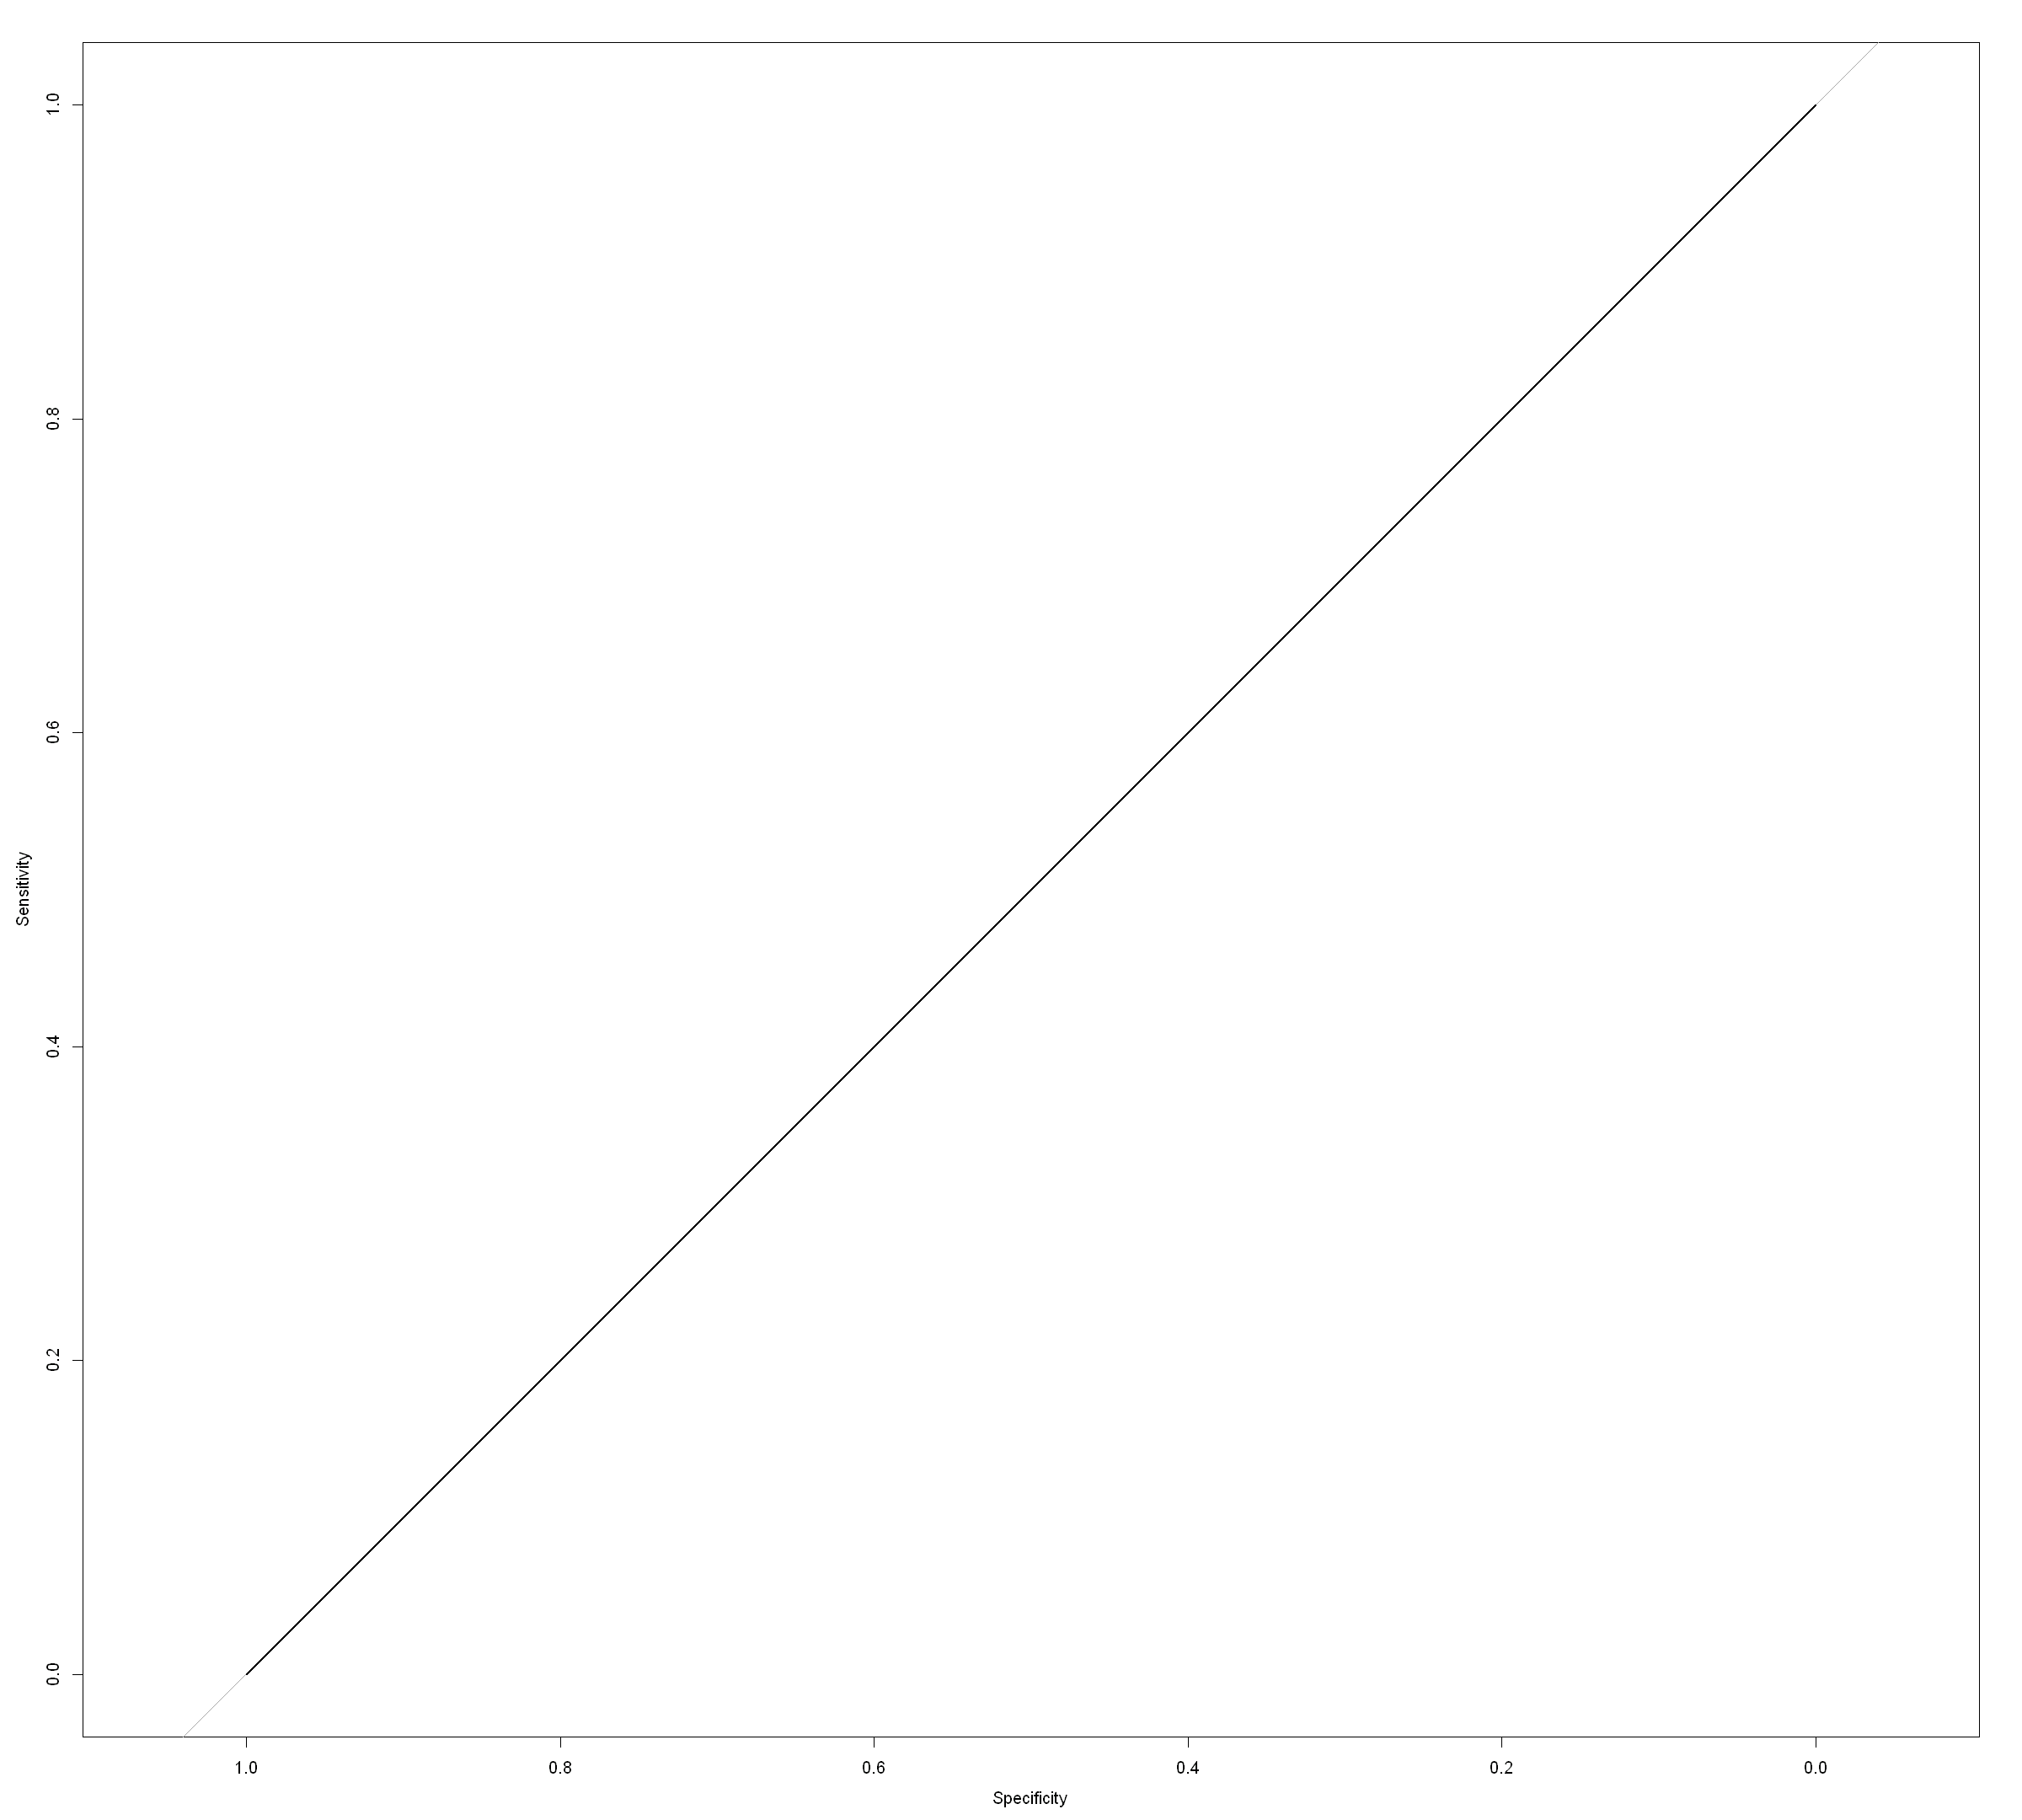

In [1263]:
roc_plot <- roc(OUTCOME ~ pred_validation_tree, data = validation)
plot(roc_plot)

##### c. Random Forest

###### Build the model

In [1264]:
model7 <- randomForest(OUTCOME~.,data = train, ntree = 500)

###### Get the Predicted outputs

In [1265]:
pred_train_random <- predict(model7, train)

In [1266]:
pred_train_random <- as.numeric(pred_train_random)
pred_train_random[pred_train_random == 1] <- 0
pred_train_random[pred_train_random == 2] <- 1

###### Confusion Matrix

In [1267]:
table(train$OUTCOME, pred_train_random, dnn = c("Actual", "Predicted"))

      Predicted
Actual    0    1
     0 1408    0
     1   71   21

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_random, data = train)

Data: pred_train_random in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.6141

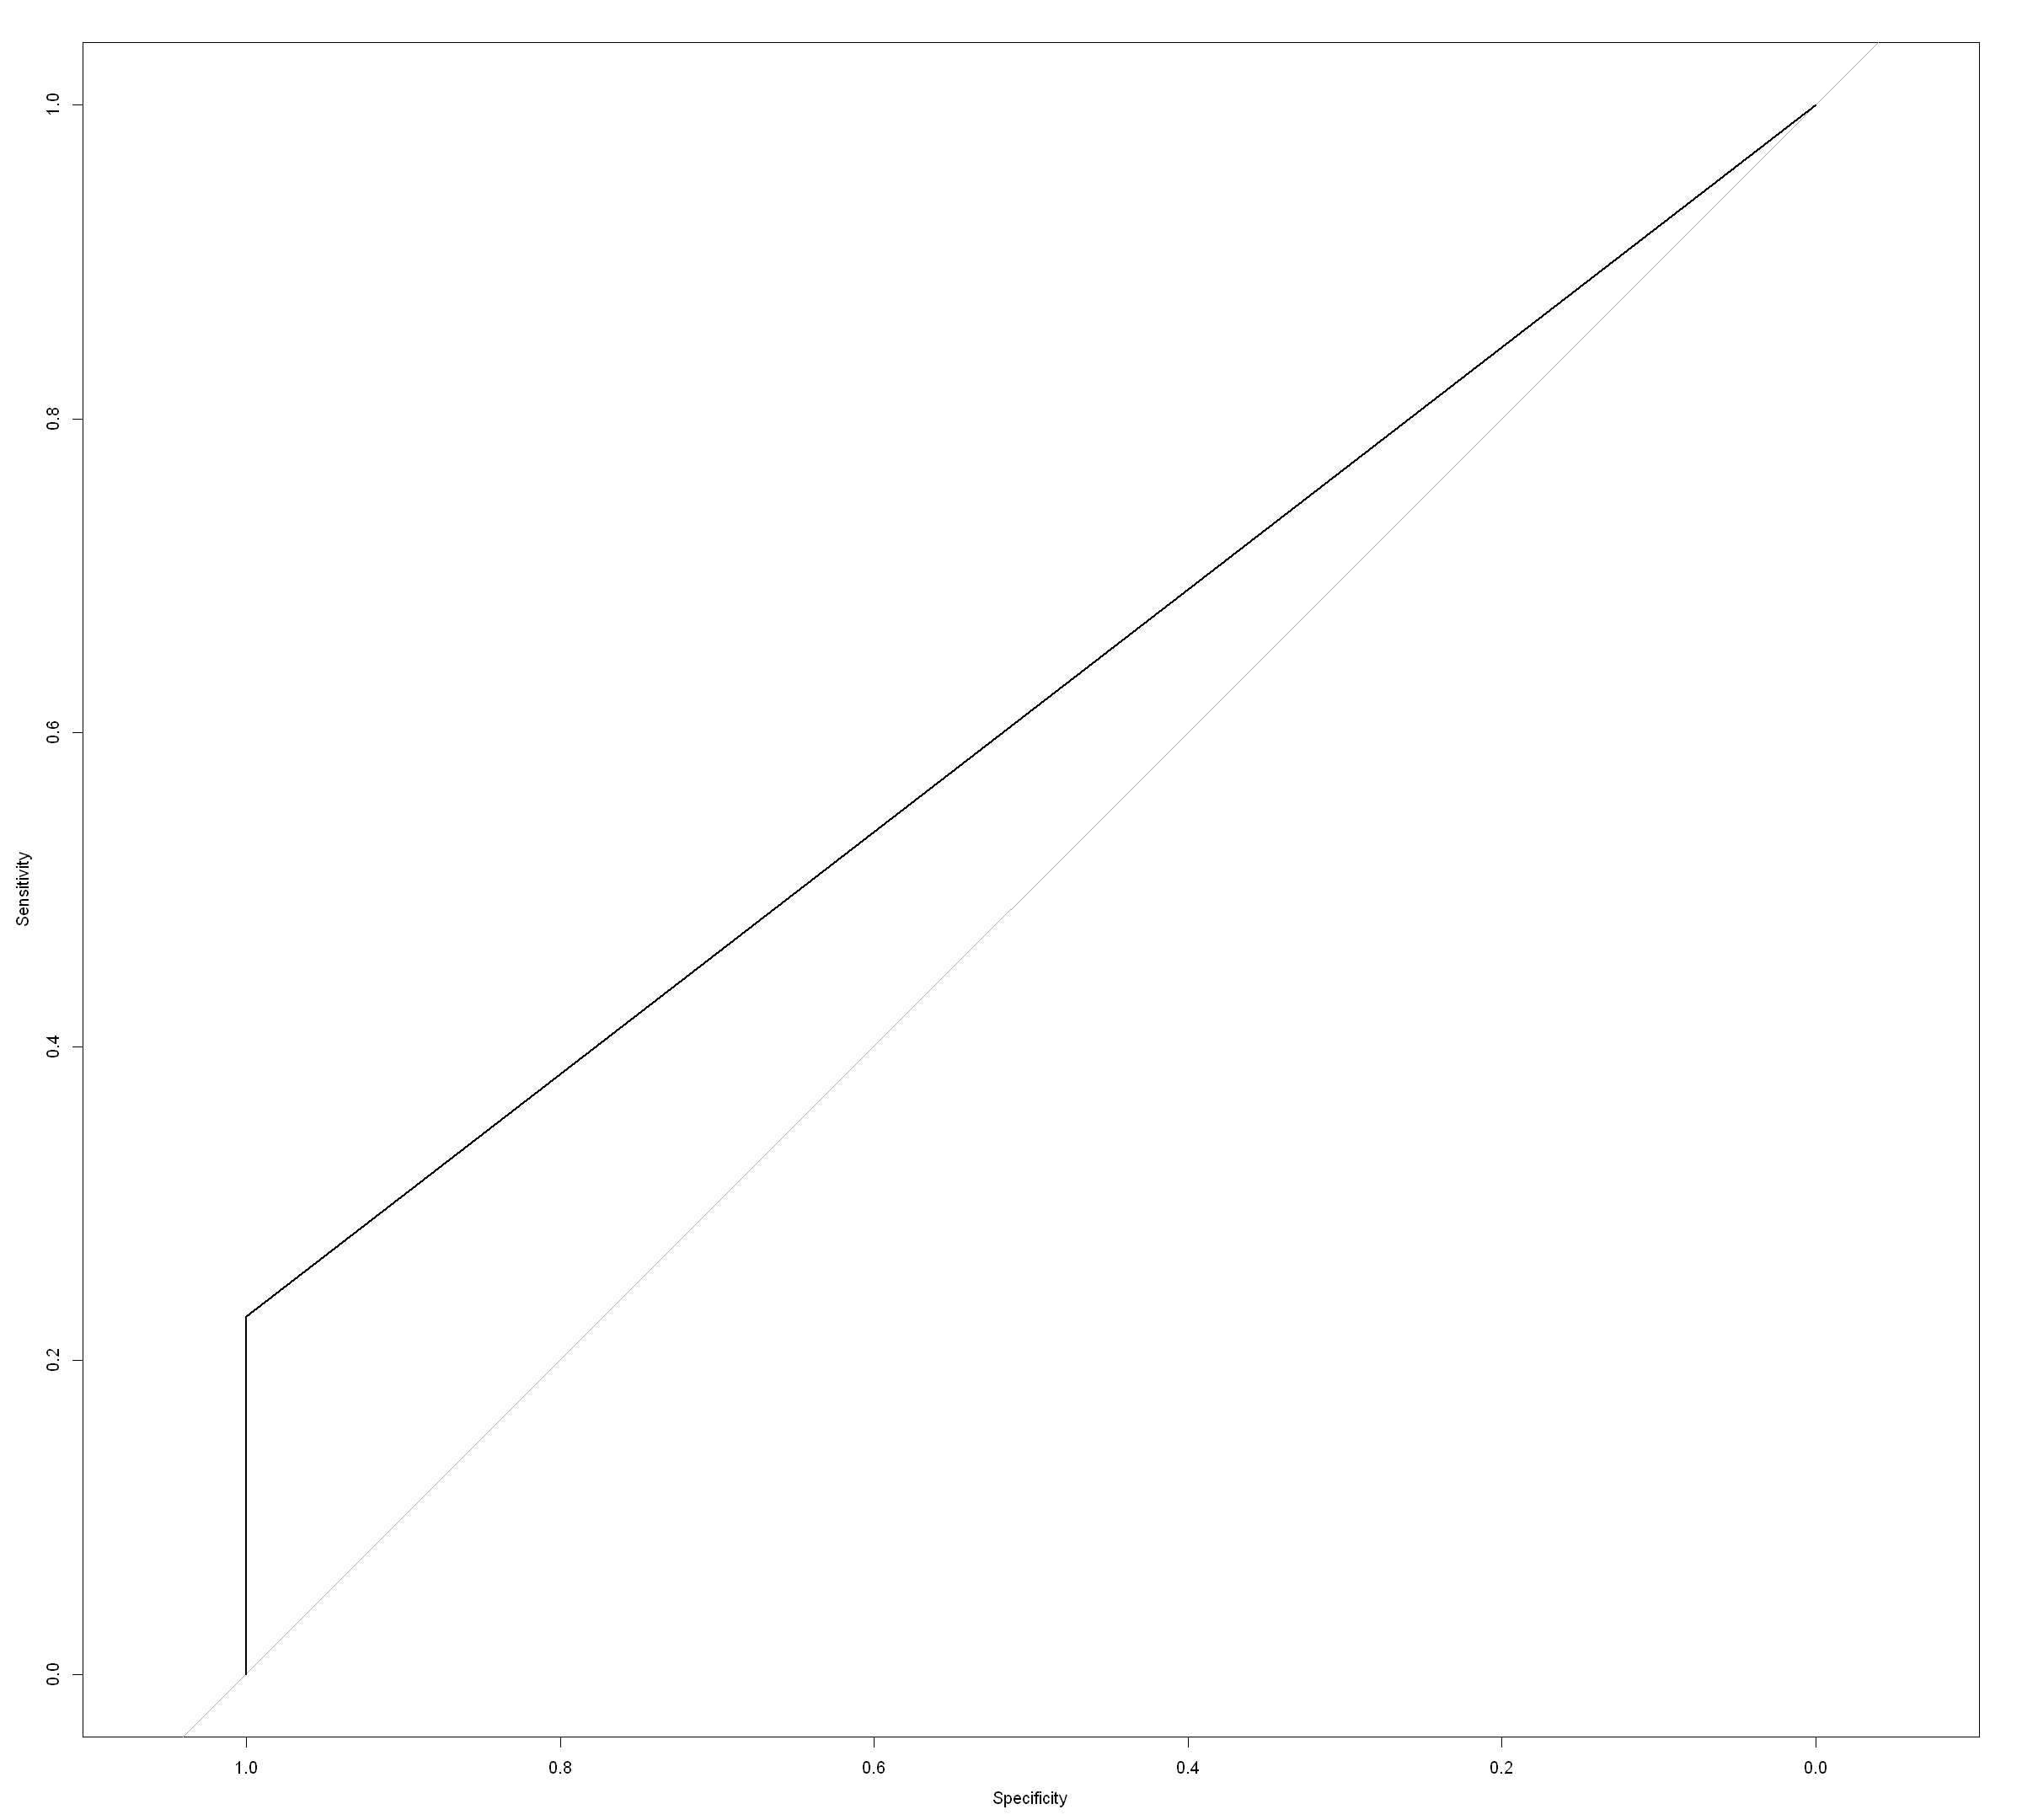

In [1268]:
roc_plot <- roc(OUTCOME ~ pred_train_random, data = train)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1269]:
pred_validation_random <- predict(model7, validation)

ERROR: Error in predict.randomForest(model7, validation): New factor levels not present in the training data


In [1270]:
pred_validation_random <- as.numeric(pred_validation_random)
pred_validation_random[pred_validation_random == 1] <- 0
pred_validation_random[pred_validation_random == 2] <- 1

###### Confusion Matrix

In [1271]:
table(validation$OUTCOME, pred_validation_random, dnn = c("Actual", "Predicted"))

      Predicted
Actual   0
     0 471
     1  29

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_random, data = train)

Data: pred_train_random in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.6141

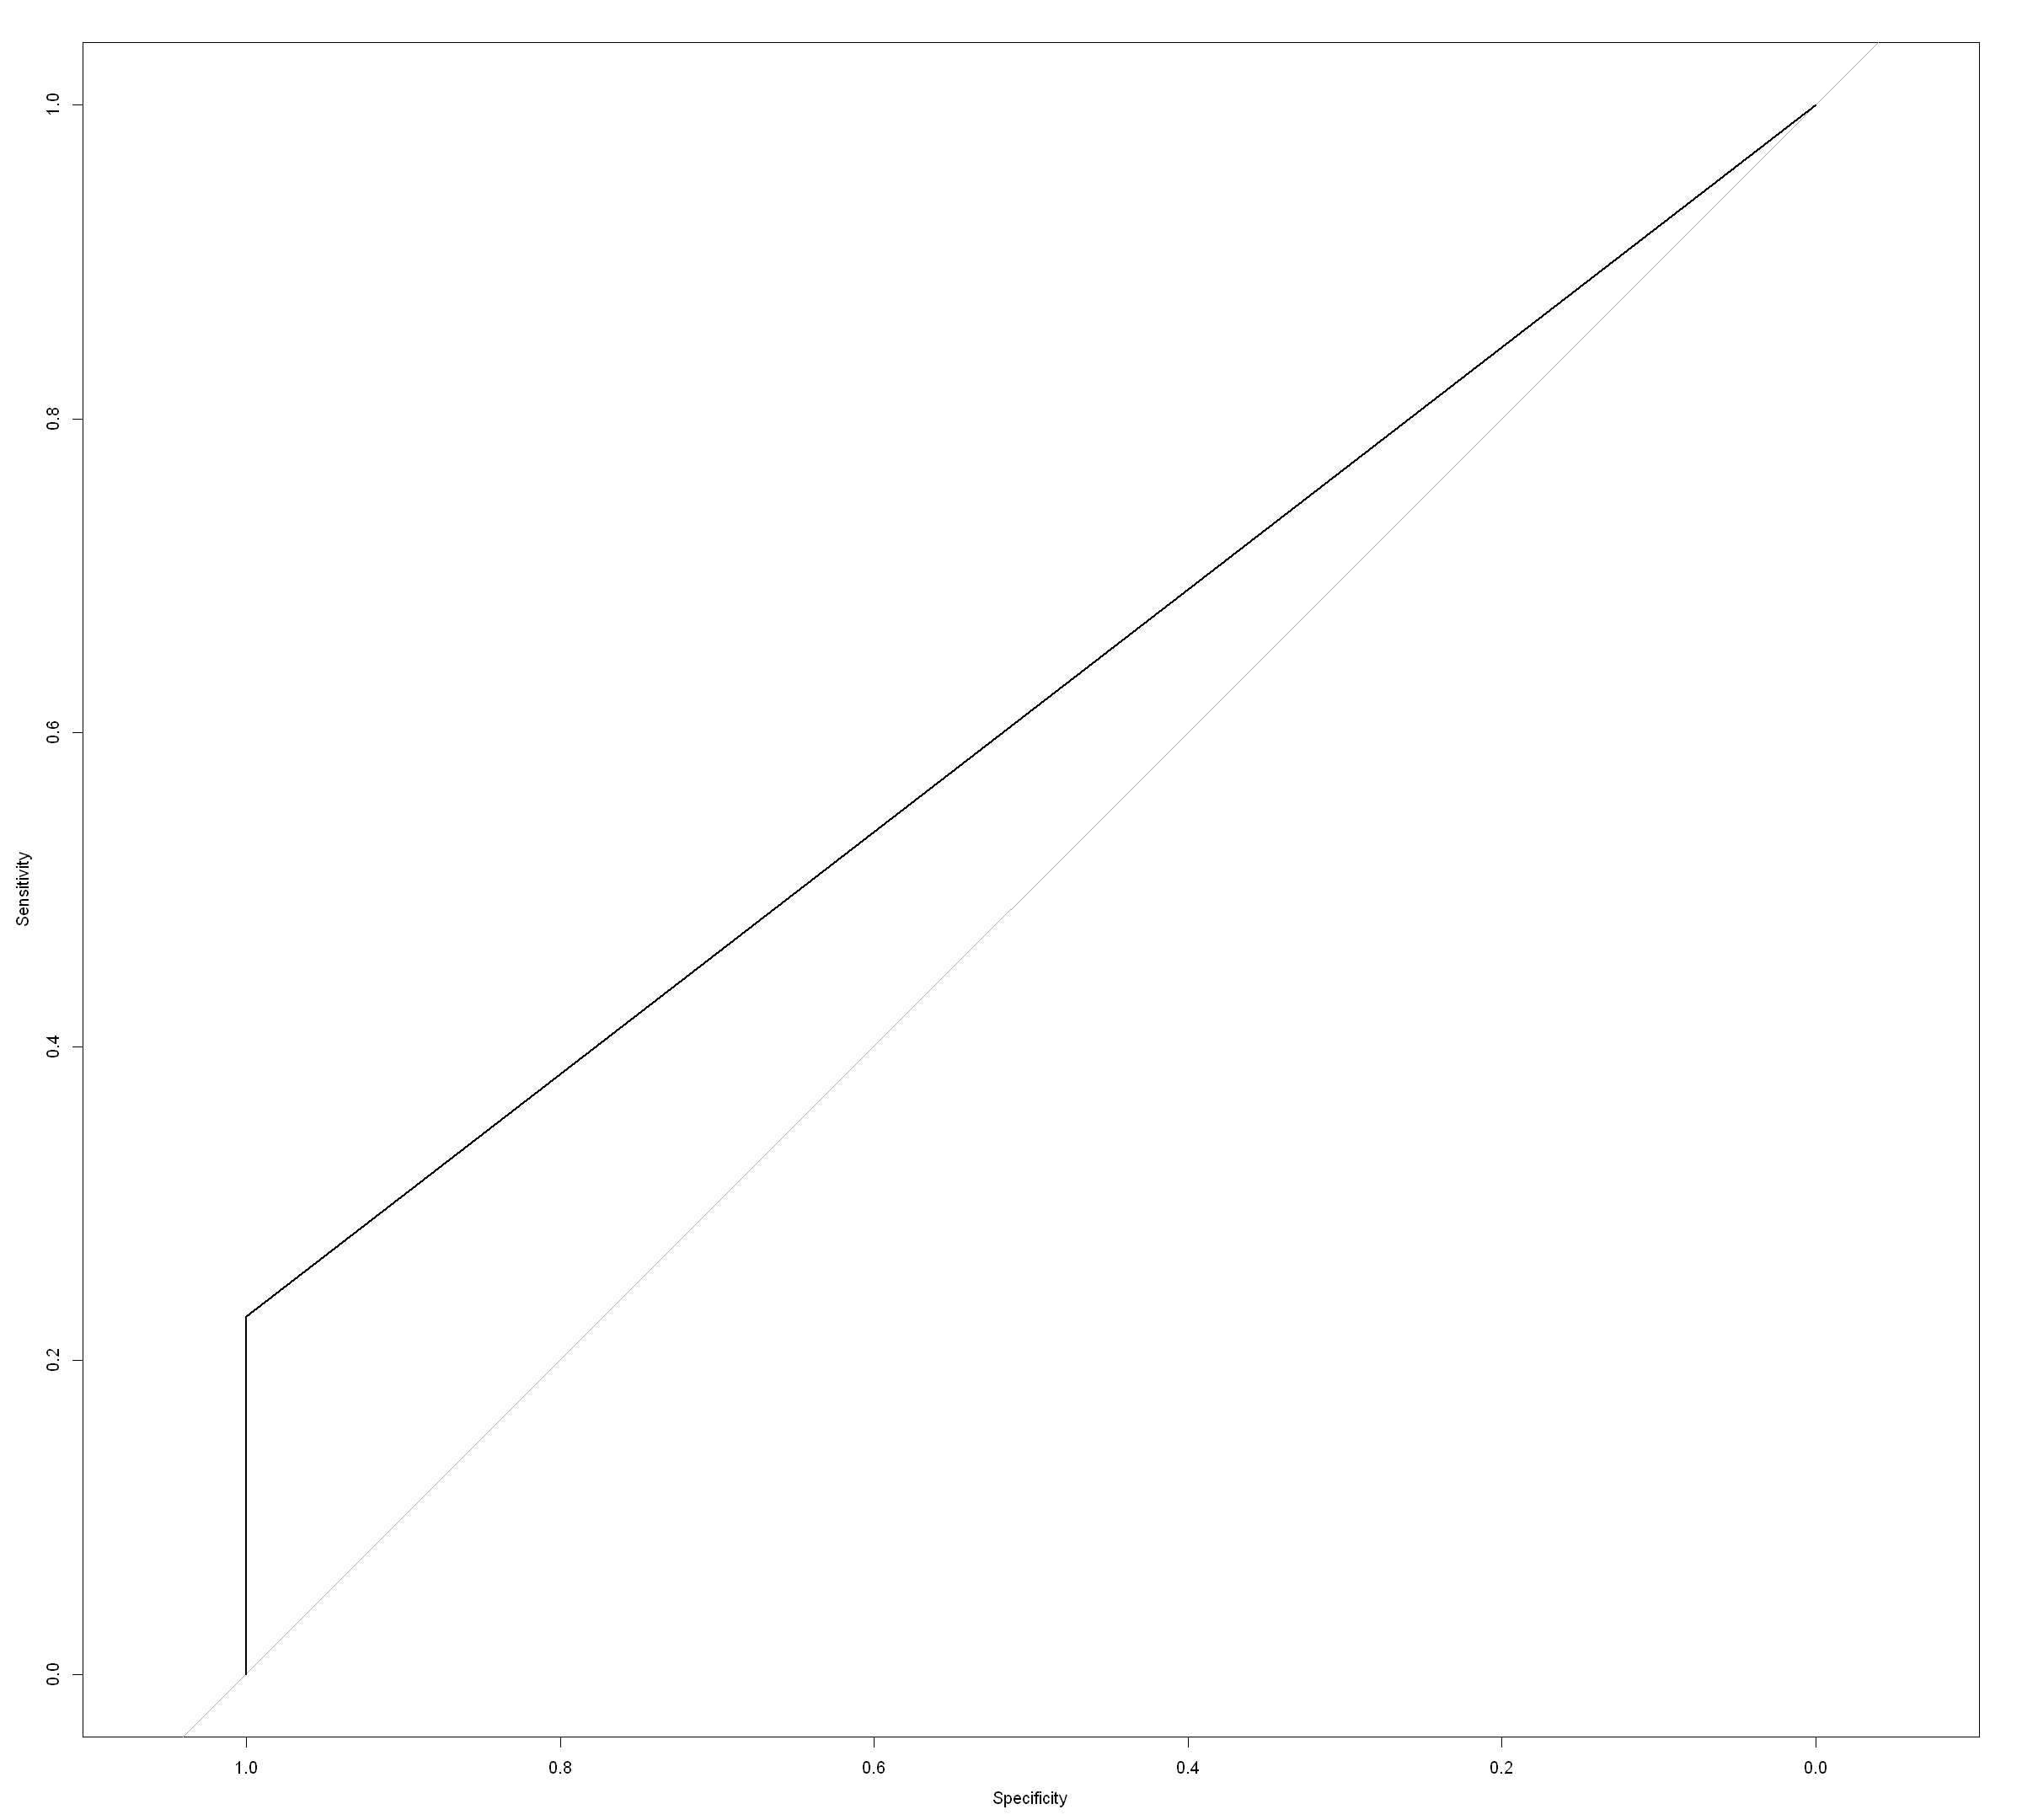

In [1272]:
roc_plot <- roc(OUTCOME ~ pred_train_random, data = train)
plot(roc_plot)

##### d. Support Vector Machines (SVM)

###### Build the model

In [1273]:
model8 <- svm(OUTCOME~.,data = train)

###### Get the Predicted outputs

In [1274]:
pred_train_svm <- predict(model8, train)

In [1275]:
pred_train_svm <- as.numeric(pred_train_svm)
pred_train_svm[pred_train_svm == 1] <- 0
pred_train_svm[pred_train_svm == 2] <- 1

###### Confusion Matrix

In [1276]:
table(train$OUTCOME, pred_train_svm, dnn = c("Actual", "Predicted"))

      Predicted
Actual    0    1
     0 1408    0
     1   90    2

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_svm, data = train)

Data: pred_train_svm in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.5109

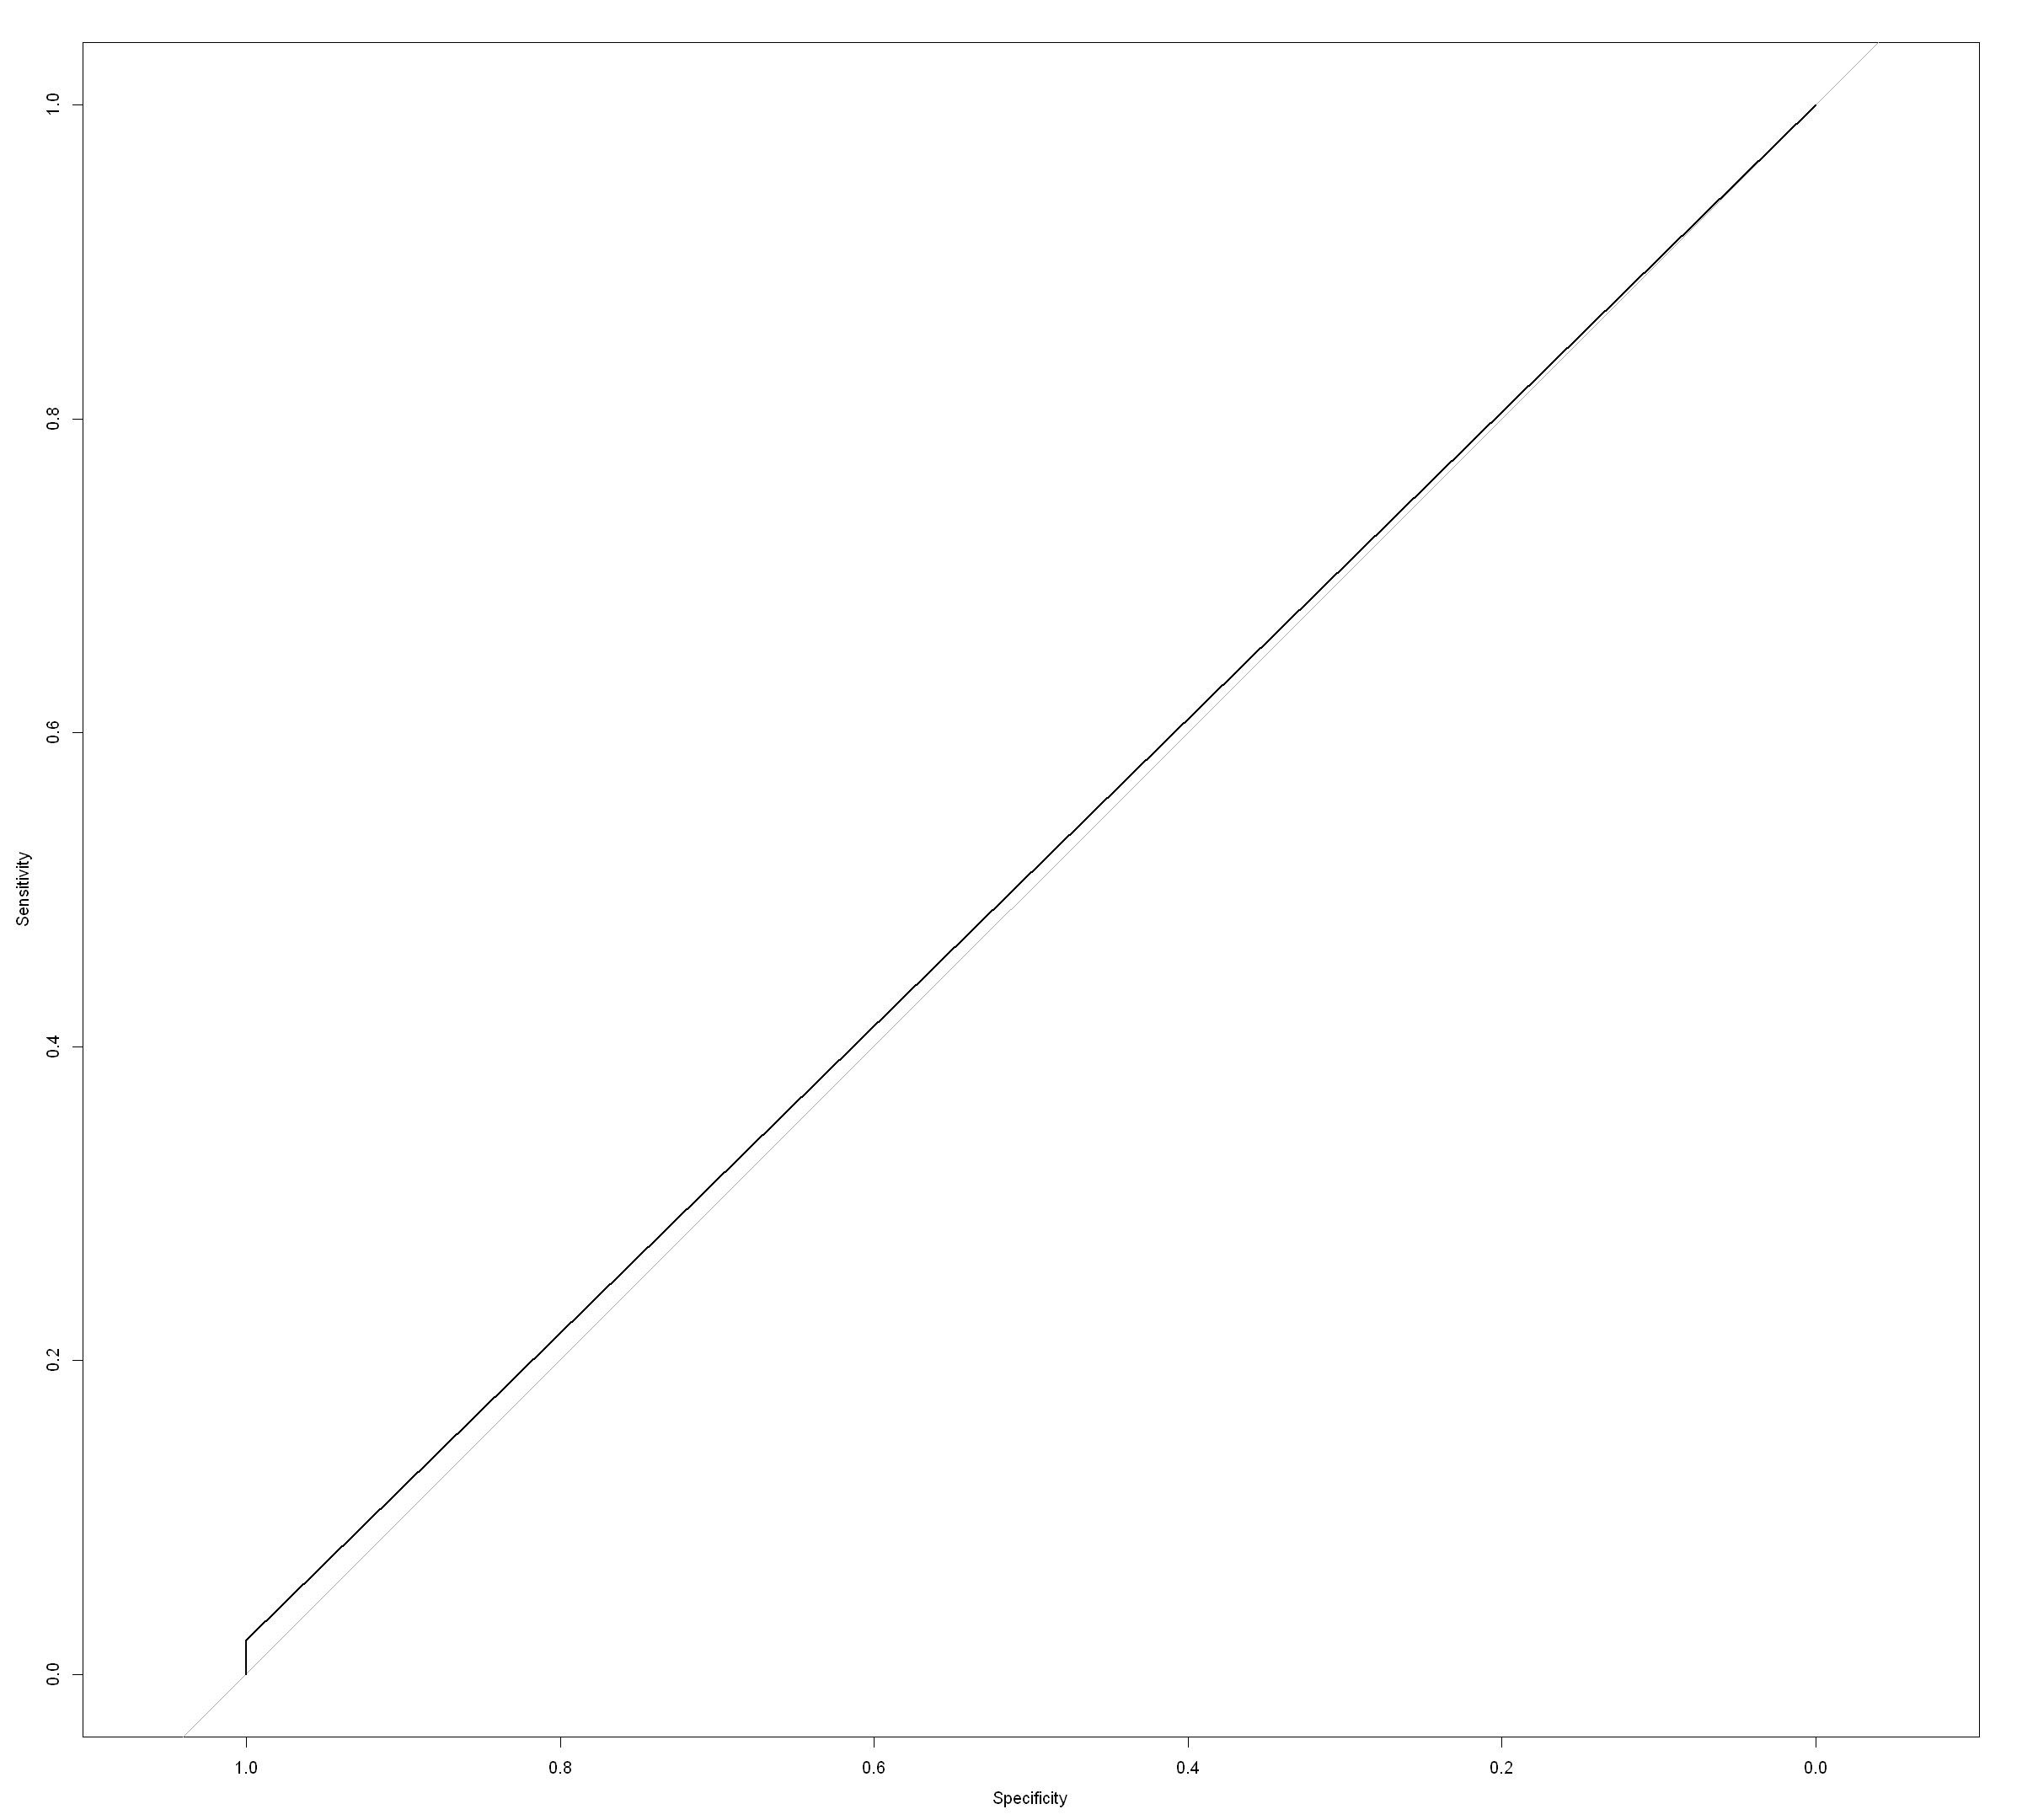

In [1277]:
roc_plot <- roc(OUTCOME ~ pred_train_svm, data = train)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1278]:
pred_validation_svm <- predict(model8, validation)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [1279]:
pred_validation_svm <- as.numeric(pred_validation_svm)
pred_validation_svm[pred_validation_svm == 1] <- 0
pred_validation_svm[pred_validation_svm == 2] <- 1

###### Confusion Matrix

In [1280]:
table(validation$OUTCOME, pred_validation_svm, dnn = c("Actual", "Predicted"))

      Predicted
Actual   0
     0 471
     1  29

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_svm, data = validation)

Data: pred_validation_svm in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.5

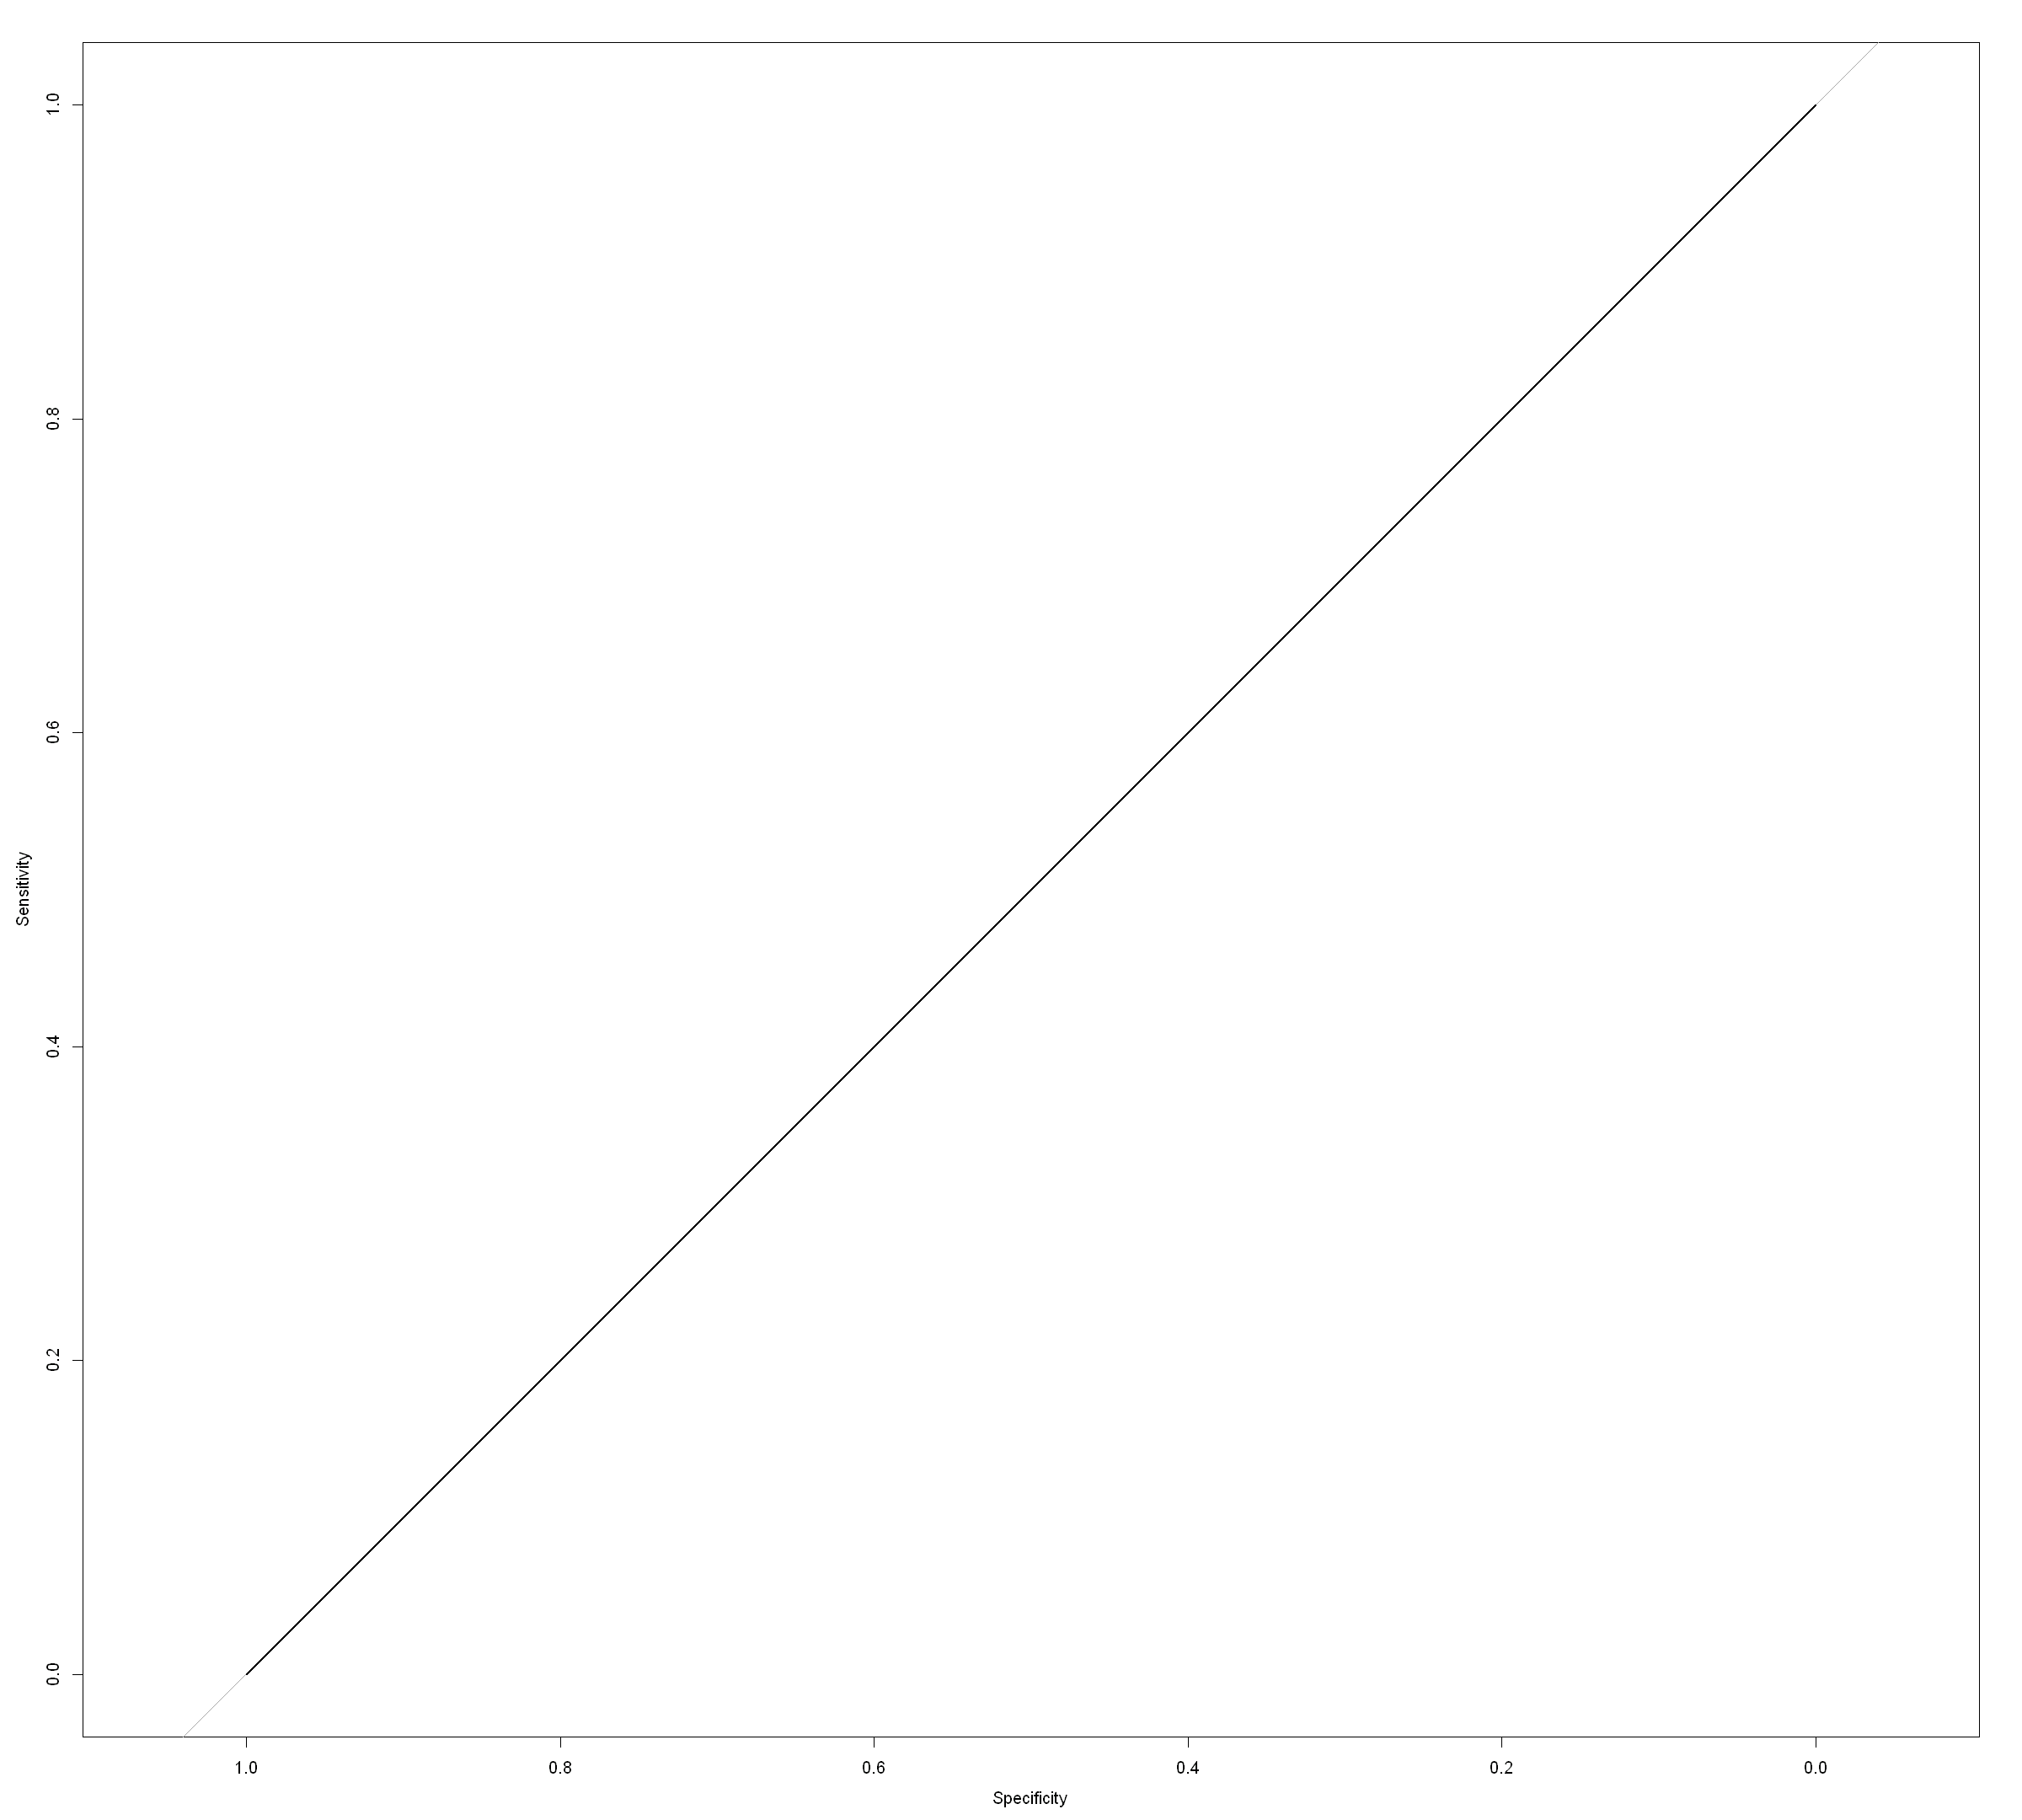

In [1281]:
roc_plot <- roc(OUTCOME ~ pred_validation_svm, data = validation)
plot(roc_plot)

##### e. Neural Networks

###### Build the model

In [1282]:
model9 <- nnet(OUTCOME~.,data = train, size = 10, MaxNWts=10000, trace=FALSE, maxit=100)

###### Get the Predicted outputs

In [1283]:
pred_train_nnet <- predict(model9, train)

In [1284]:
pred_train_nnet <- as.numeric(pred_train_nnet)

###### Confusion Matrix

In [1285]:
table(train$OUTCOME, pred_train_nnet > 0.55, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0  1408    0
     1    82   10

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_nnet, data = train)

Data: pred_train_nnet in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.8767

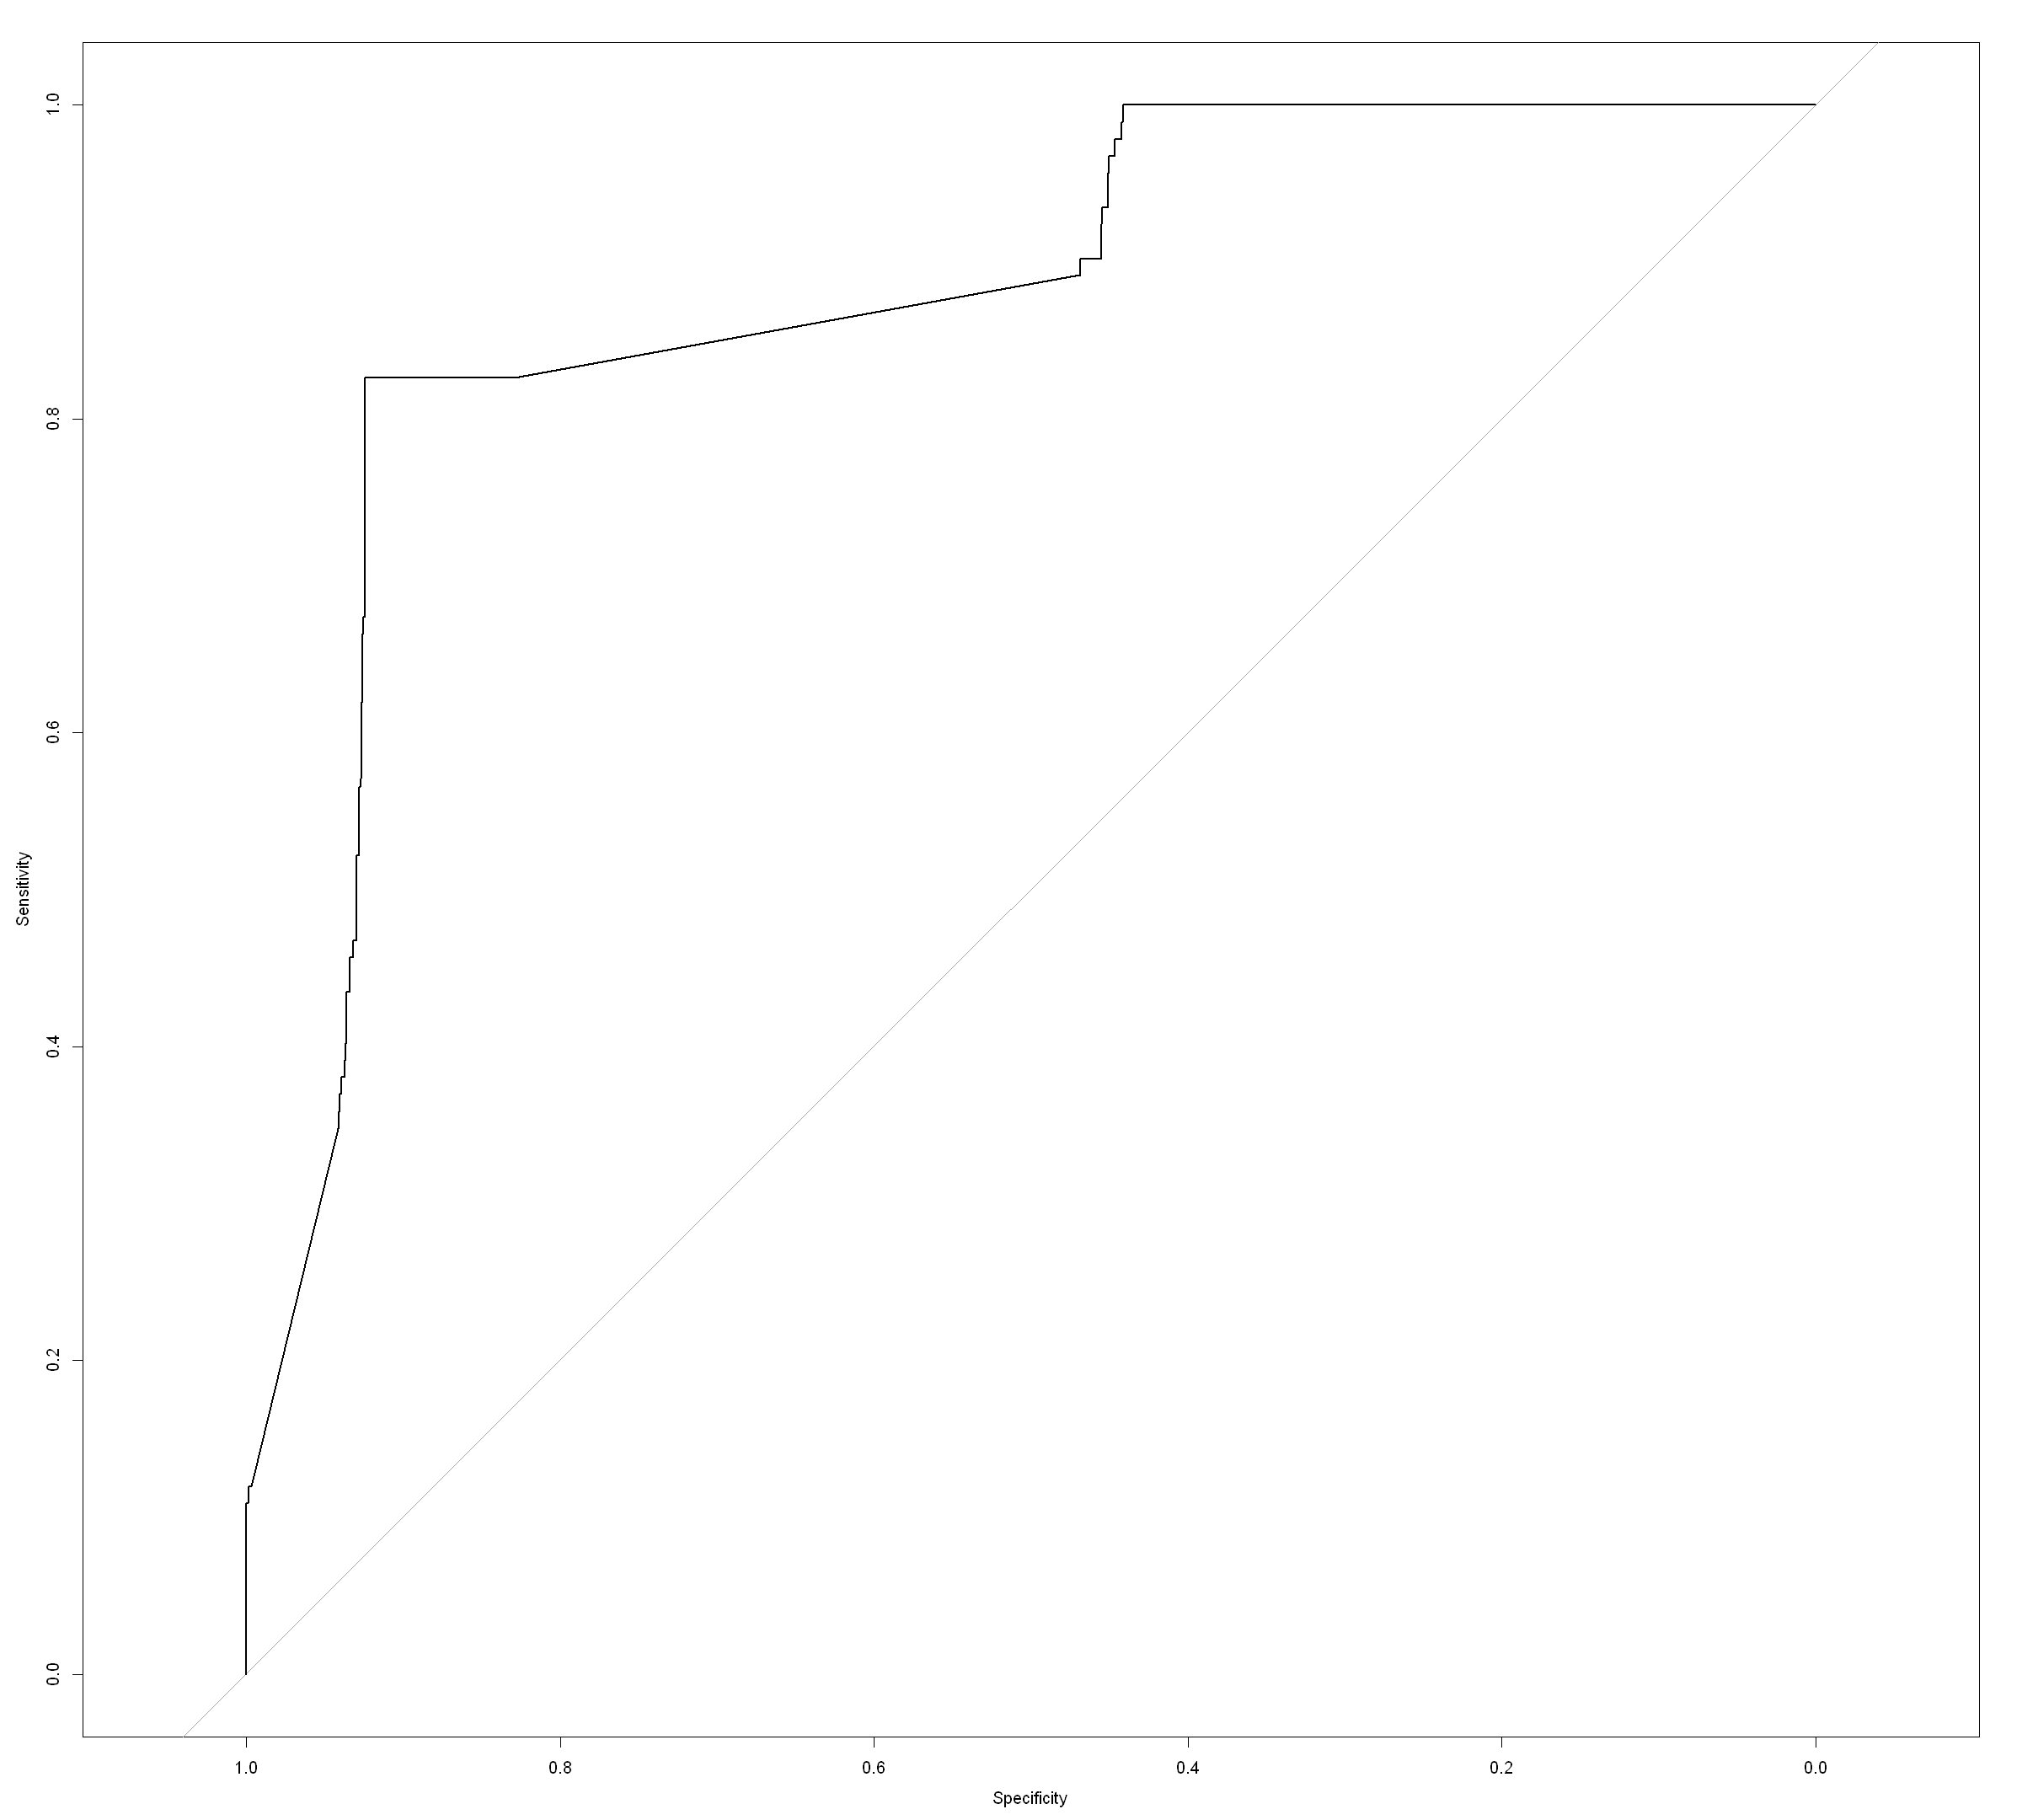

In [1286]:
roc_plot <- roc(OUTCOME ~ pred_train_nnet, data = train)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1287]:
pred_validation_nnet <- predict(model9, validation)

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.omit, xlev = object$xlevels): factor Customer.subtype has new levels Senior cosmopolitans, Suburban youth


In [1288]:
pred_validation_nnet <- as.numeric(pred_validation_nnet)

###### Confusion Matrix

In [1289]:
table(validation$OUTCOME, pred_validation_nnet > 0.55, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0   447   17
     1    26    3

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_nnet, data = validation)

Data: pred_validation_nnet in 464 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.6169

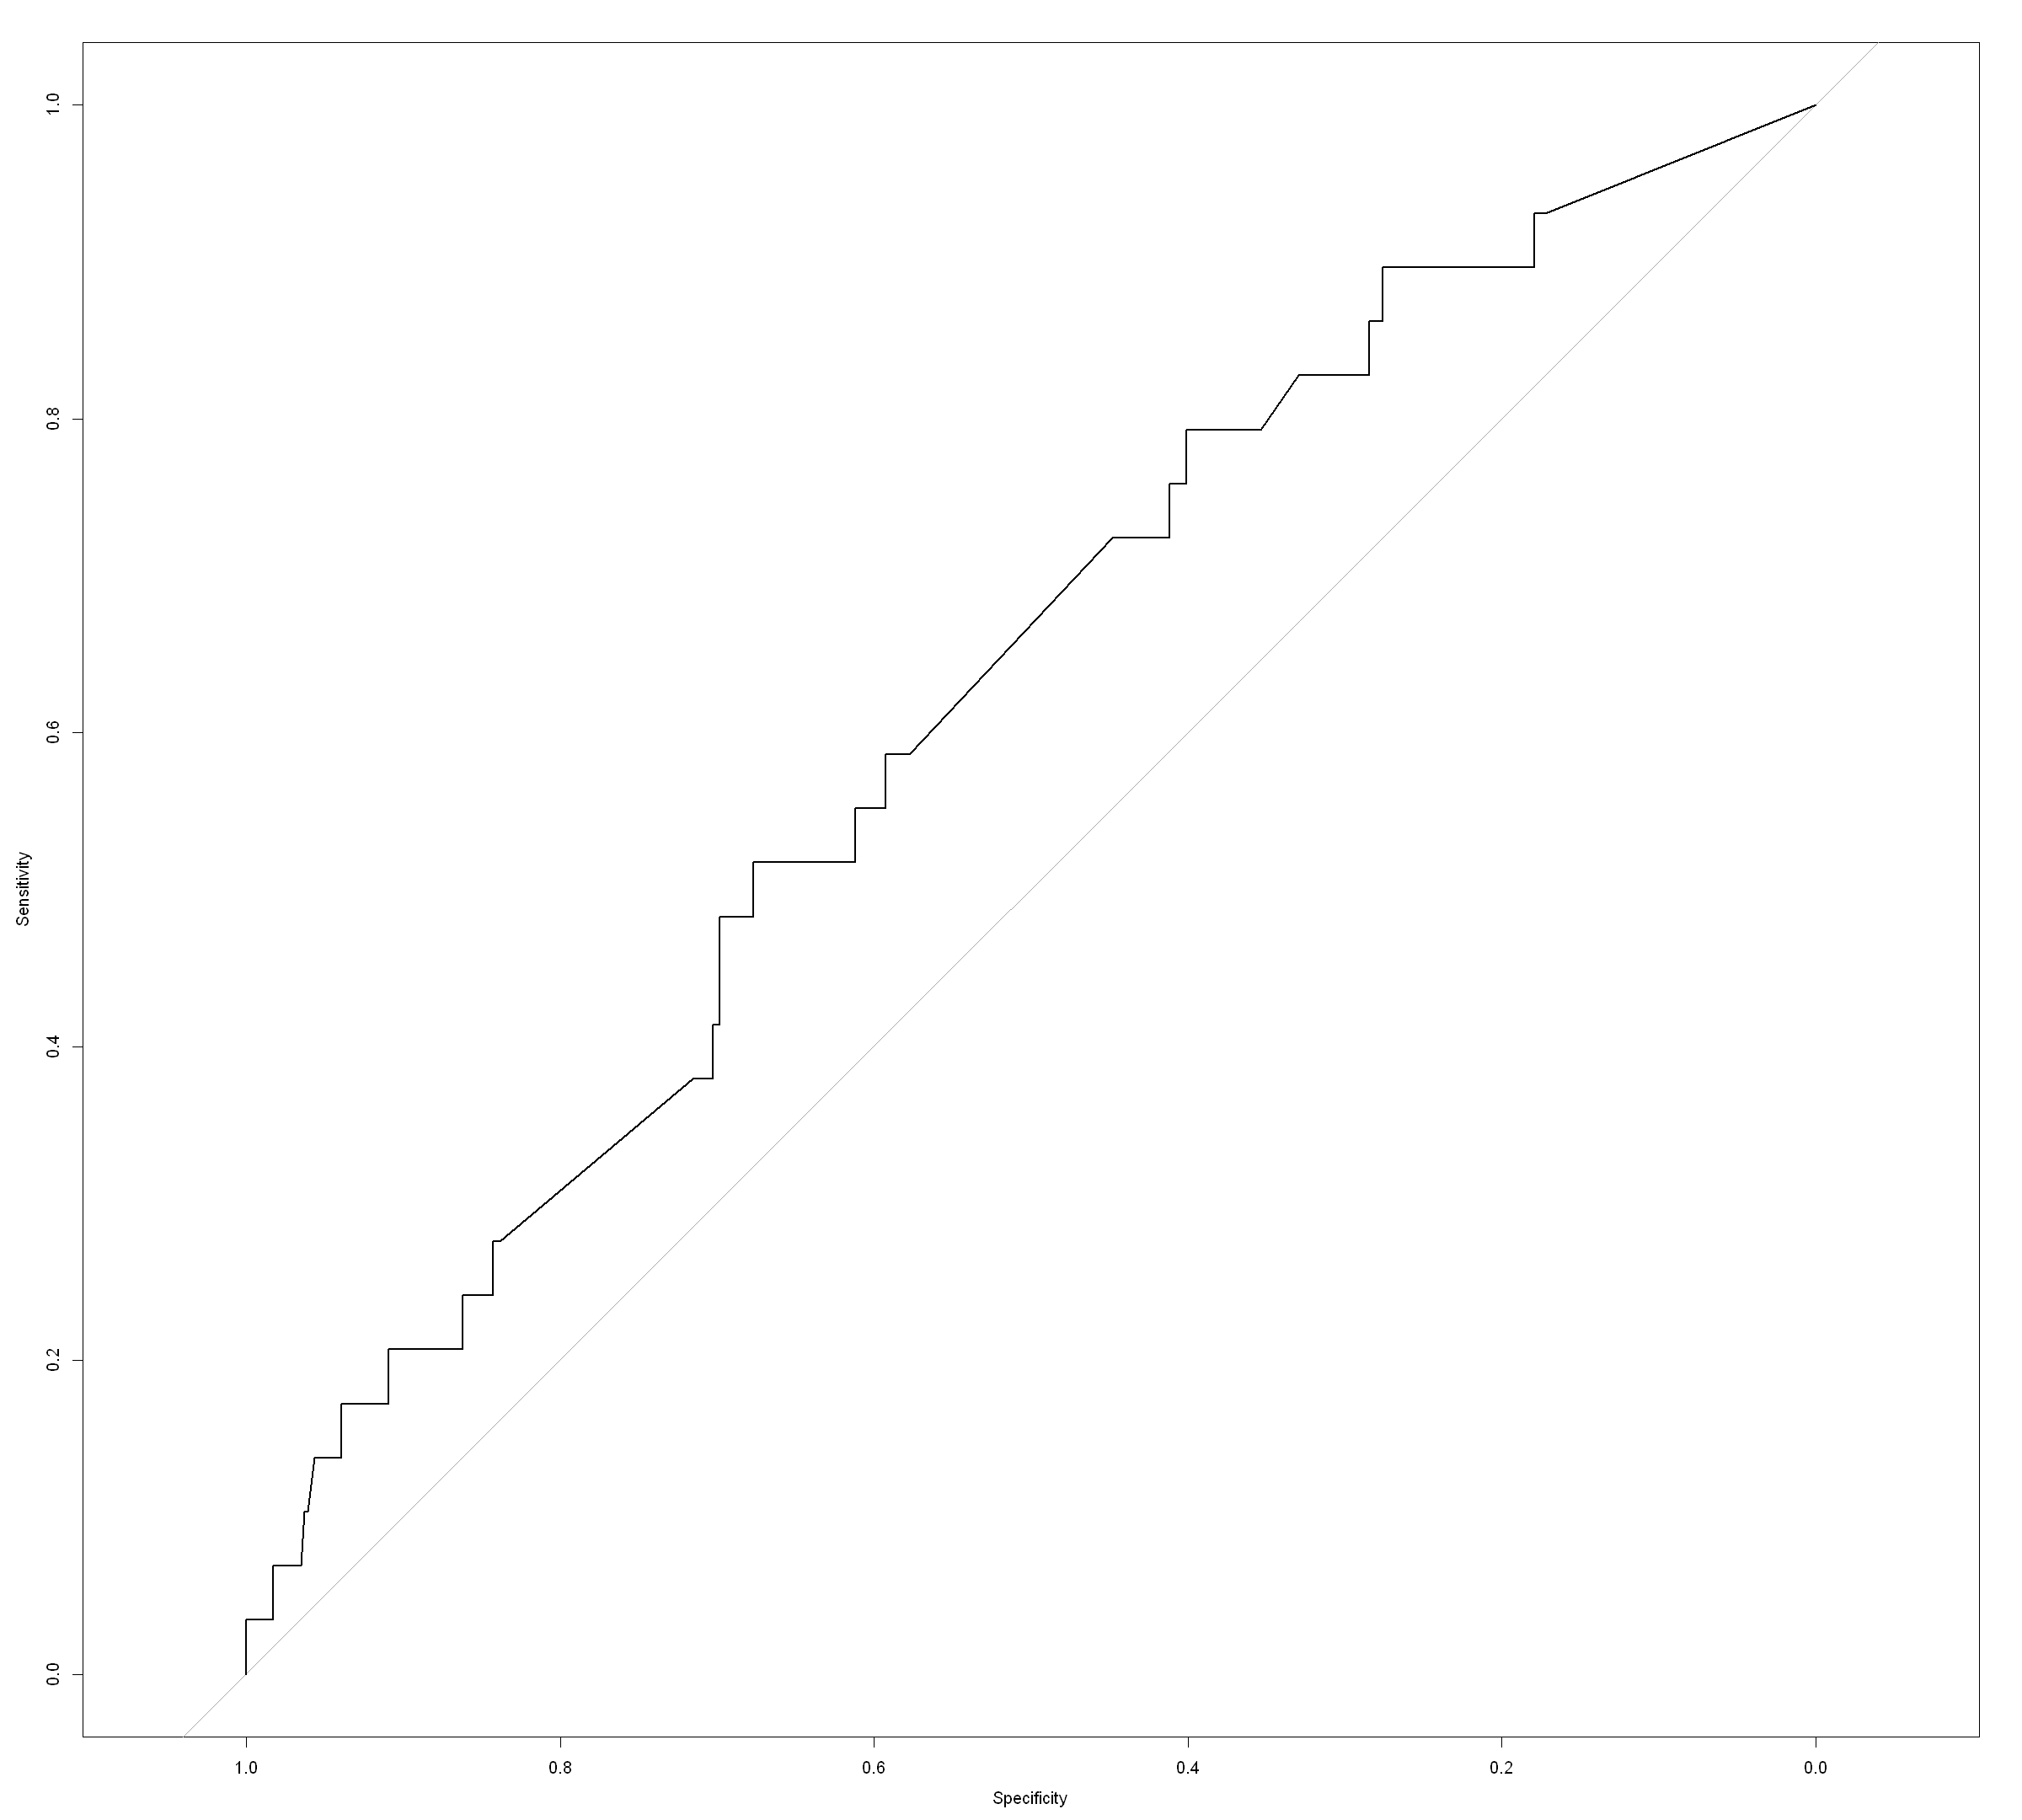

In [1290]:
roc_plot <- roc(OUTCOME ~ pred_validation_nnet, data = validation)
plot(roc_plot)

#### 2. Include only those attributes selected through Principal Component Analysis

In [1291]:
prin_comp <- prcomp(data_numeric, scale. = T)

In [1292]:
std_dev <- prin_comp$sdev

pr_var <- std_dev^2

prop_varex <- pr_var/sum(pr_var)

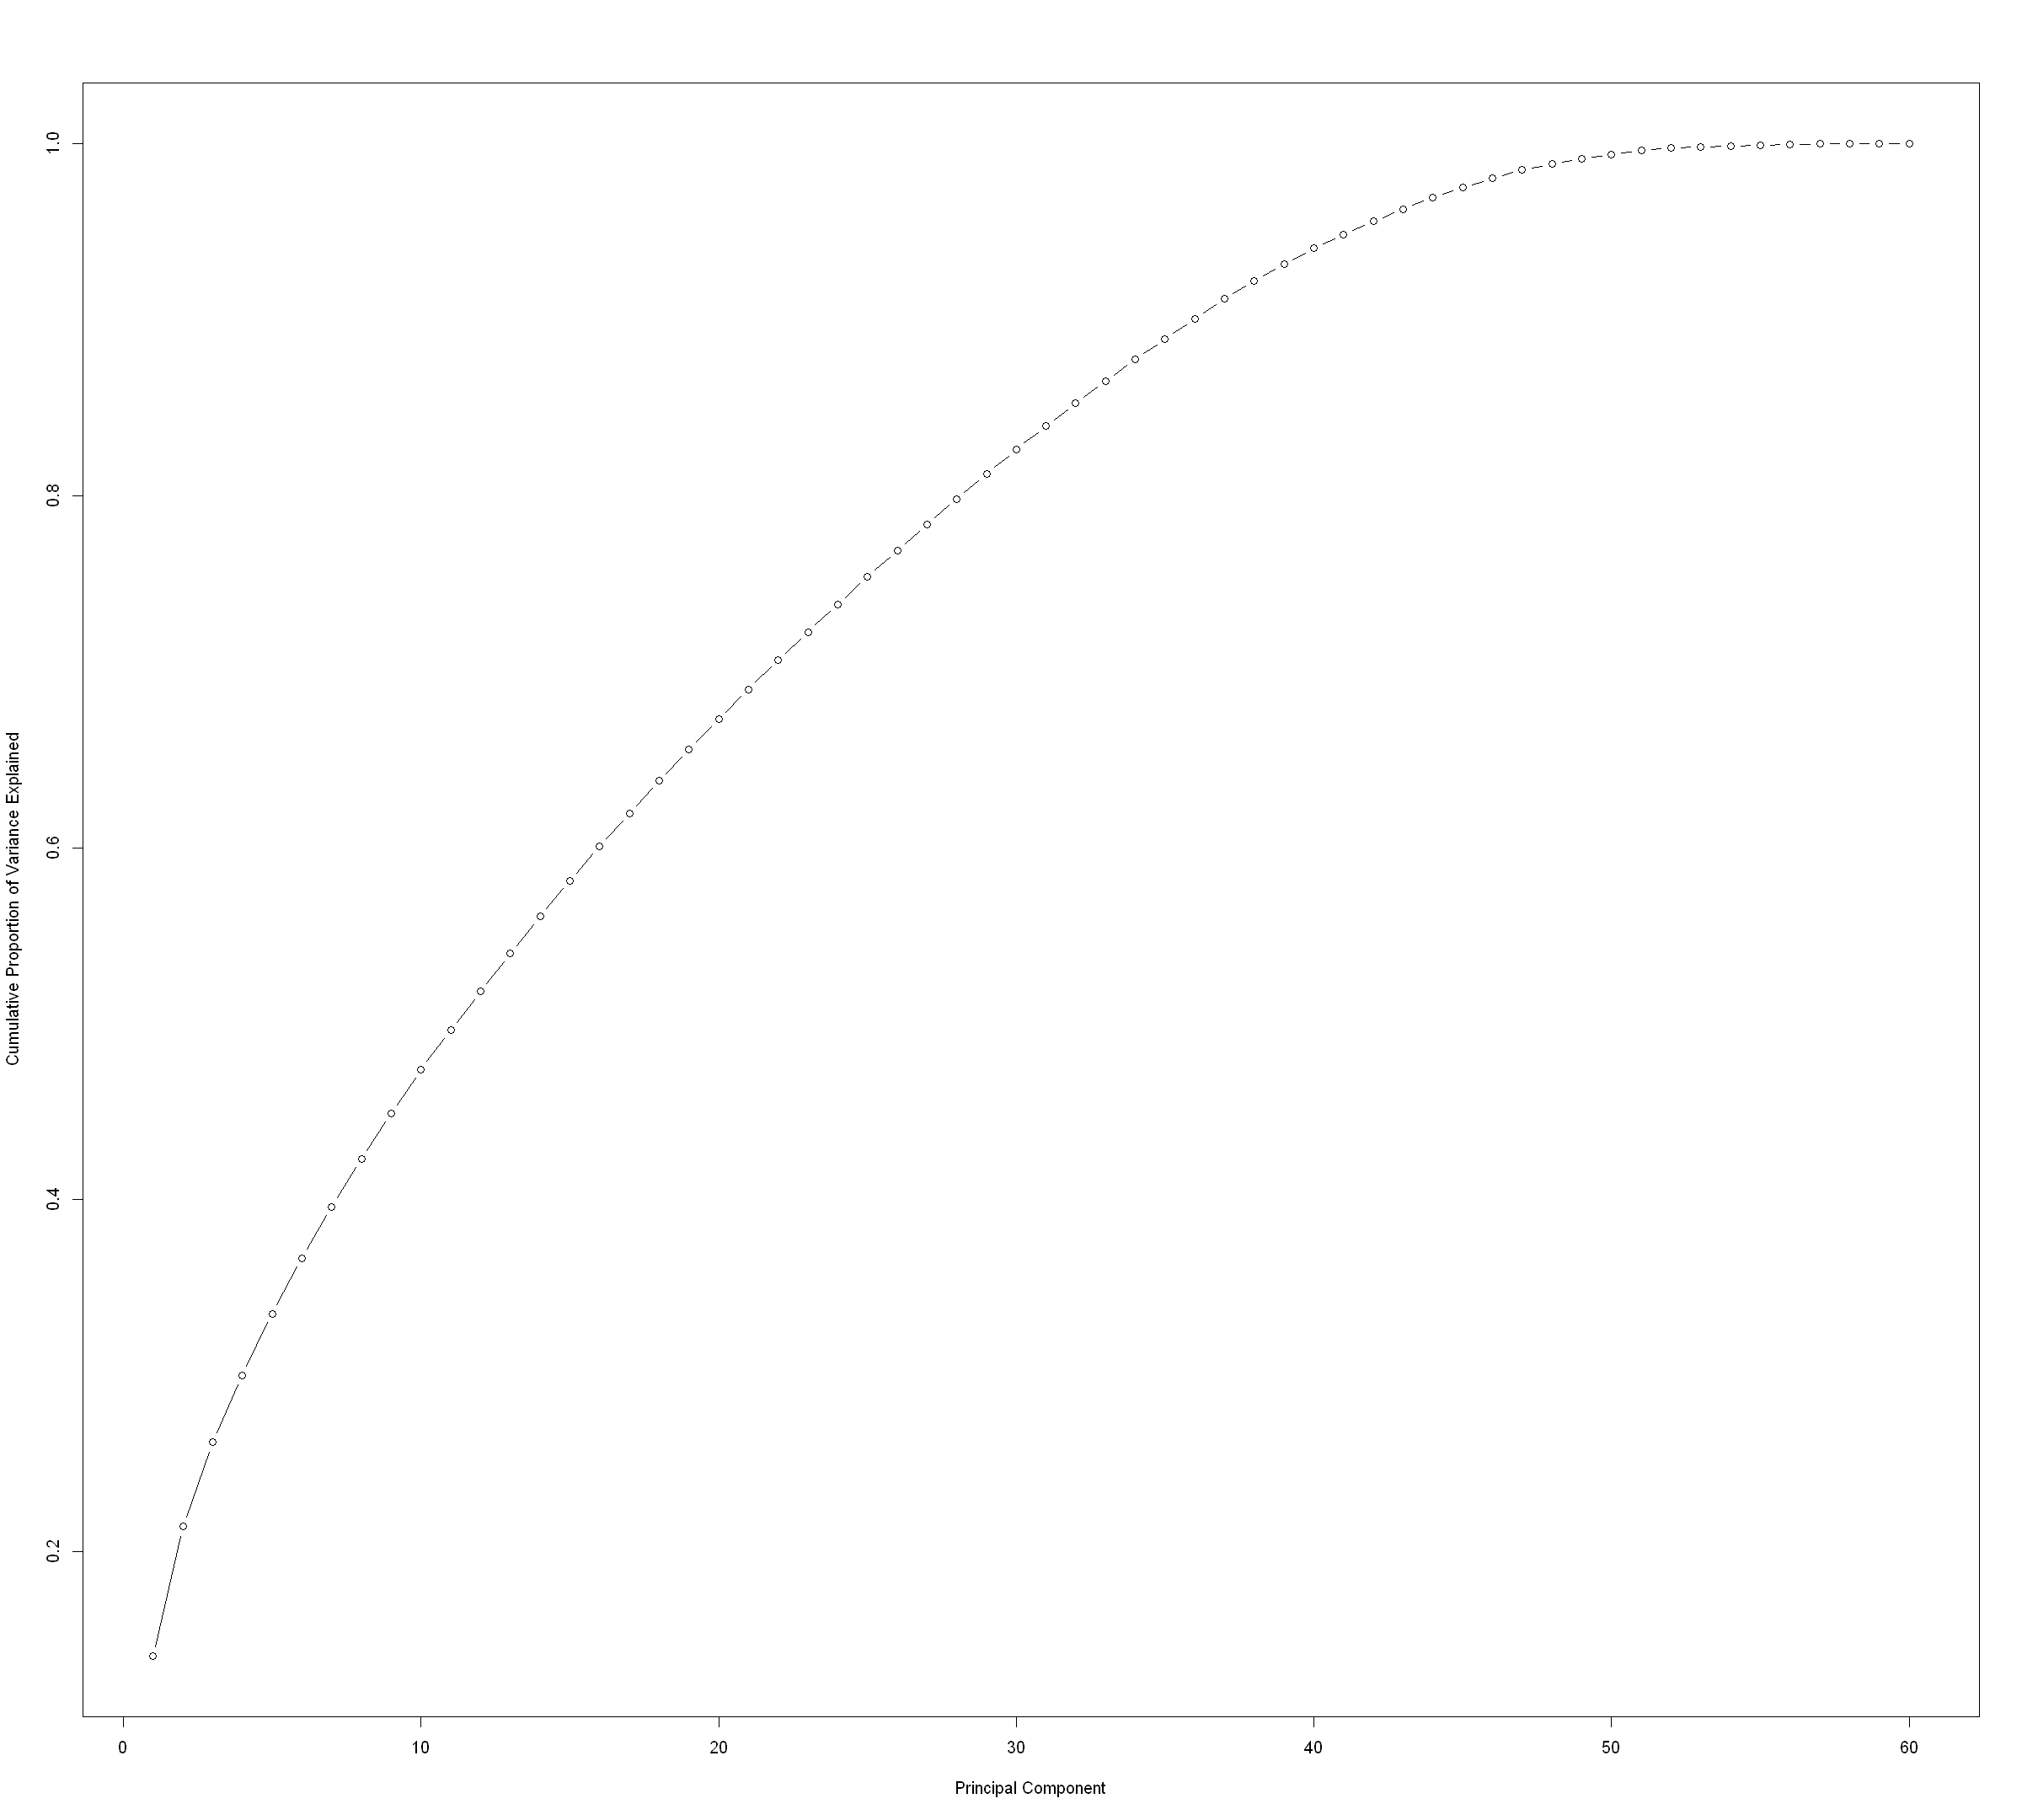

In [1293]:
plot(cumsum(prop_varex), xlab = "Principal Component",
              ylab = "Cumulative Proportion of Variance Explained",
              type = "b")

In [1294]:
eig.val <- get_eigenvalue(prin_comp)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,8.440751,14.067919,14.067919
Dim.2,4.419238,7.365396,21.433315
Dim.3,2.871002,4.785003,26.218318
Dim.4,2.287050,3.811749,30.030068
Dim.5,2.103088,3.505147,33.535215
Dim.6,1.888465,3.147442,36.682656
Dim.7,1.757339,2.928898,39.611554
Dim.8,1.623541,2.705902,42.317456
Dim.9,1.543510,2.572516,44.889972
Dim.10,1.502521,2.504202,47.394174


In [1295]:
dim(prin_comp$x)

[1] 2500   60

In [1296]:
prin_comp_train <- prin_comp$x[1:1500,]
prin_comp_validation <- prin_comp$x[1501:2000,]
prin_comp_test <- prin_comp$x[2001:2500,]

train_pca <- data.frame(OUTCOME = data$OUTCOME[1:1500], prin_comp_train)
train_pca <- train_pca[,1:33]

validation_pca <- data.frame(OUTCOME = data$OUTCOME[1501:2000], prin_comp_validation)
validation_pca <- validation_pca[,1:33]

test_pca <- data.frame(OUTCOME = data$OUTCOME[2001:2500], prin_comp_test)
test_pca <- test_pca[,1:33]


##### a. Logisitic Model 

###### Build the model

In [1297]:
model10 <- glm(OUTCOME~.,data = train_pca, family=binomial(logit))

###### Get the Predicted outputs

In [1298]:
pred_train_pca <- predict(model10, train_pca, type = "response")

###### Confusion Matrix

In [1299]:
table(train_pca$OUTCOME, pred_train_pca > 0.05, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0   817  591
     1    19   73

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_pca, data = train_pca)

Data: pred_train_pca in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.7544

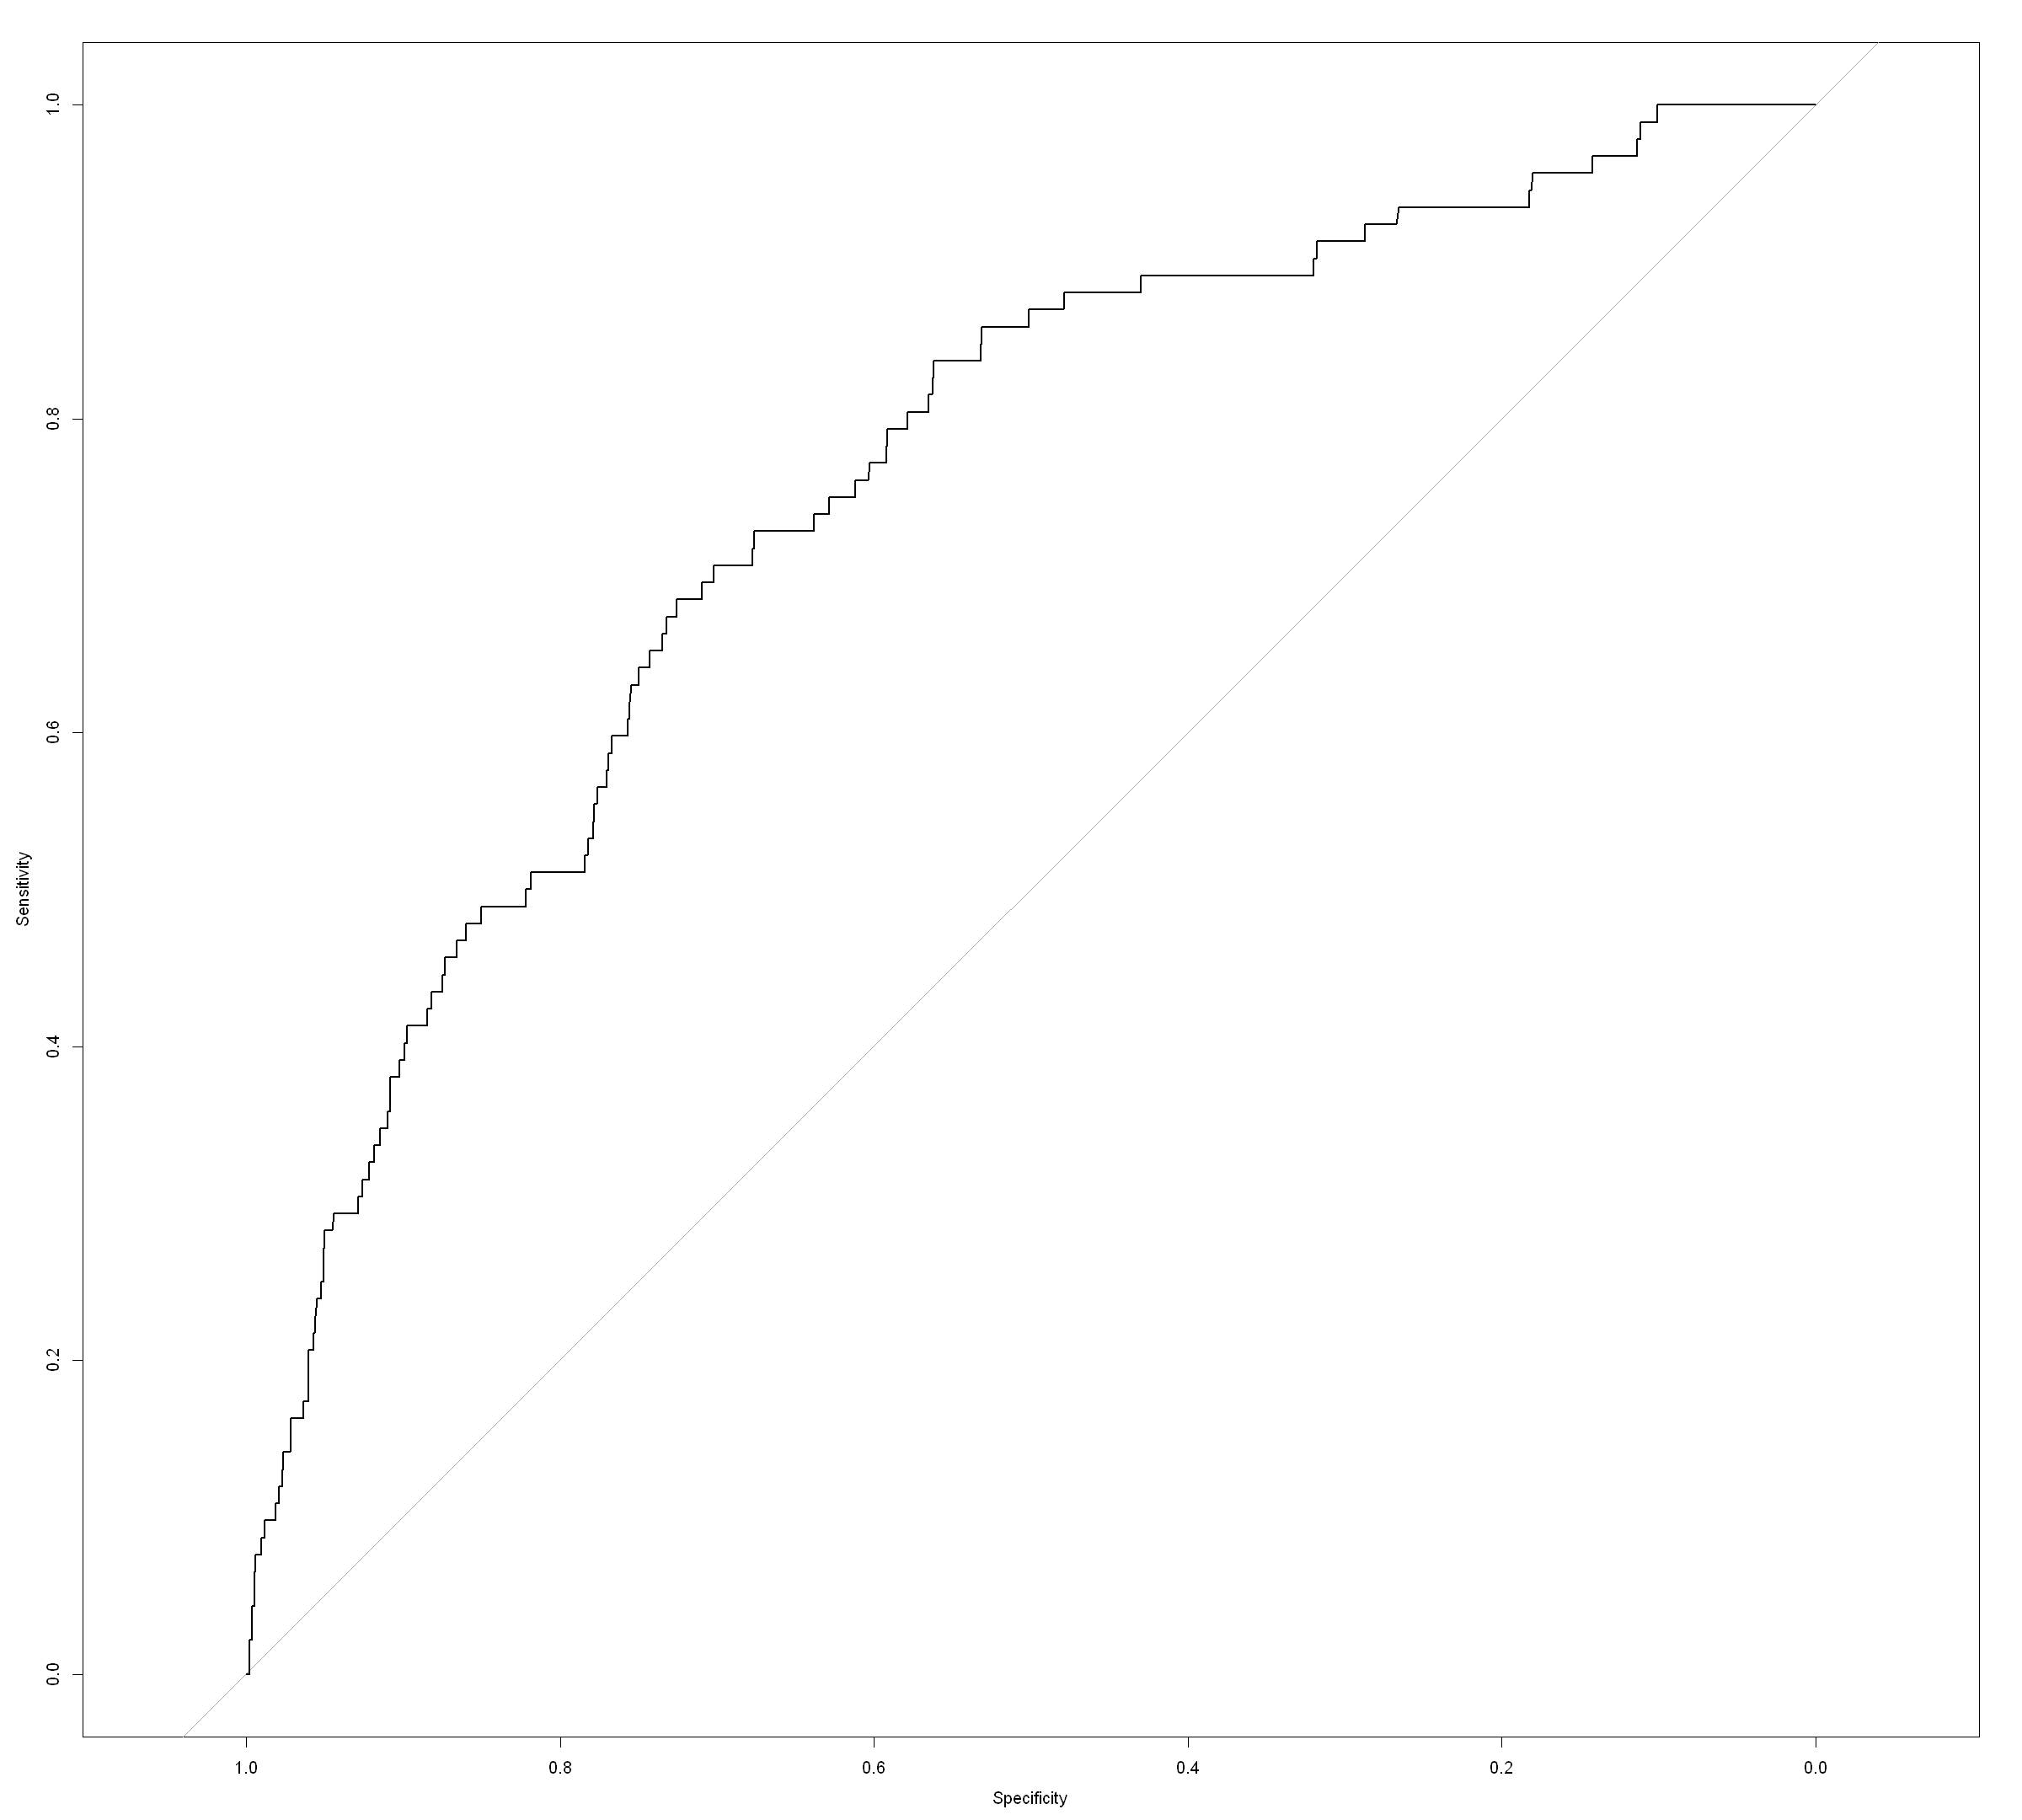

In [1300]:
roc_plot <- roc(OUTCOME ~ pred_train_pca, data = train_pca)
plot(roc_plot)

###### Get the Predicted outputs (validation set)

In [1301]:
pred_validation_pca <- predict(model10, validation_pca, type = "response")

###### Confusion Matrix

In [1302]:
table(validation_pca$OUTCOME, pred_validation_pca > 0.05, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0   286  185
     1     9   20

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_pca, data = validation_pca)

Data: pred_validation_pca in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.7373

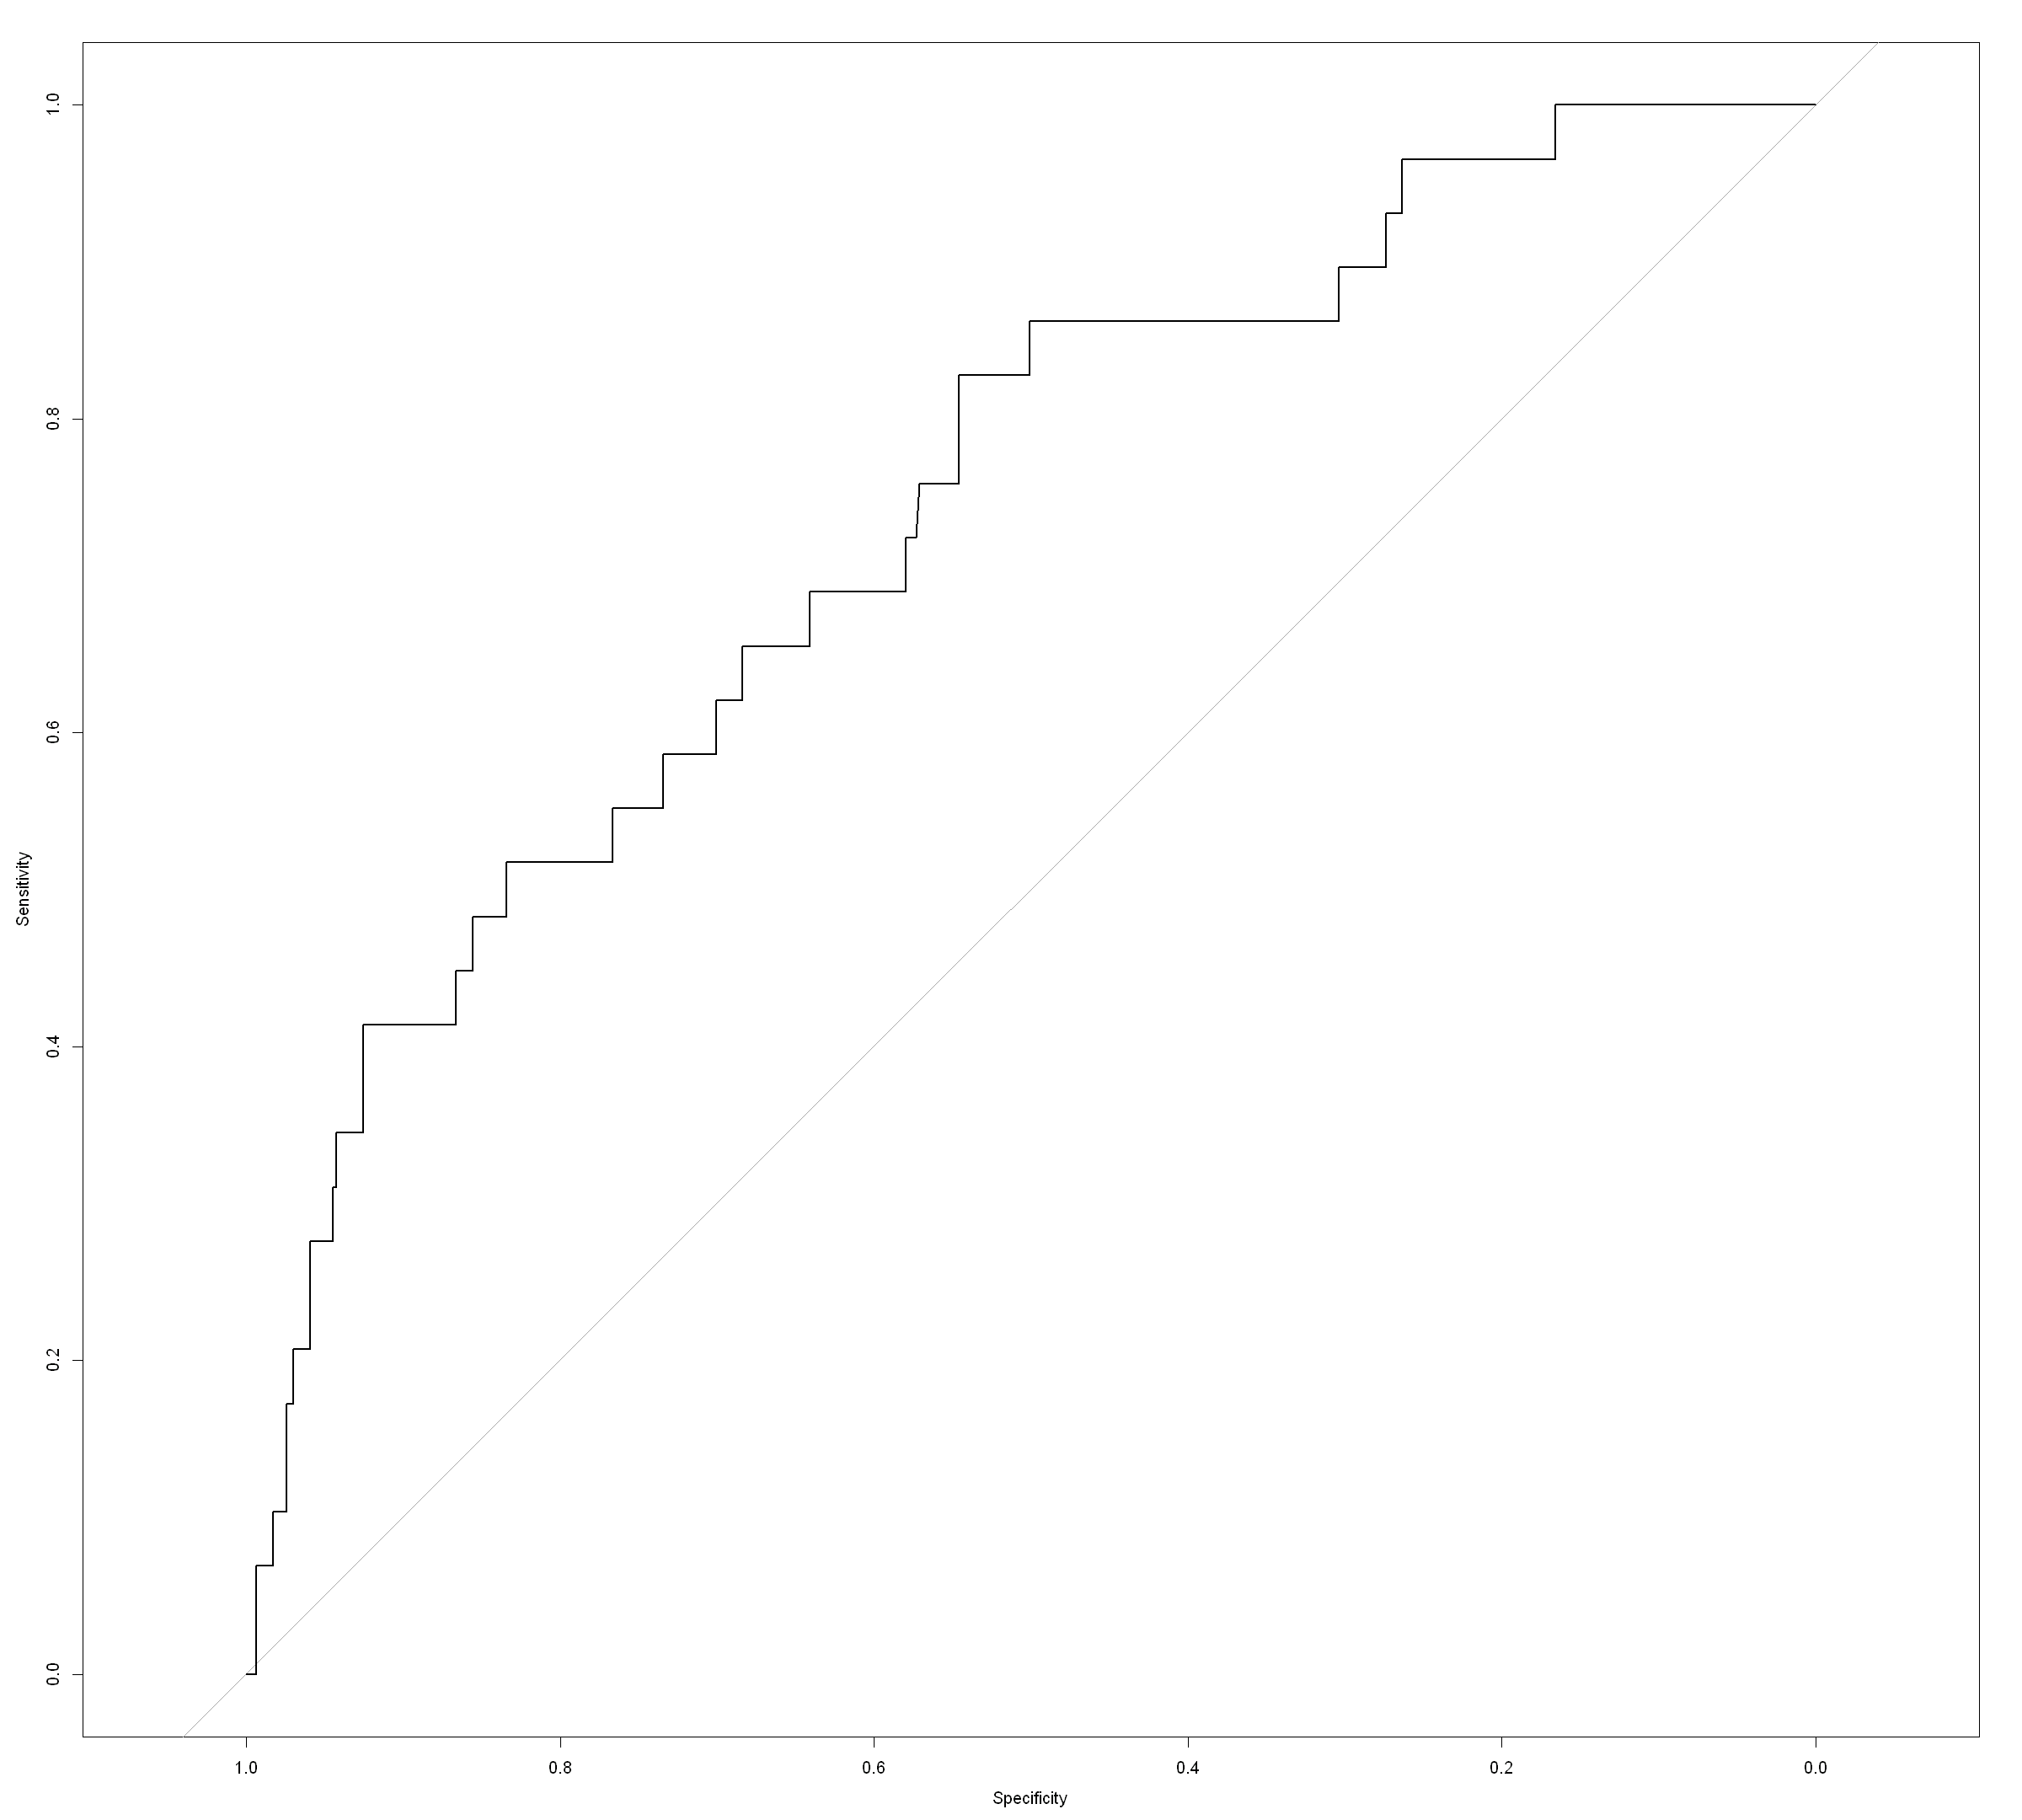

In [1303]:
roc_plot <- roc(OUTCOME ~ pred_validation_pca, data = validation_pca)
plot(roc_plot)

##### b. Decision Tree

###### Build the model

In [1304]:
model11 <- rpart(OUTCOME~.,data = train_pca, method = "class")

###### Get the Predicted outputs

In [1305]:
pred_train_pca_tree <- predict(model11, train_pca, type = "class")

In [1306]:
pred_train_pca_tree <- as.numeric(pred_train_pca_tree)

###### Confusion Matrix

In [1307]:
table(train_pca$OUTCOME, pred_train_pca_tree, dnn = c("Actual", "Predicted"))

      Predicted
Actual    1
     0 1408
     1   92

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_pca_tree, data = train_pca)

Data: pred_train_pca_tree in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.5

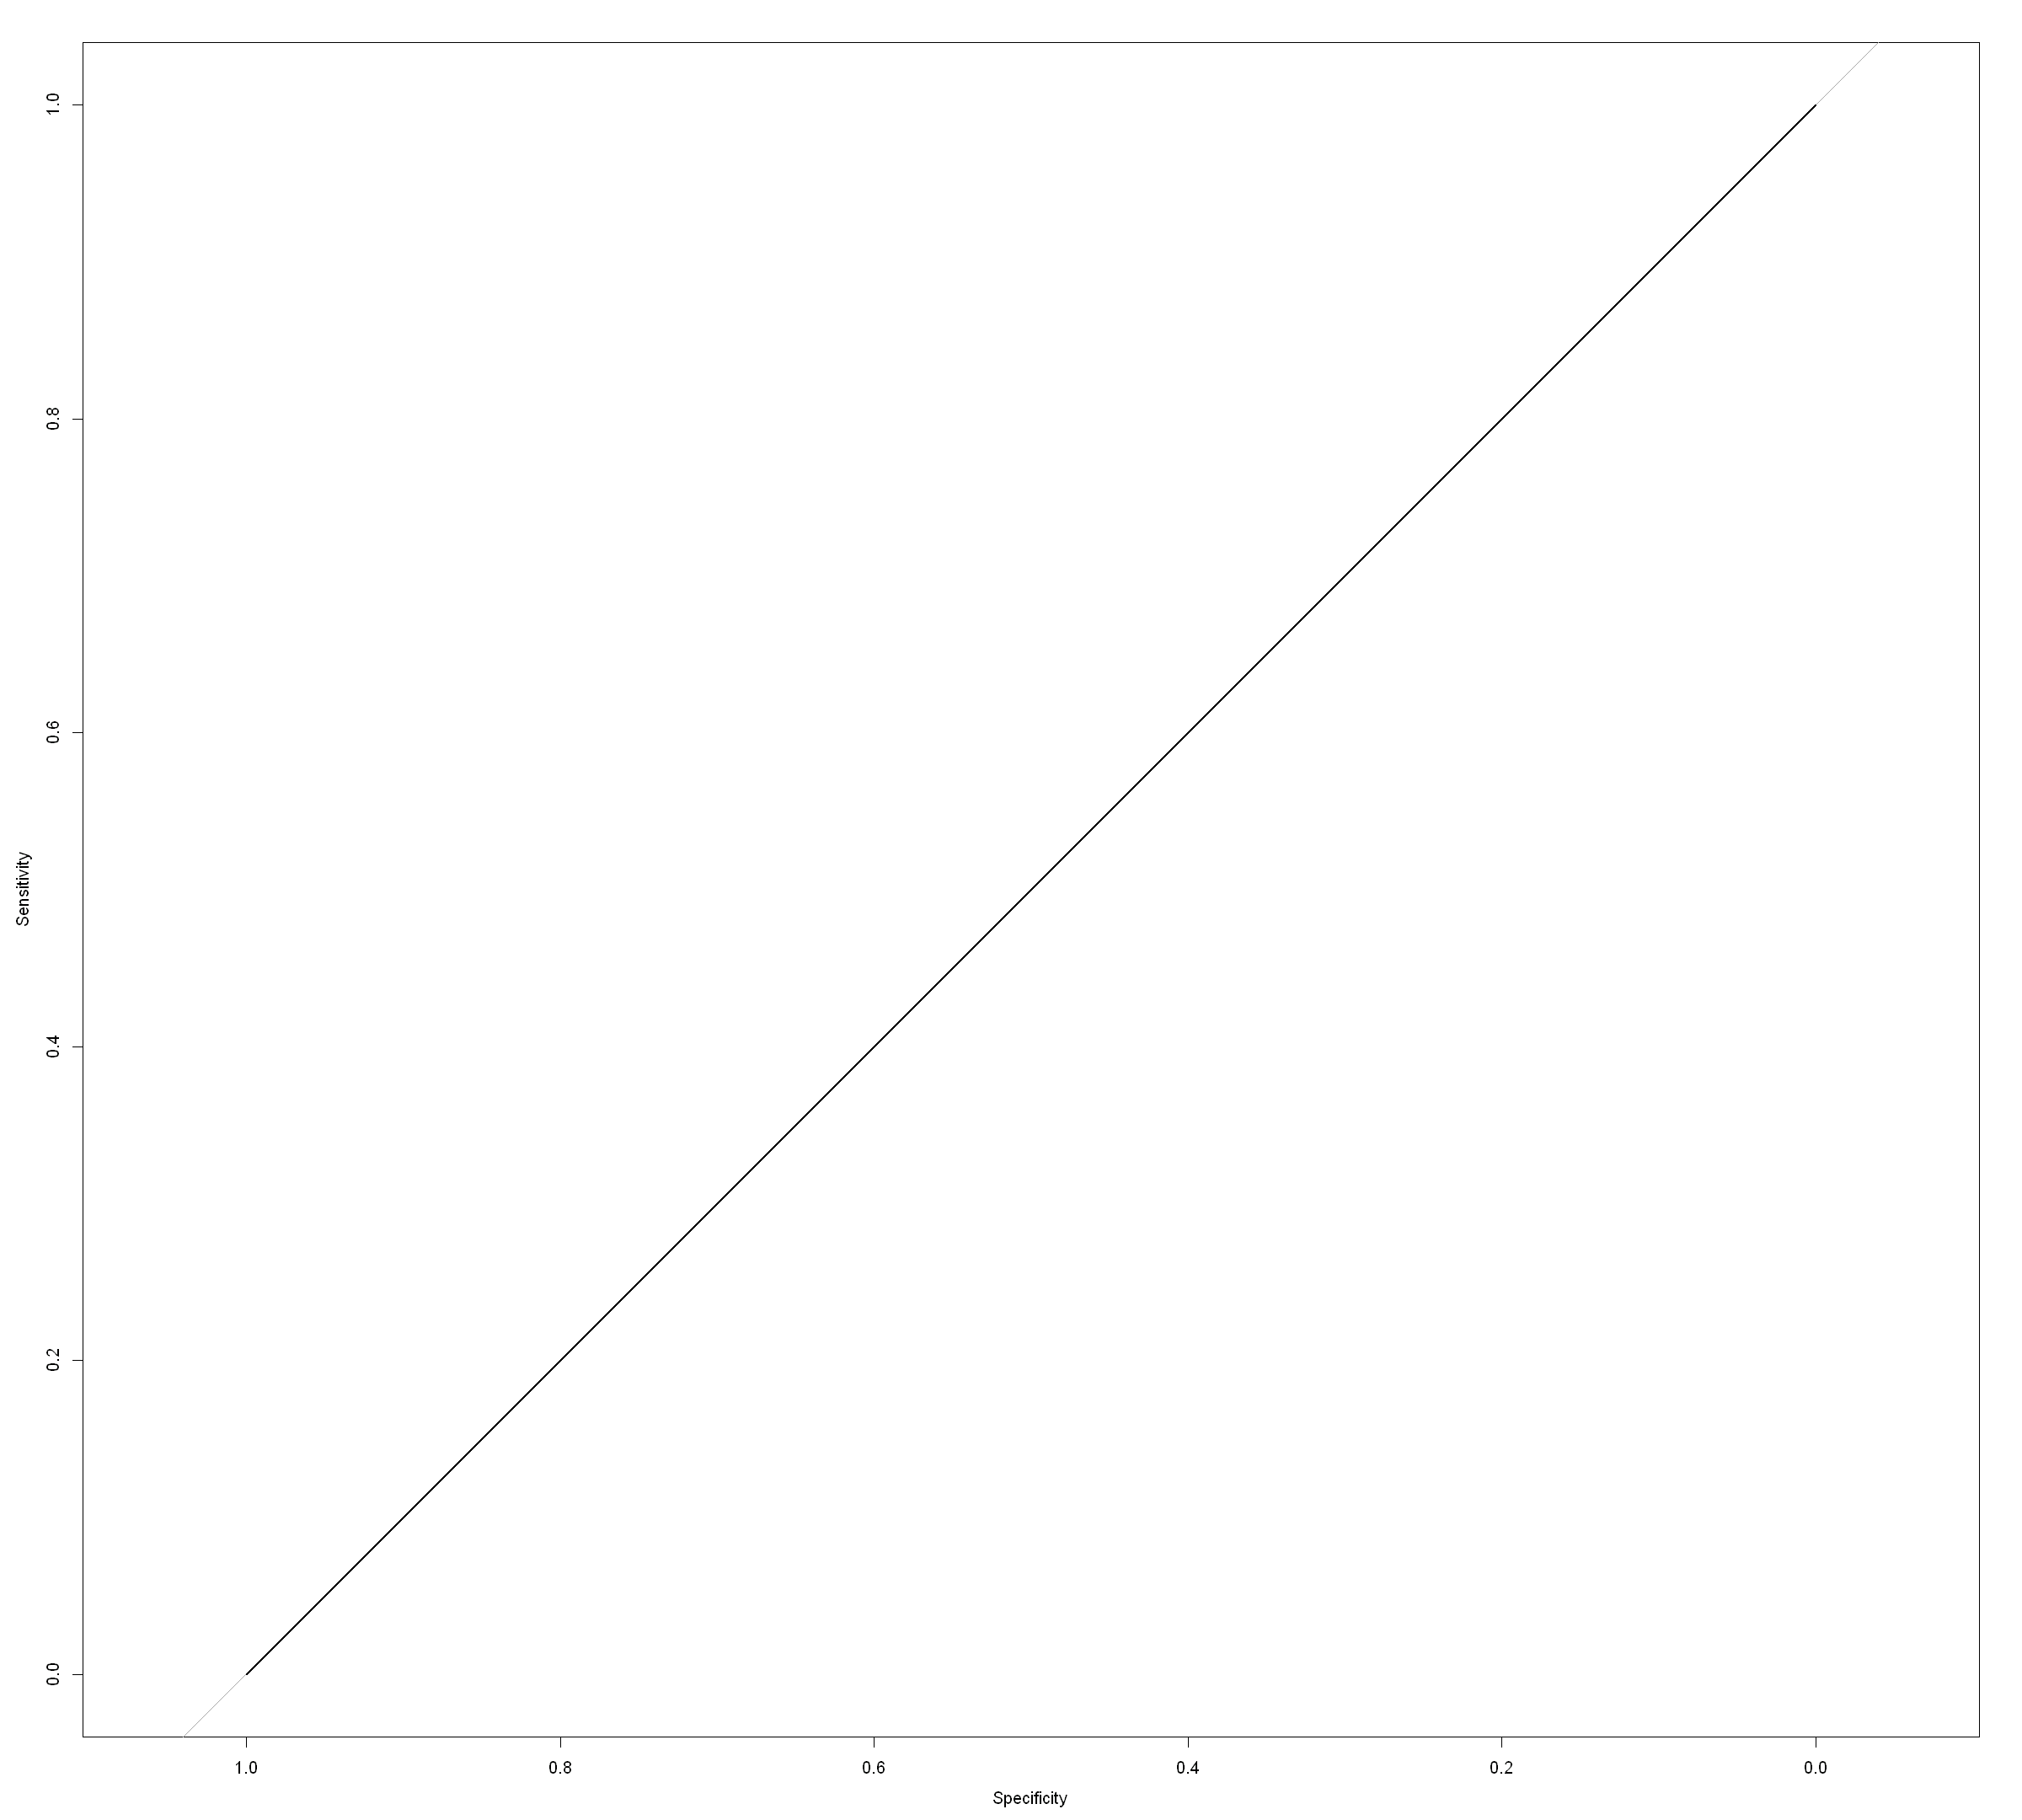

In [1308]:
roc_plot <- roc(OUTCOME ~ pred_train_pca_tree, data = train_pca)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1309]:
pred_validation_pca_tree <- predict(model11, validation_pca, type = "class")

In [1310]:
pred_validation_pca_tree <- as.numeric(pred_validation_pca_tree)

###### Confusion Matrix

In [1311]:
table(validation_pca$OUTCOME, pred_validation_pca_tree, dnn = c("Actual", "Predicted"))

      Predicted
Actual   1
     0 471
     1  29

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_pca_tree, data = validation_pca)

Data: pred_validation_pca_tree in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.5

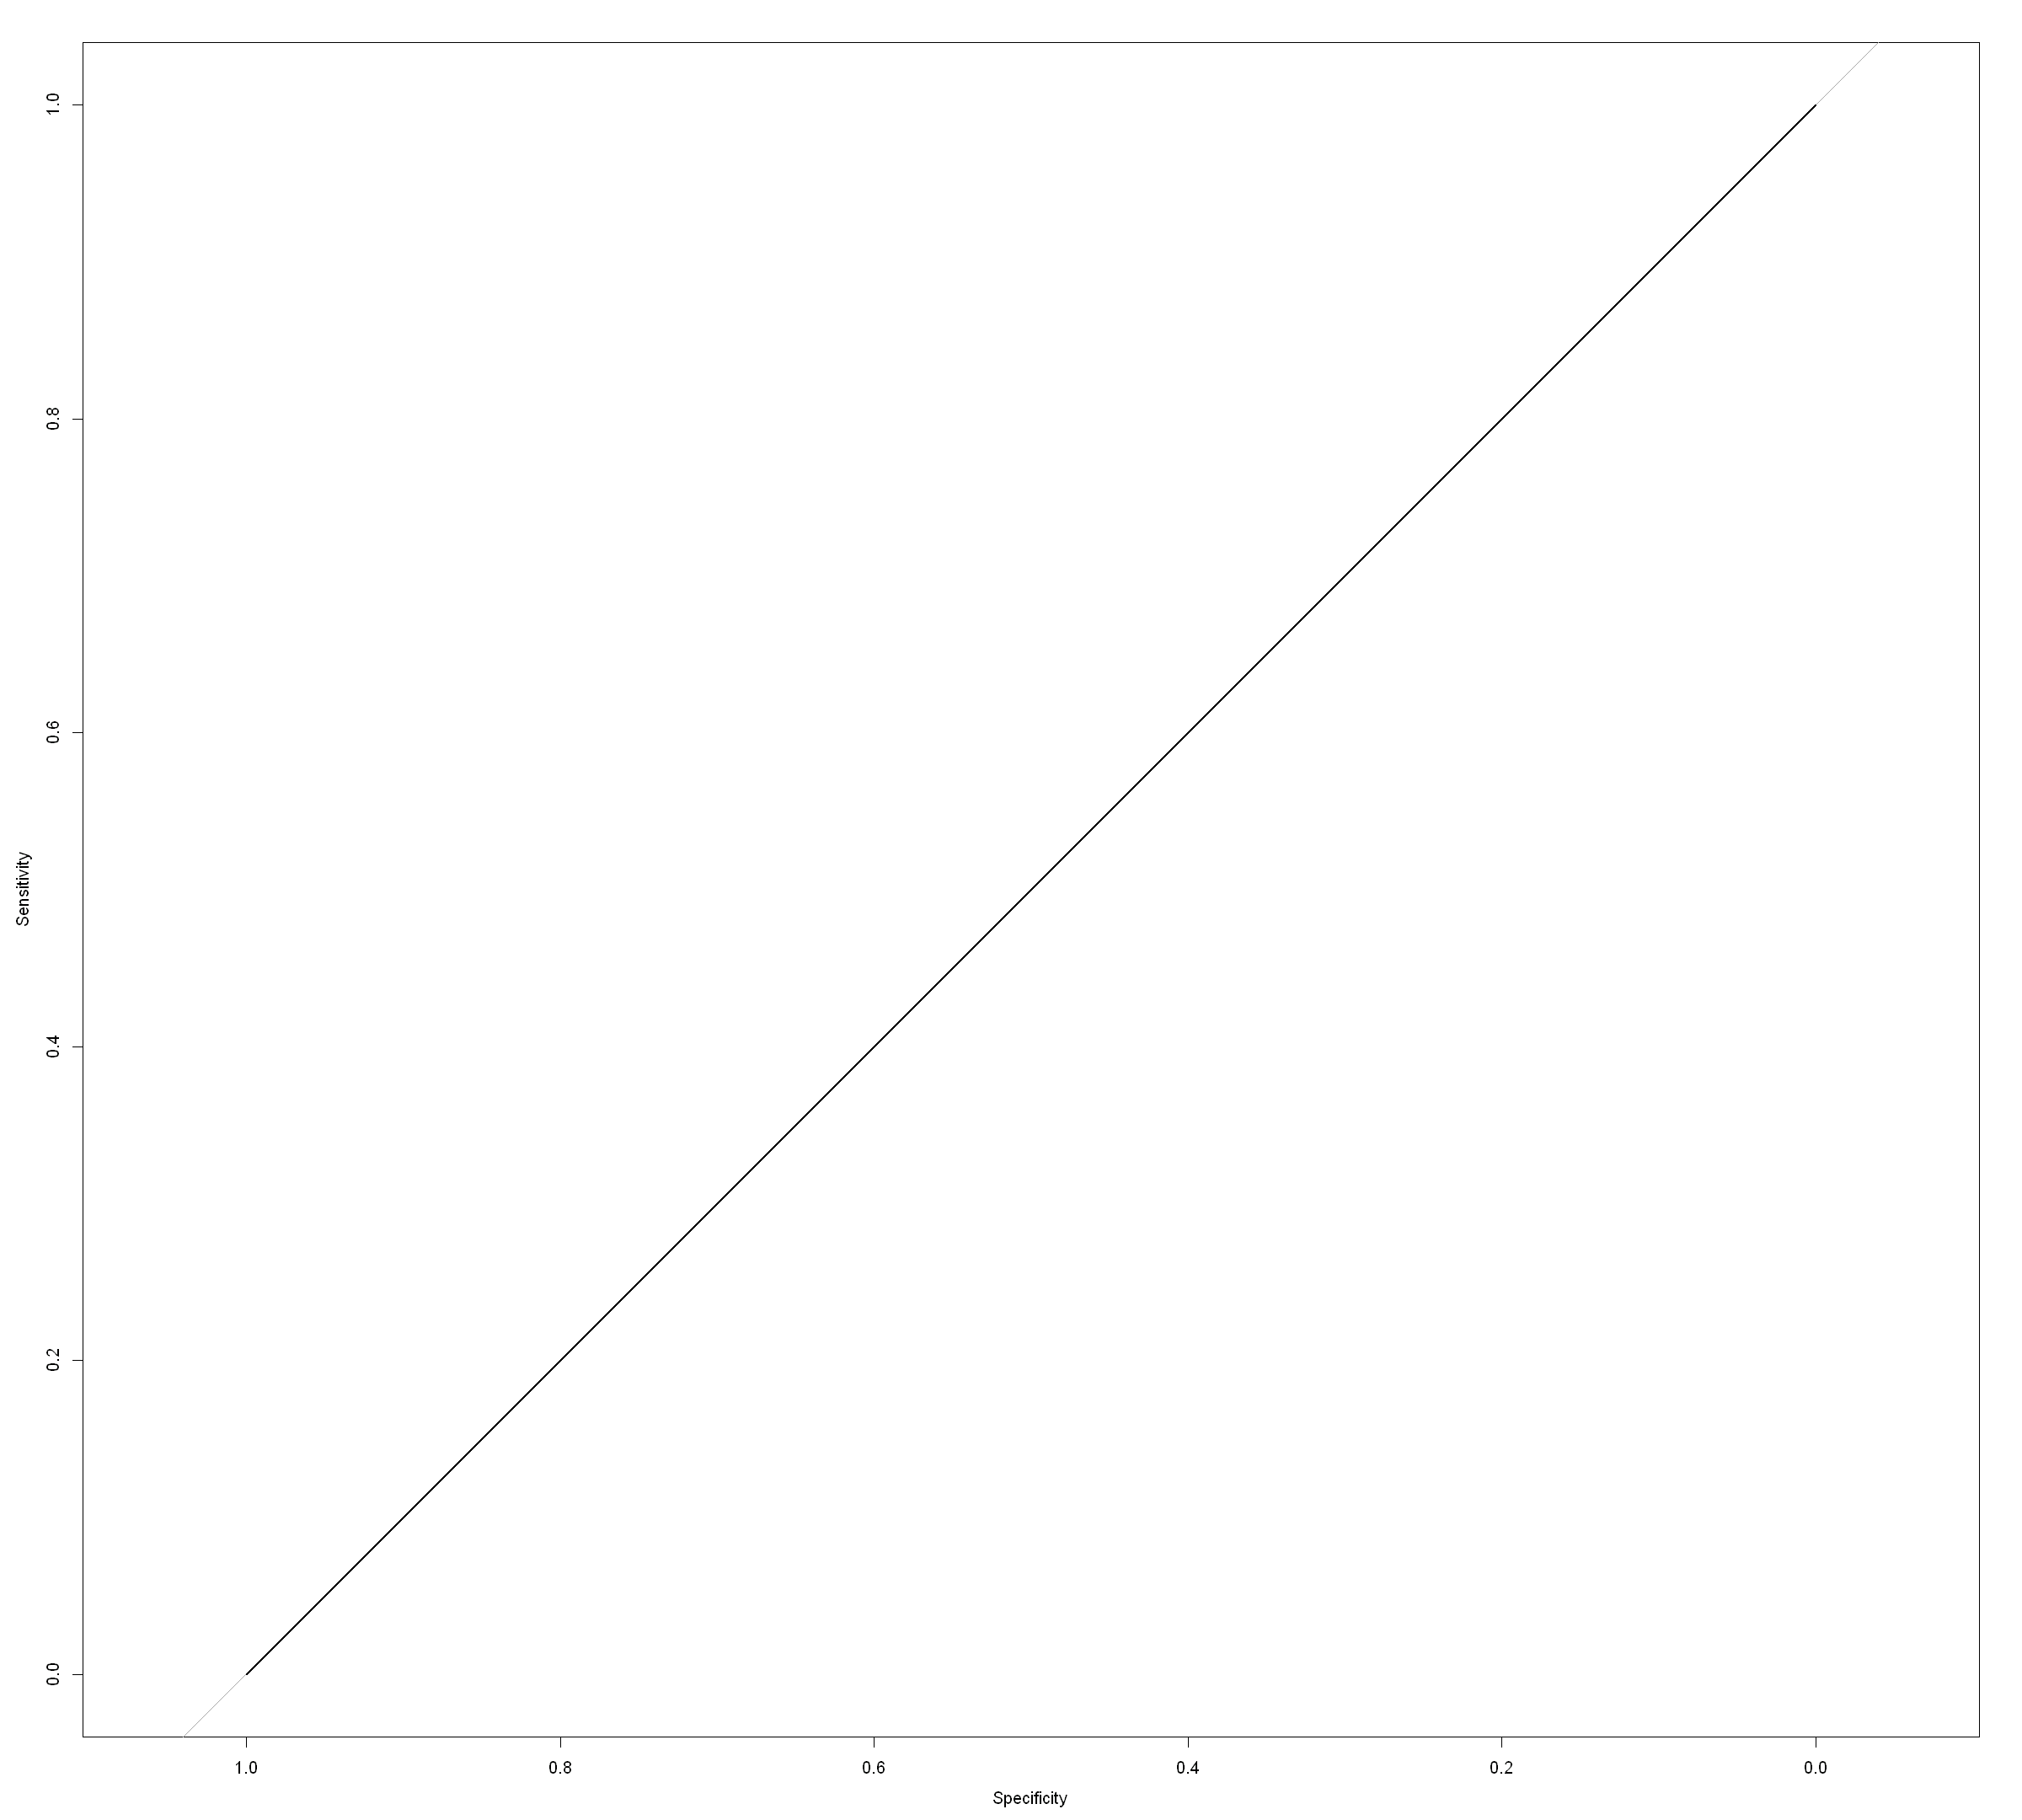

In [1312]:
roc_plot <- roc(OUTCOME ~ pred_validation_pca_tree, data = validation_pca)
plot(roc_plot)

##### c. Random Forest

###### Build the model

In [1313]:
model12 <- randomForest(OUTCOME~.,data = train_pca, ntree = 500)

###### Get the Predicted outputs

In [1314]:
pred_train_pca_random <- predict(model12, train_pca)

In [1315]:
pred_train_pca_random <- as.numeric(pred_train_pca_random)
pred_train_pca_random[pred_train_pca_random == 1] <- 0
pred_train_pca_random[pred_train_pca_random == 2] <- 1

###### Confusion Matrix

In [1316]:
table(train_pca$OUTCOME, pred_train_pca_random, dnn = c("Actual", "Predicted"))

      Predicted
Actual    0    1
     0 1408    0
     1   13   79

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_pca_random, data = train_pca)

Data: pred_train_pca_random in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.9293

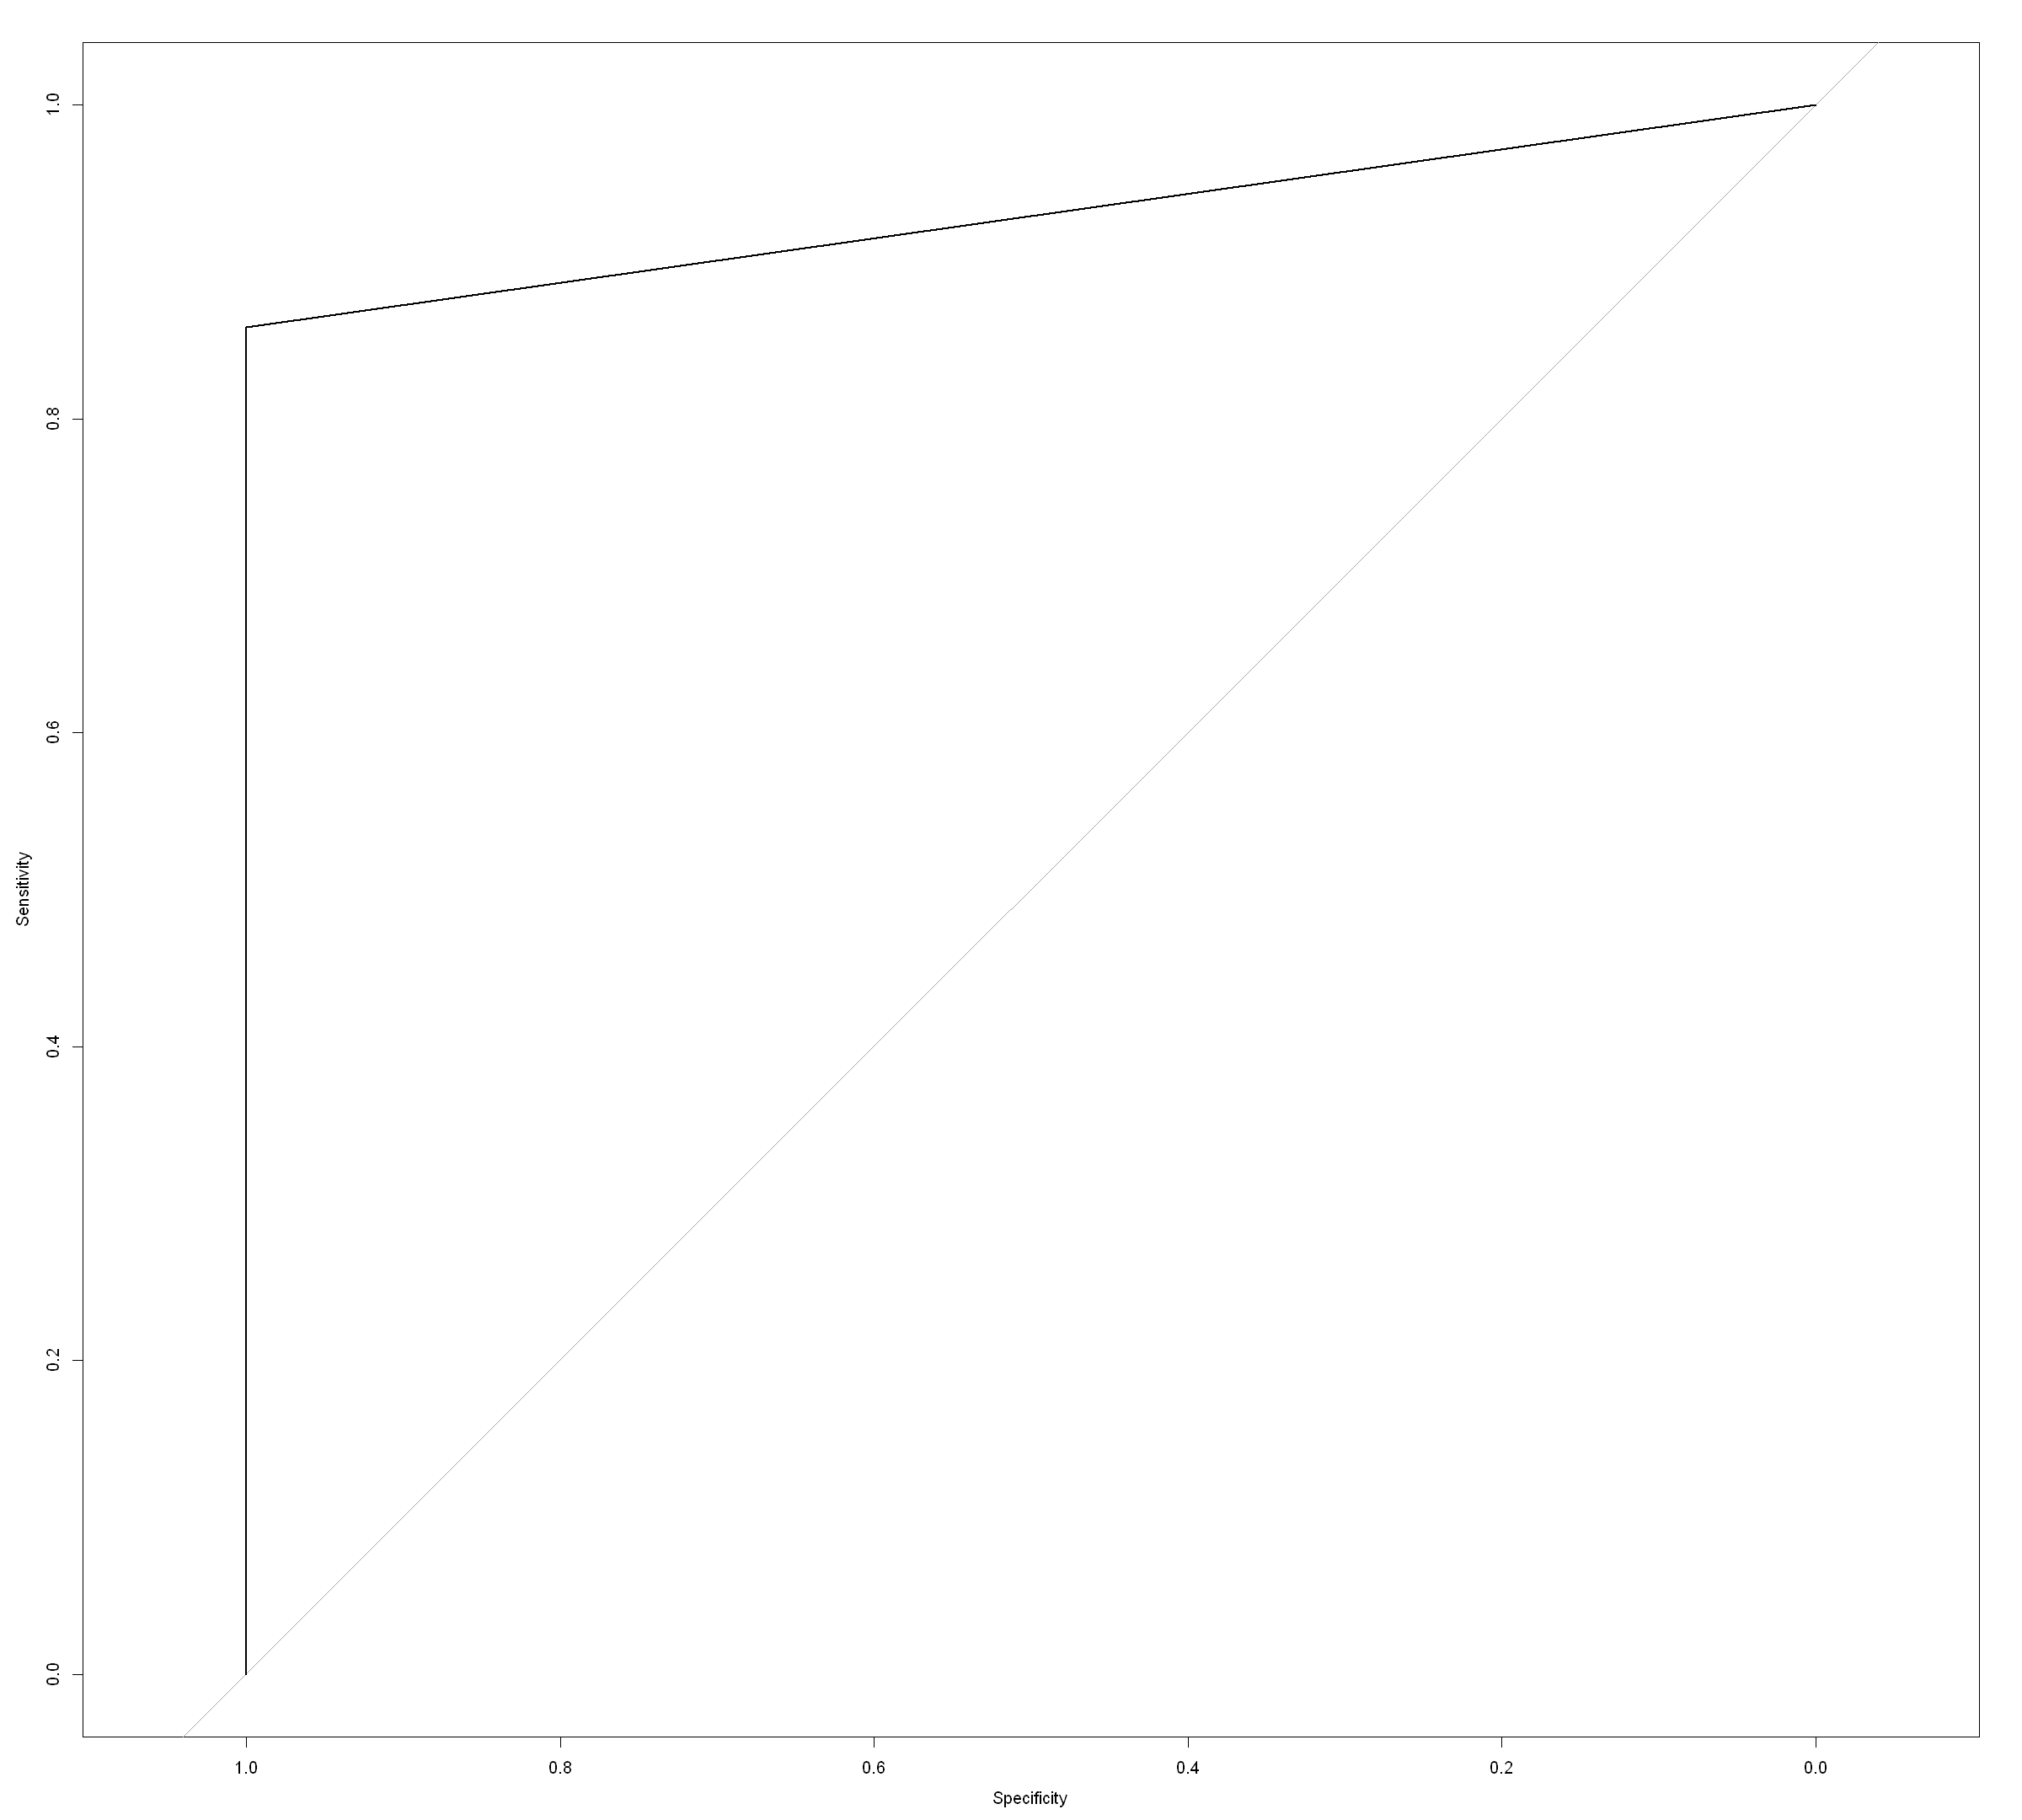

In [1317]:
roc_plot <- roc(OUTCOME ~ pred_train_pca_random, data = train_pca)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1318]:
pred_validation_pca_random <- predict(model12, validation_pca)

In [1319]:
pred_validation_pca_random <- as.numeric(pred_validation_pca_random)
pred_validation_pca_random[pred_validation_pca_random == 1] <- 0
pred_validation_pca_random[pred_validation_pca_random == 2] <- 1

###### Confusion Matrix

In [1320]:
table(validation_pca$OUTCOME, pred_validation_pca_random, dnn = c("Actual", "Predicted"))

      Predicted
Actual   0   1
     0 467   4
     1  29   0

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_pca_random, data = train_pca)

Data: pred_train_pca_random in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.9293

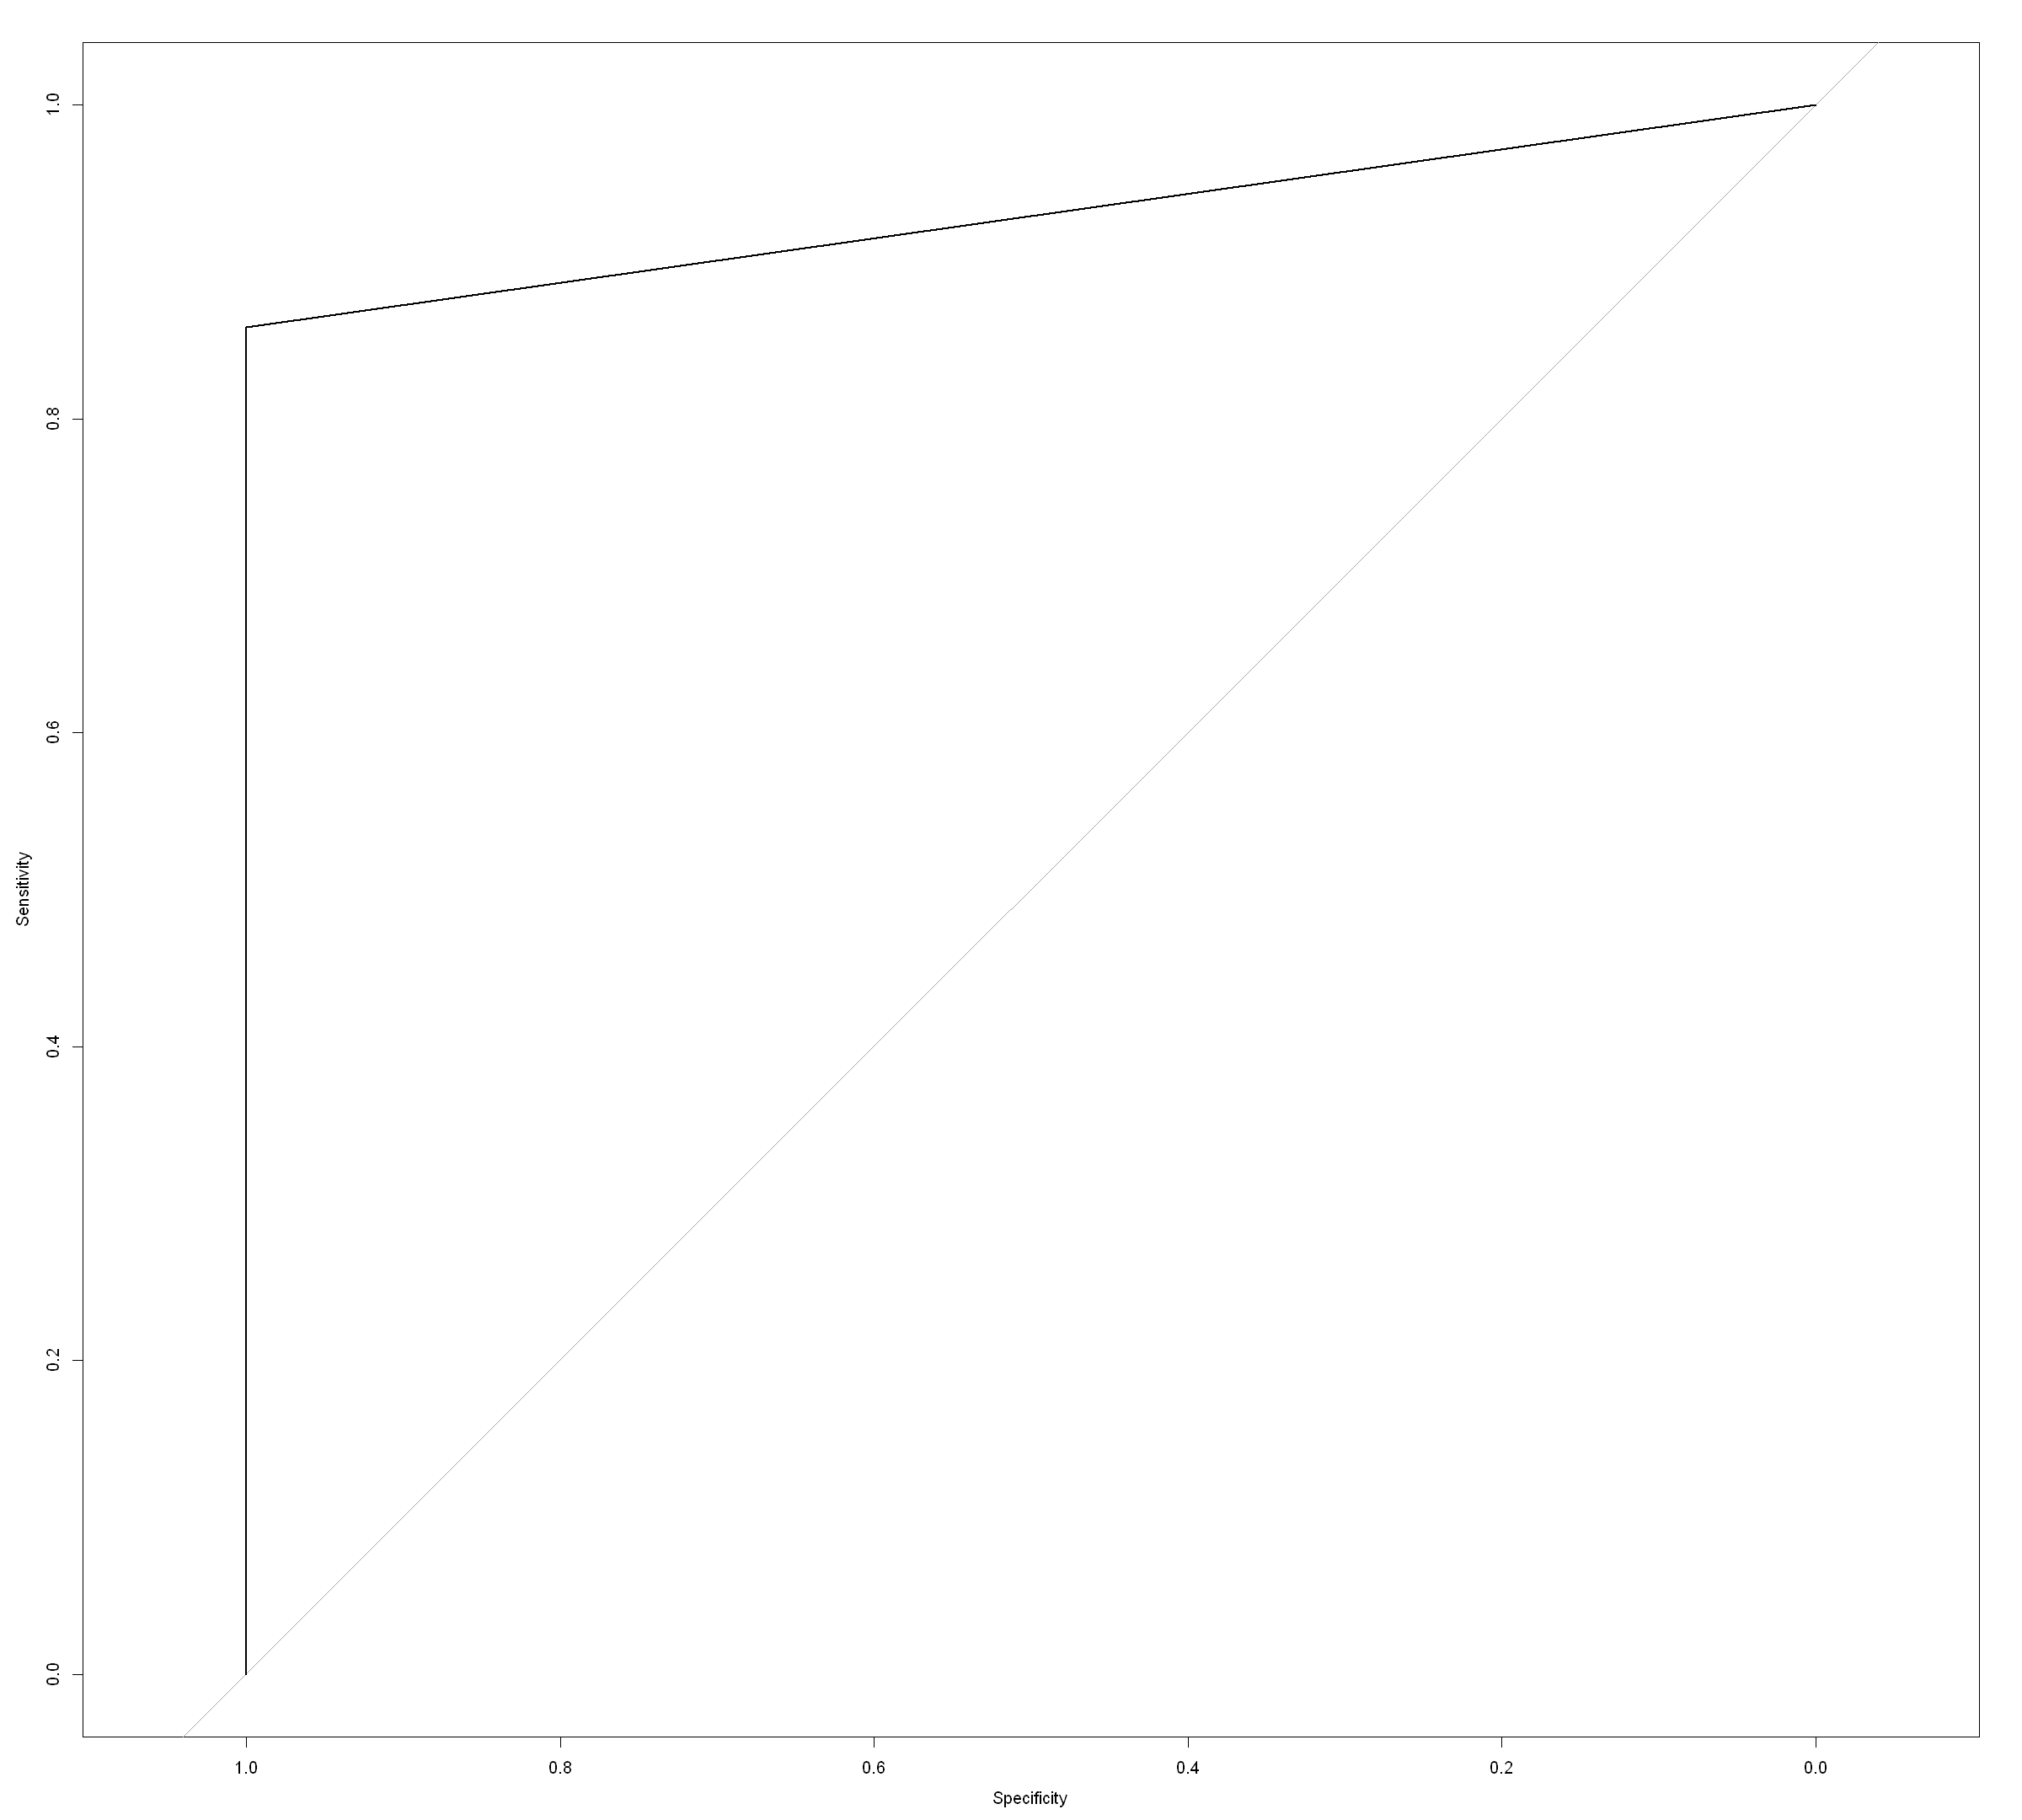

In [1321]:
roc_plot <- roc(OUTCOME ~ pred_train_pca_random, data = train_pca)
plot(roc_plot)

##### d. Support Vector Machines (SVM)

###### Build the model

In [1322]:
model13 <- svm(OUTCOME~.,data = train_pca)

###### Get the Predicted outputs

In [1323]:
pred_train_pca_svm <- predict(model13, train_pca)

In [1324]:
pred_train_pca_svm <- as.numeric(pred_train_pca_svm)
pred_train_pca_svm[pred_train_pca_svm == 1] <- 0
pred_train_pca_svm[pred_train_pca_svm == 2] <- 1

###### Confusion Matrix

In [1325]:
table(train_pca$OUTCOME, pred_train_pca_svm, dnn = c("Actual", "Predicted"))

      Predicted
Actual    0    1
     0 1408    0
     1   87    5

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_pca_svm, data = train_pca)

Data: pred_train_pca_svm in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.5272

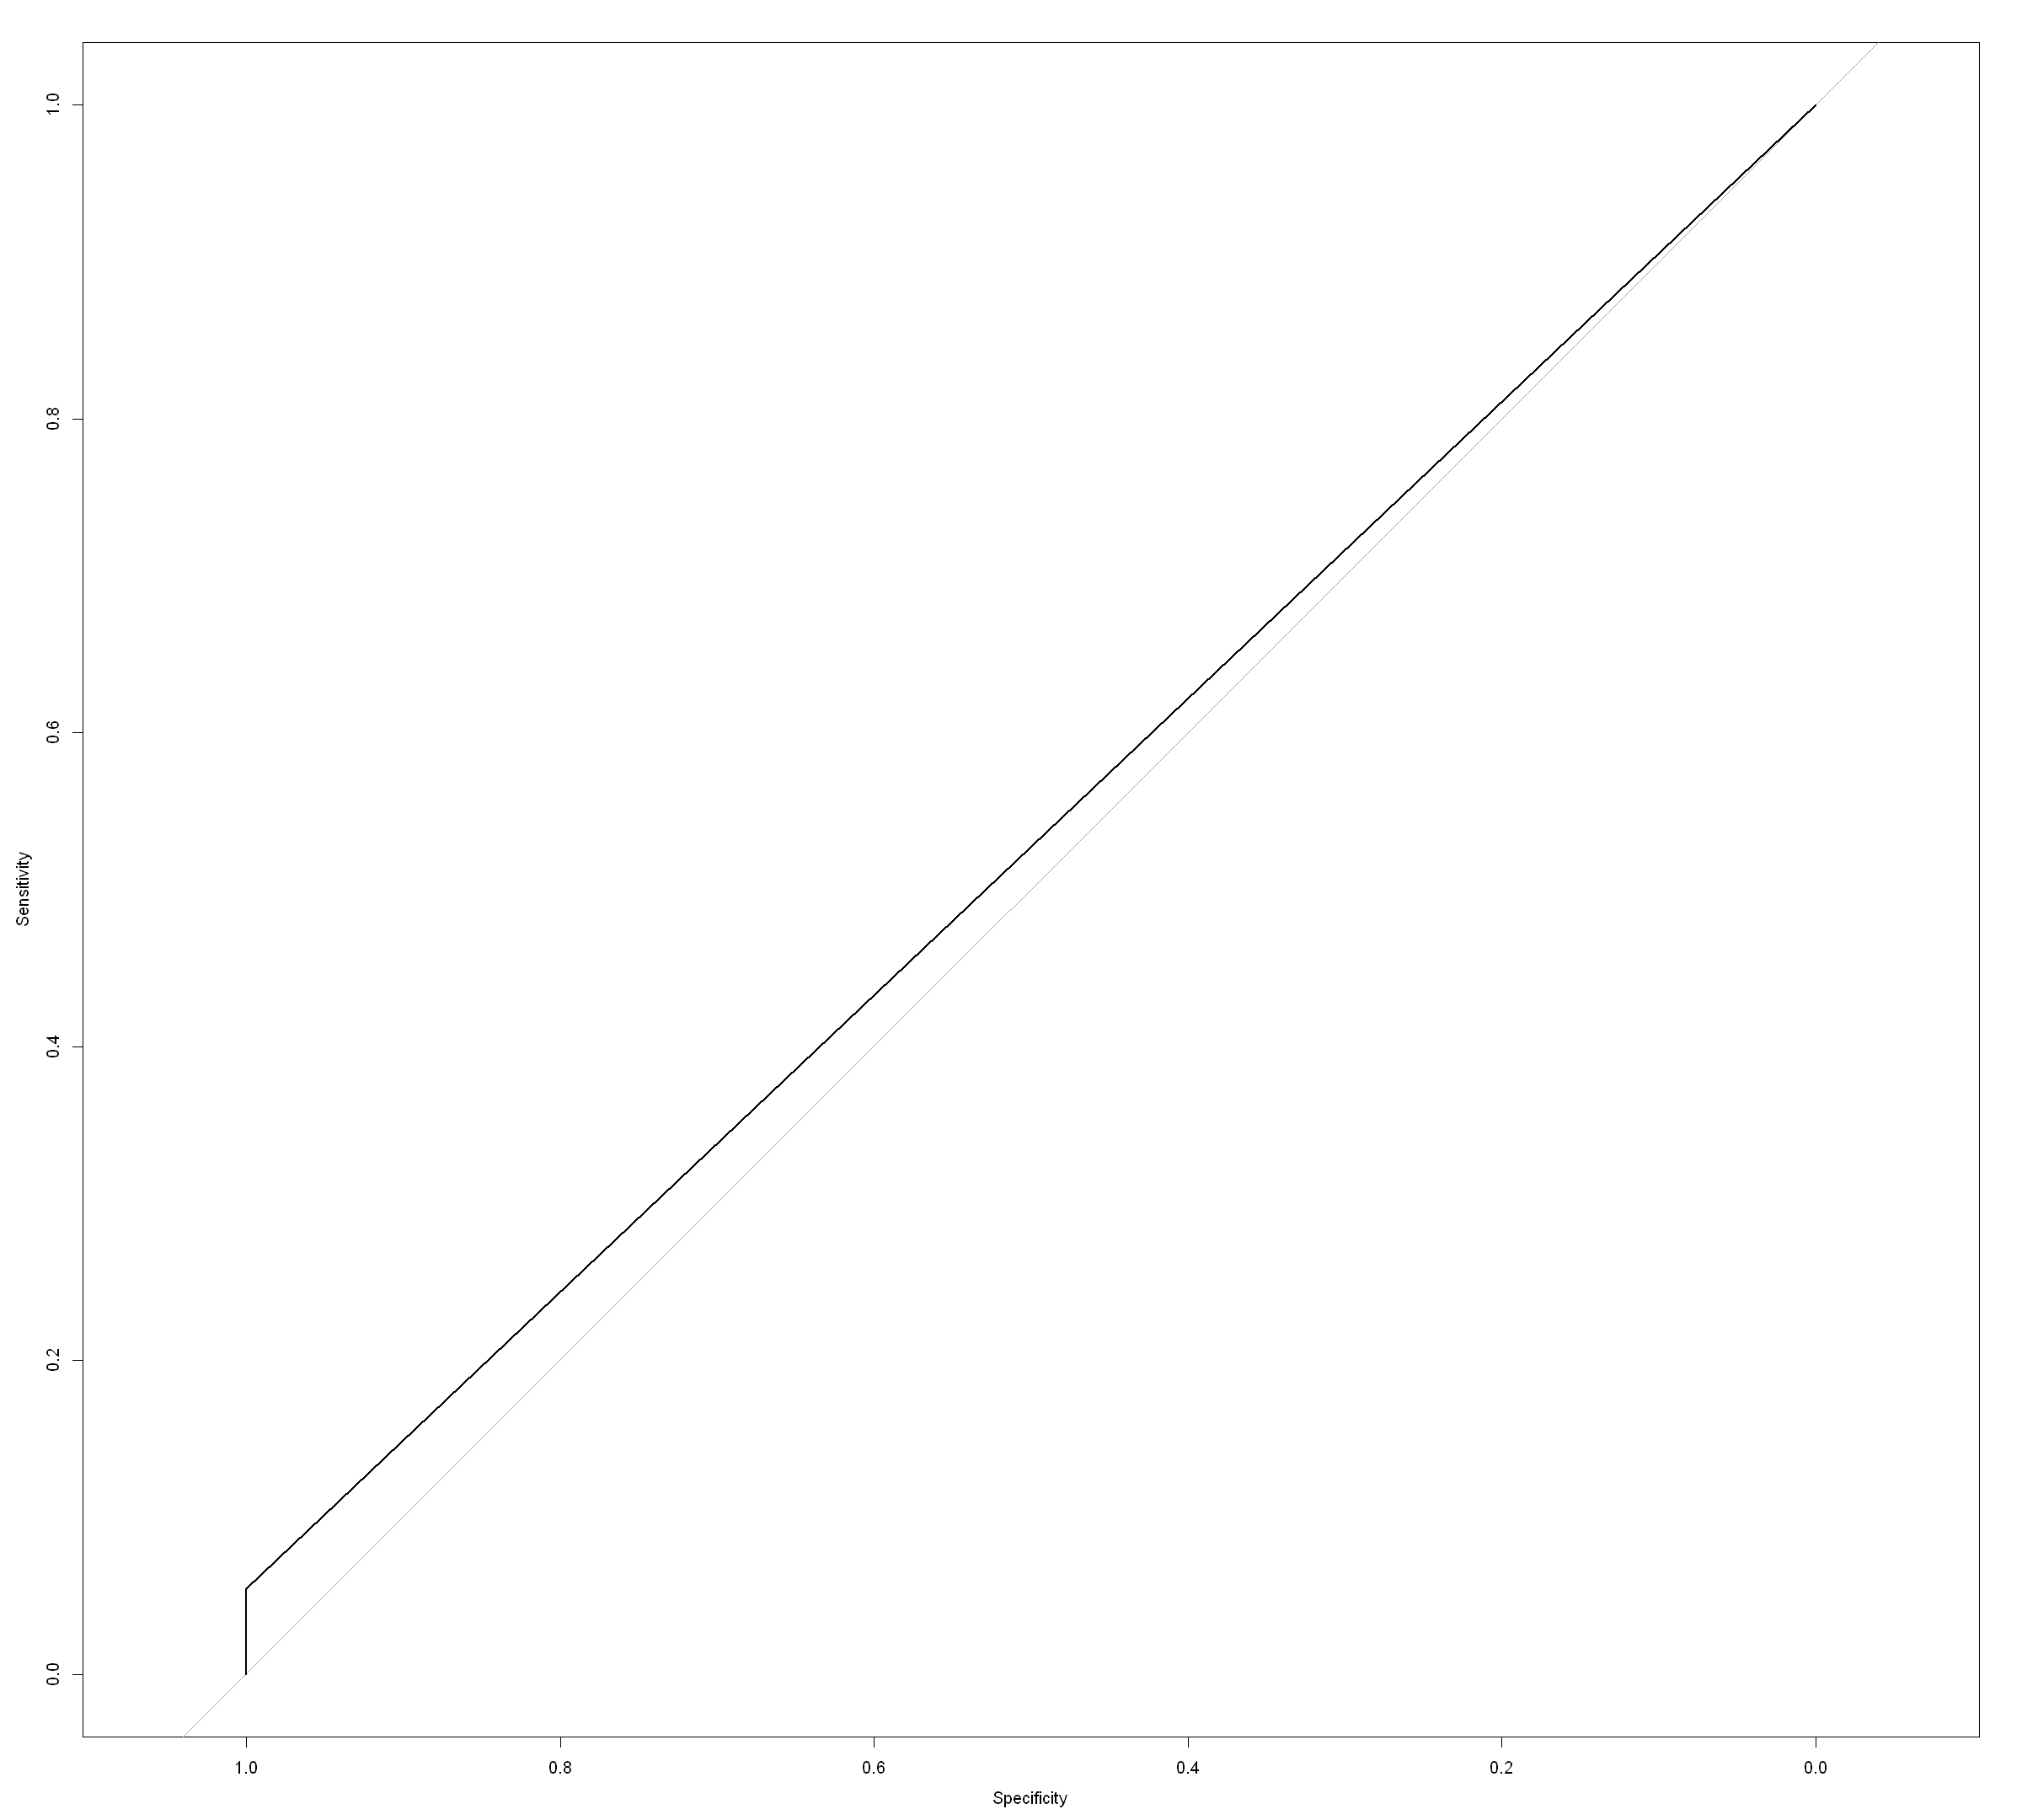

In [1326]:
roc_plot <- roc(OUTCOME ~ pred_train_pca_svm, data = train_pca)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1327]:
pred_validation_pca_svm <- predict(model13, validation_pca)

In [1328]:
pred_validation_pca_svm <- as.numeric(pred_validation_pca_svm)

###### Confusion Matrix

In [1329]:
table(validation_pca$OUTCOME, pred_validation_pca_svm, dnn = c("Actual", "Predicted"))

      Predicted
Actual   1
     0 471
     1  29

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_pca_svm, data = validation_pca)

Data: pred_validation_pca_svm in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.5

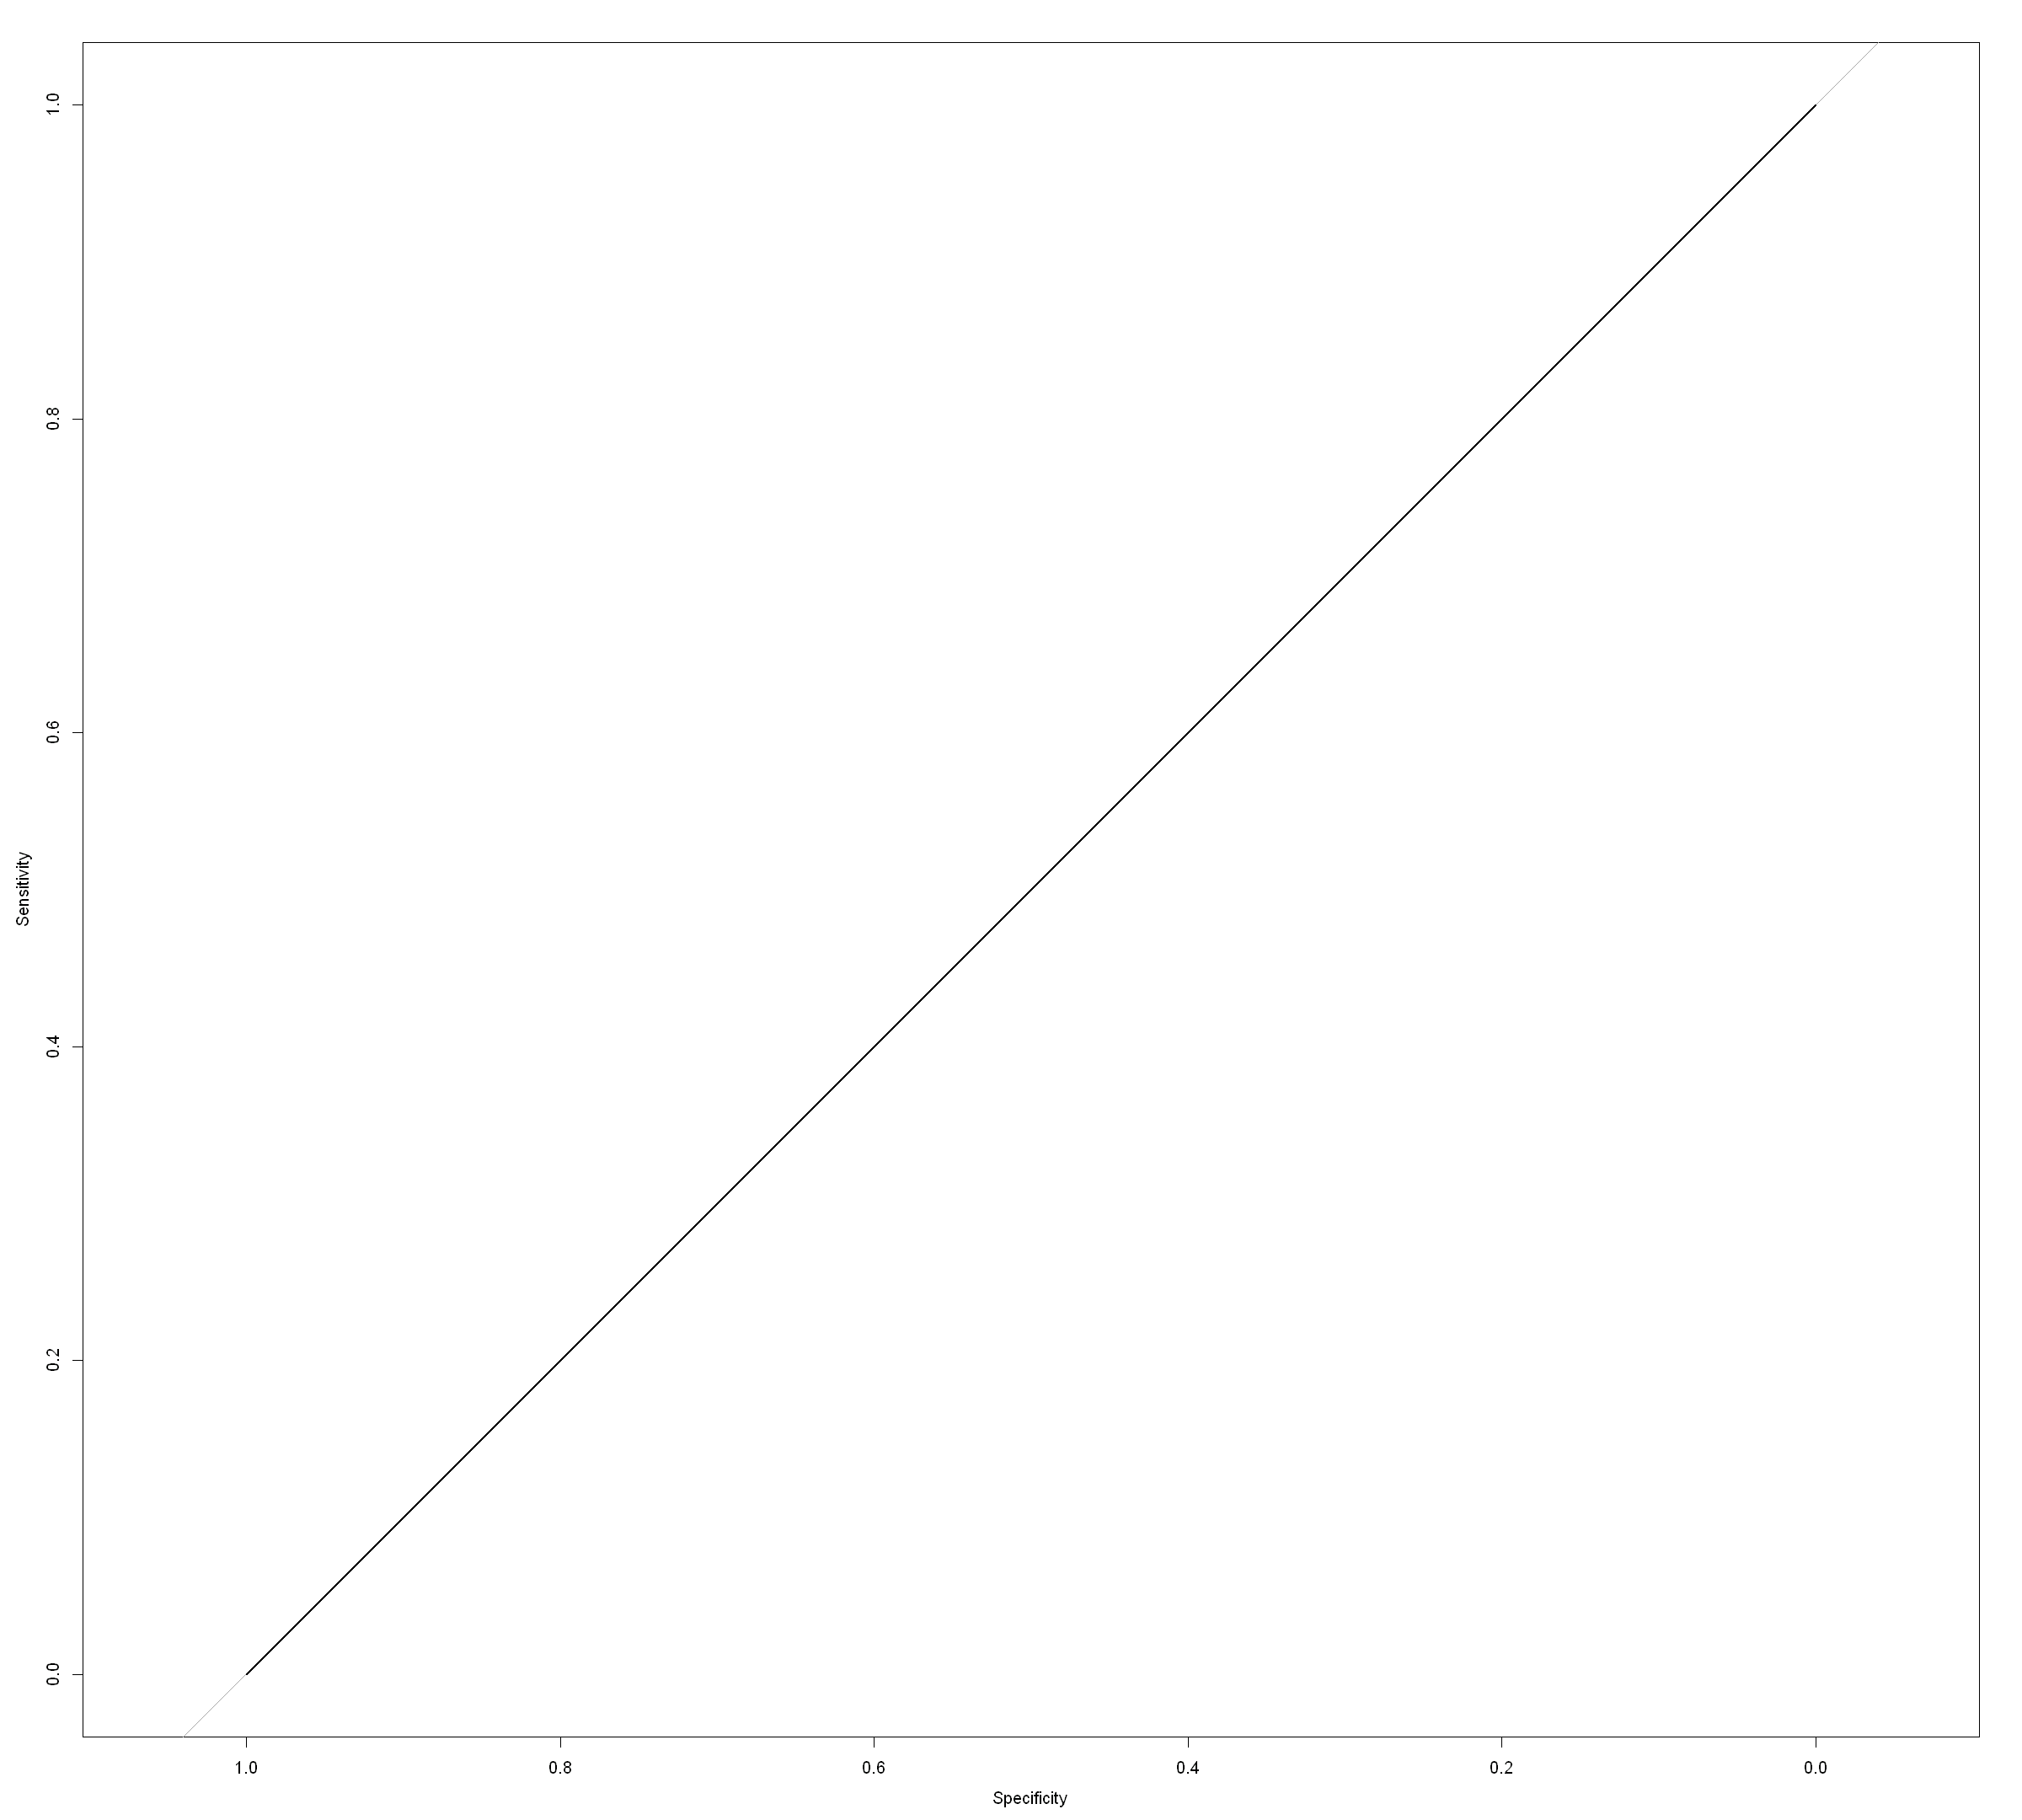

In [1330]:
roc_plot <- roc(OUTCOME ~ pred_validation_pca_svm, data = validation_pca)
plot(roc_plot)

##### e. Neural Networks

###### Build the model

In [1331]:
model14 <- nnet(OUTCOME~.,data = train_pca, size = 10, MaxNWts=10000, trace=FALSE, maxit=100)

###### Get the Predicted outputs

In [1332]:
pred_train_pca_nnet <- predict(model14, train_pca)

In [1333]:
pred_train_pca_nnet <- as.numeric(pred_train_pca_nnet)

###### Confusion Matrix

In [1334]:
table(train_pca$OUTCOME, pred_train_pca_nnet > 0.55, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0  1407    1
     1    18   74

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_train_pca_nnet, data = train_pca)

Data: pred_train_pca_nnet in 1408 controls (OUTCOME 0) < 92 cases (OUTCOME 1).
Area under the curve: 0.9944

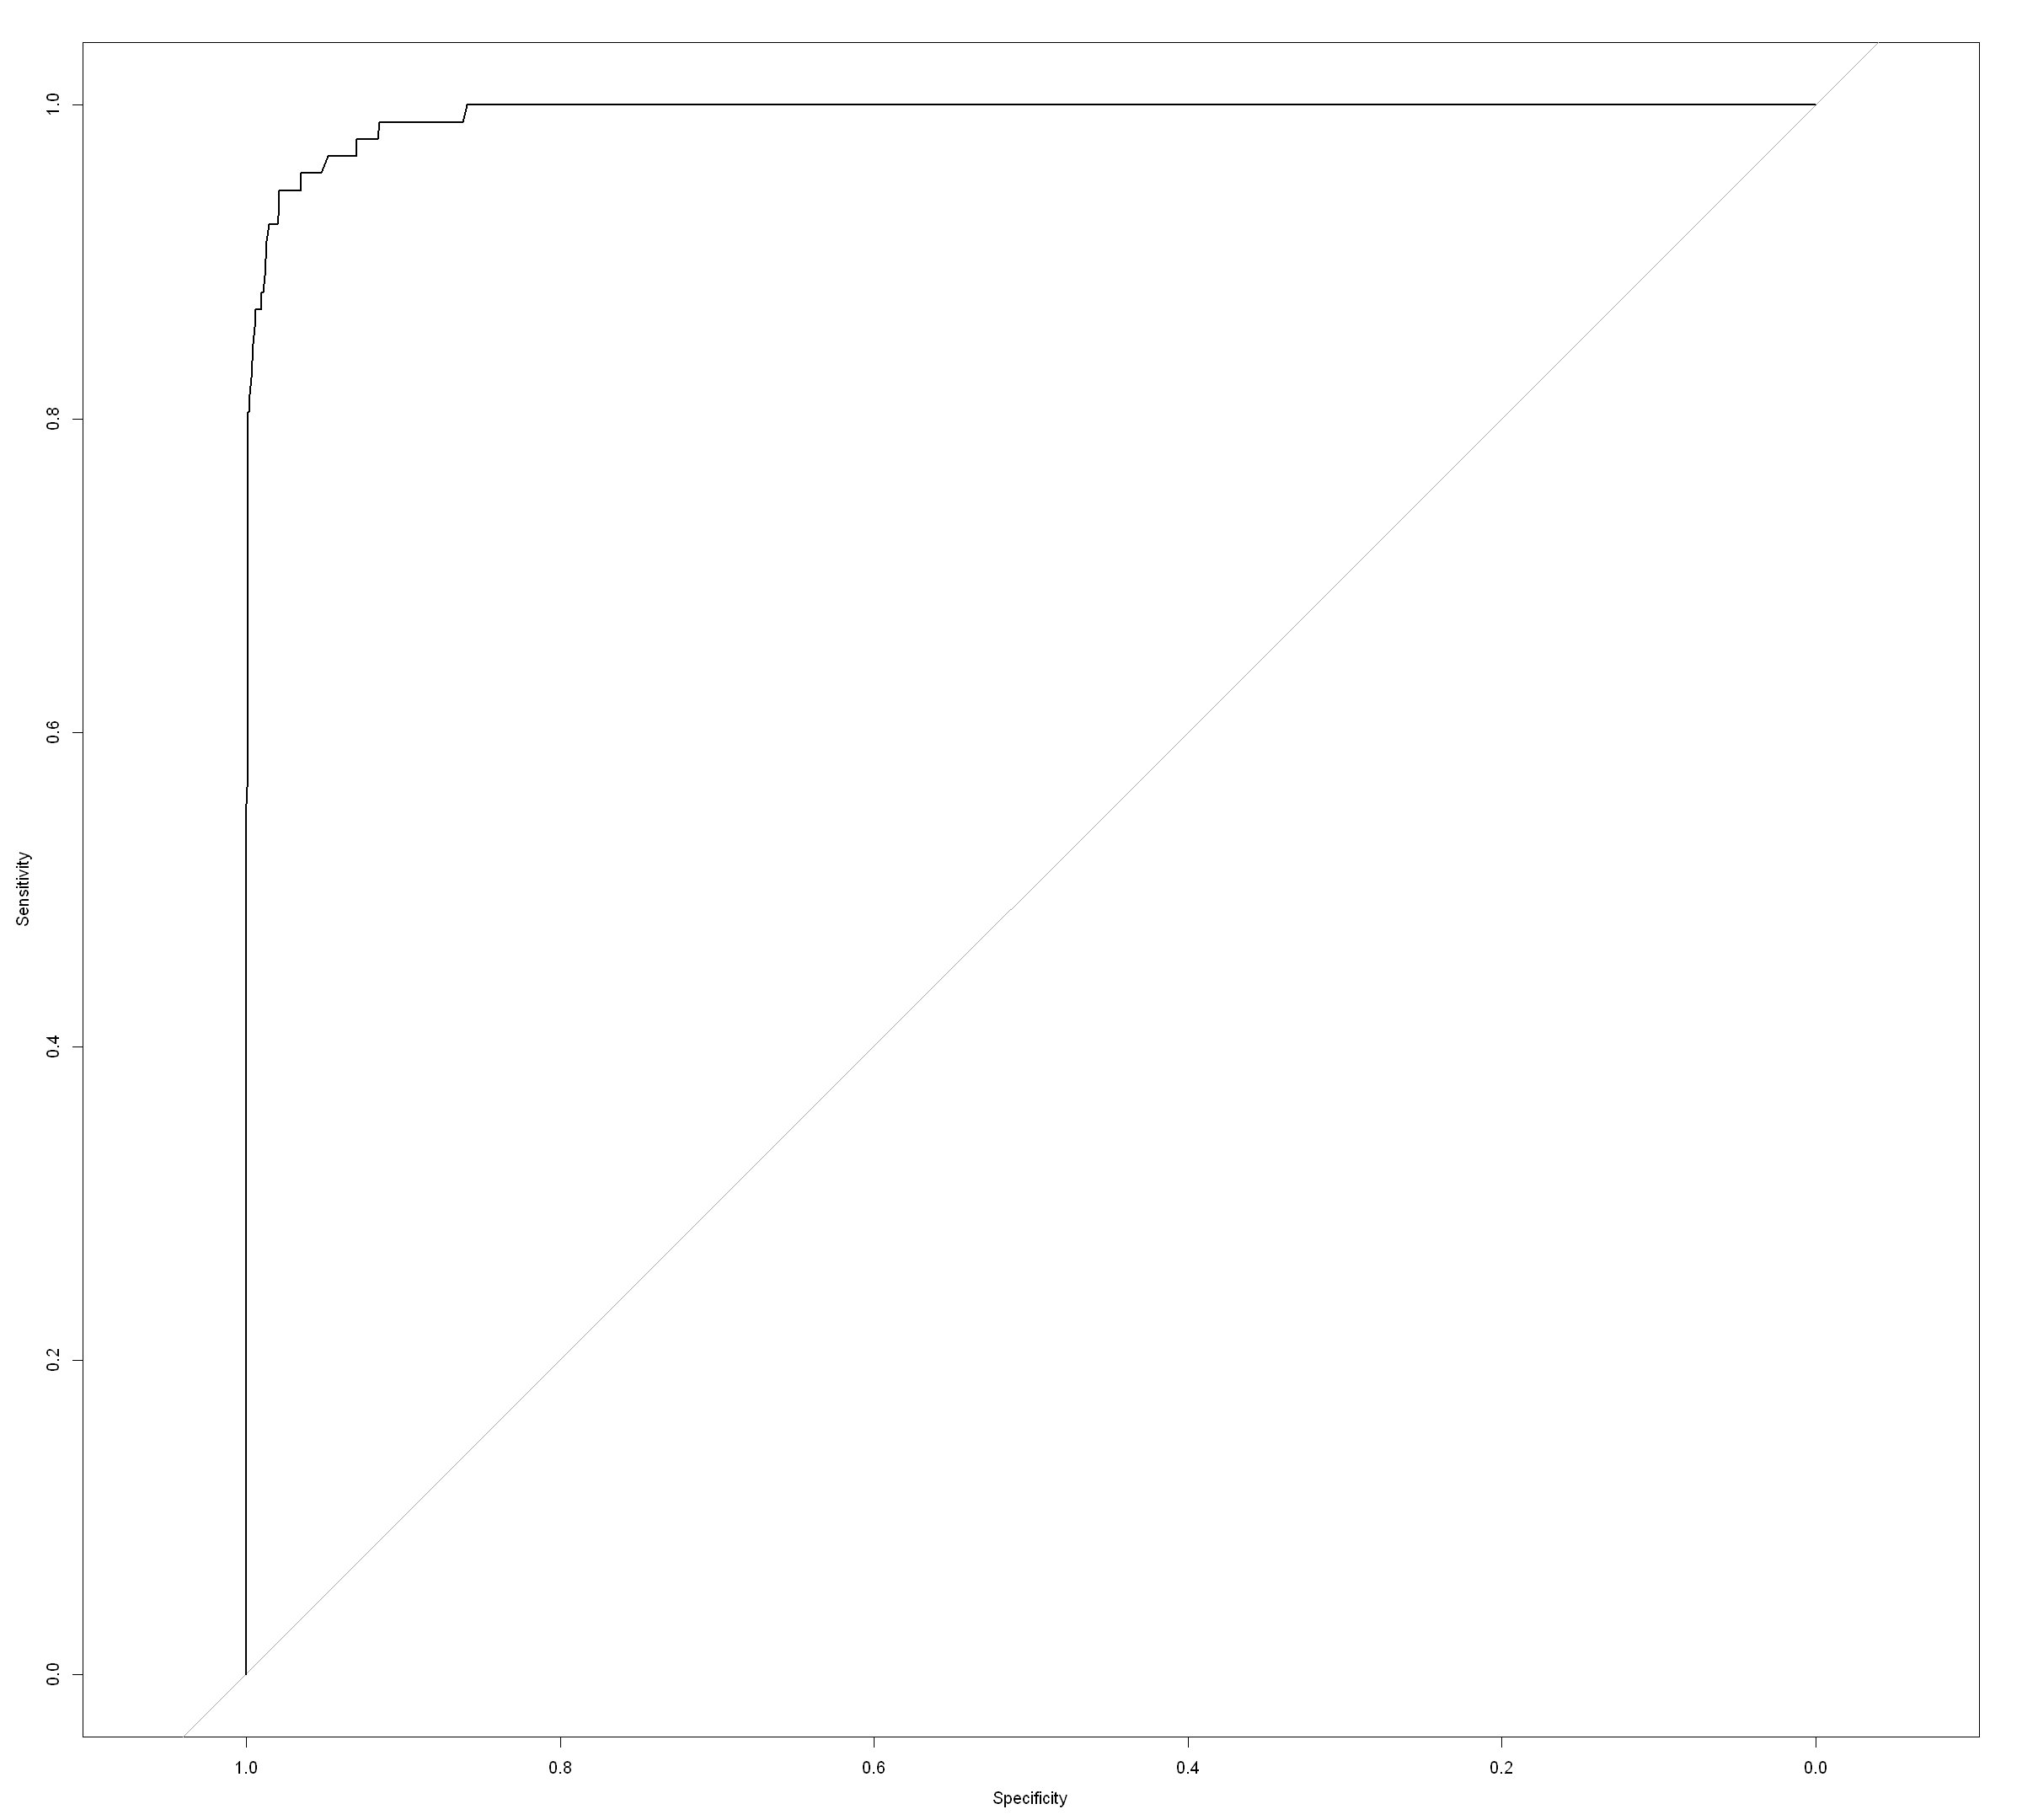

In [1335]:
roc_plot <- roc(OUTCOME ~ pred_train_pca_nnet, data = train_pca)
plot(roc_plot)

###### Get the Predicted outputs (Validation)

In [1336]:
pred_validation_pca_nnet <- predict(model14, validation_pca)

In [1337]:
pred_validation_pca_nnet <- as.numeric(pred_validation_pca_nnet)

###### Confusion Matrix

In [1338]:
table(validation_pca$OUTCOME, pred_validation_pca_nnet > 0.25, dnn = c("Actual", "Predicted"))

      Predicted
Actual FALSE TRUE
     0   435   36
     1    24    5

###### Plot ROC Curve 


Call:
roc.formula(formula = OUTCOME ~ pred_validation_pca_nnet, data = validation_pca)

Data: pred_validation_pca_nnet in 471 controls (OUTCOME 0) < 29 cases (OUTCOME 1).
Area under the curve: 0.6368

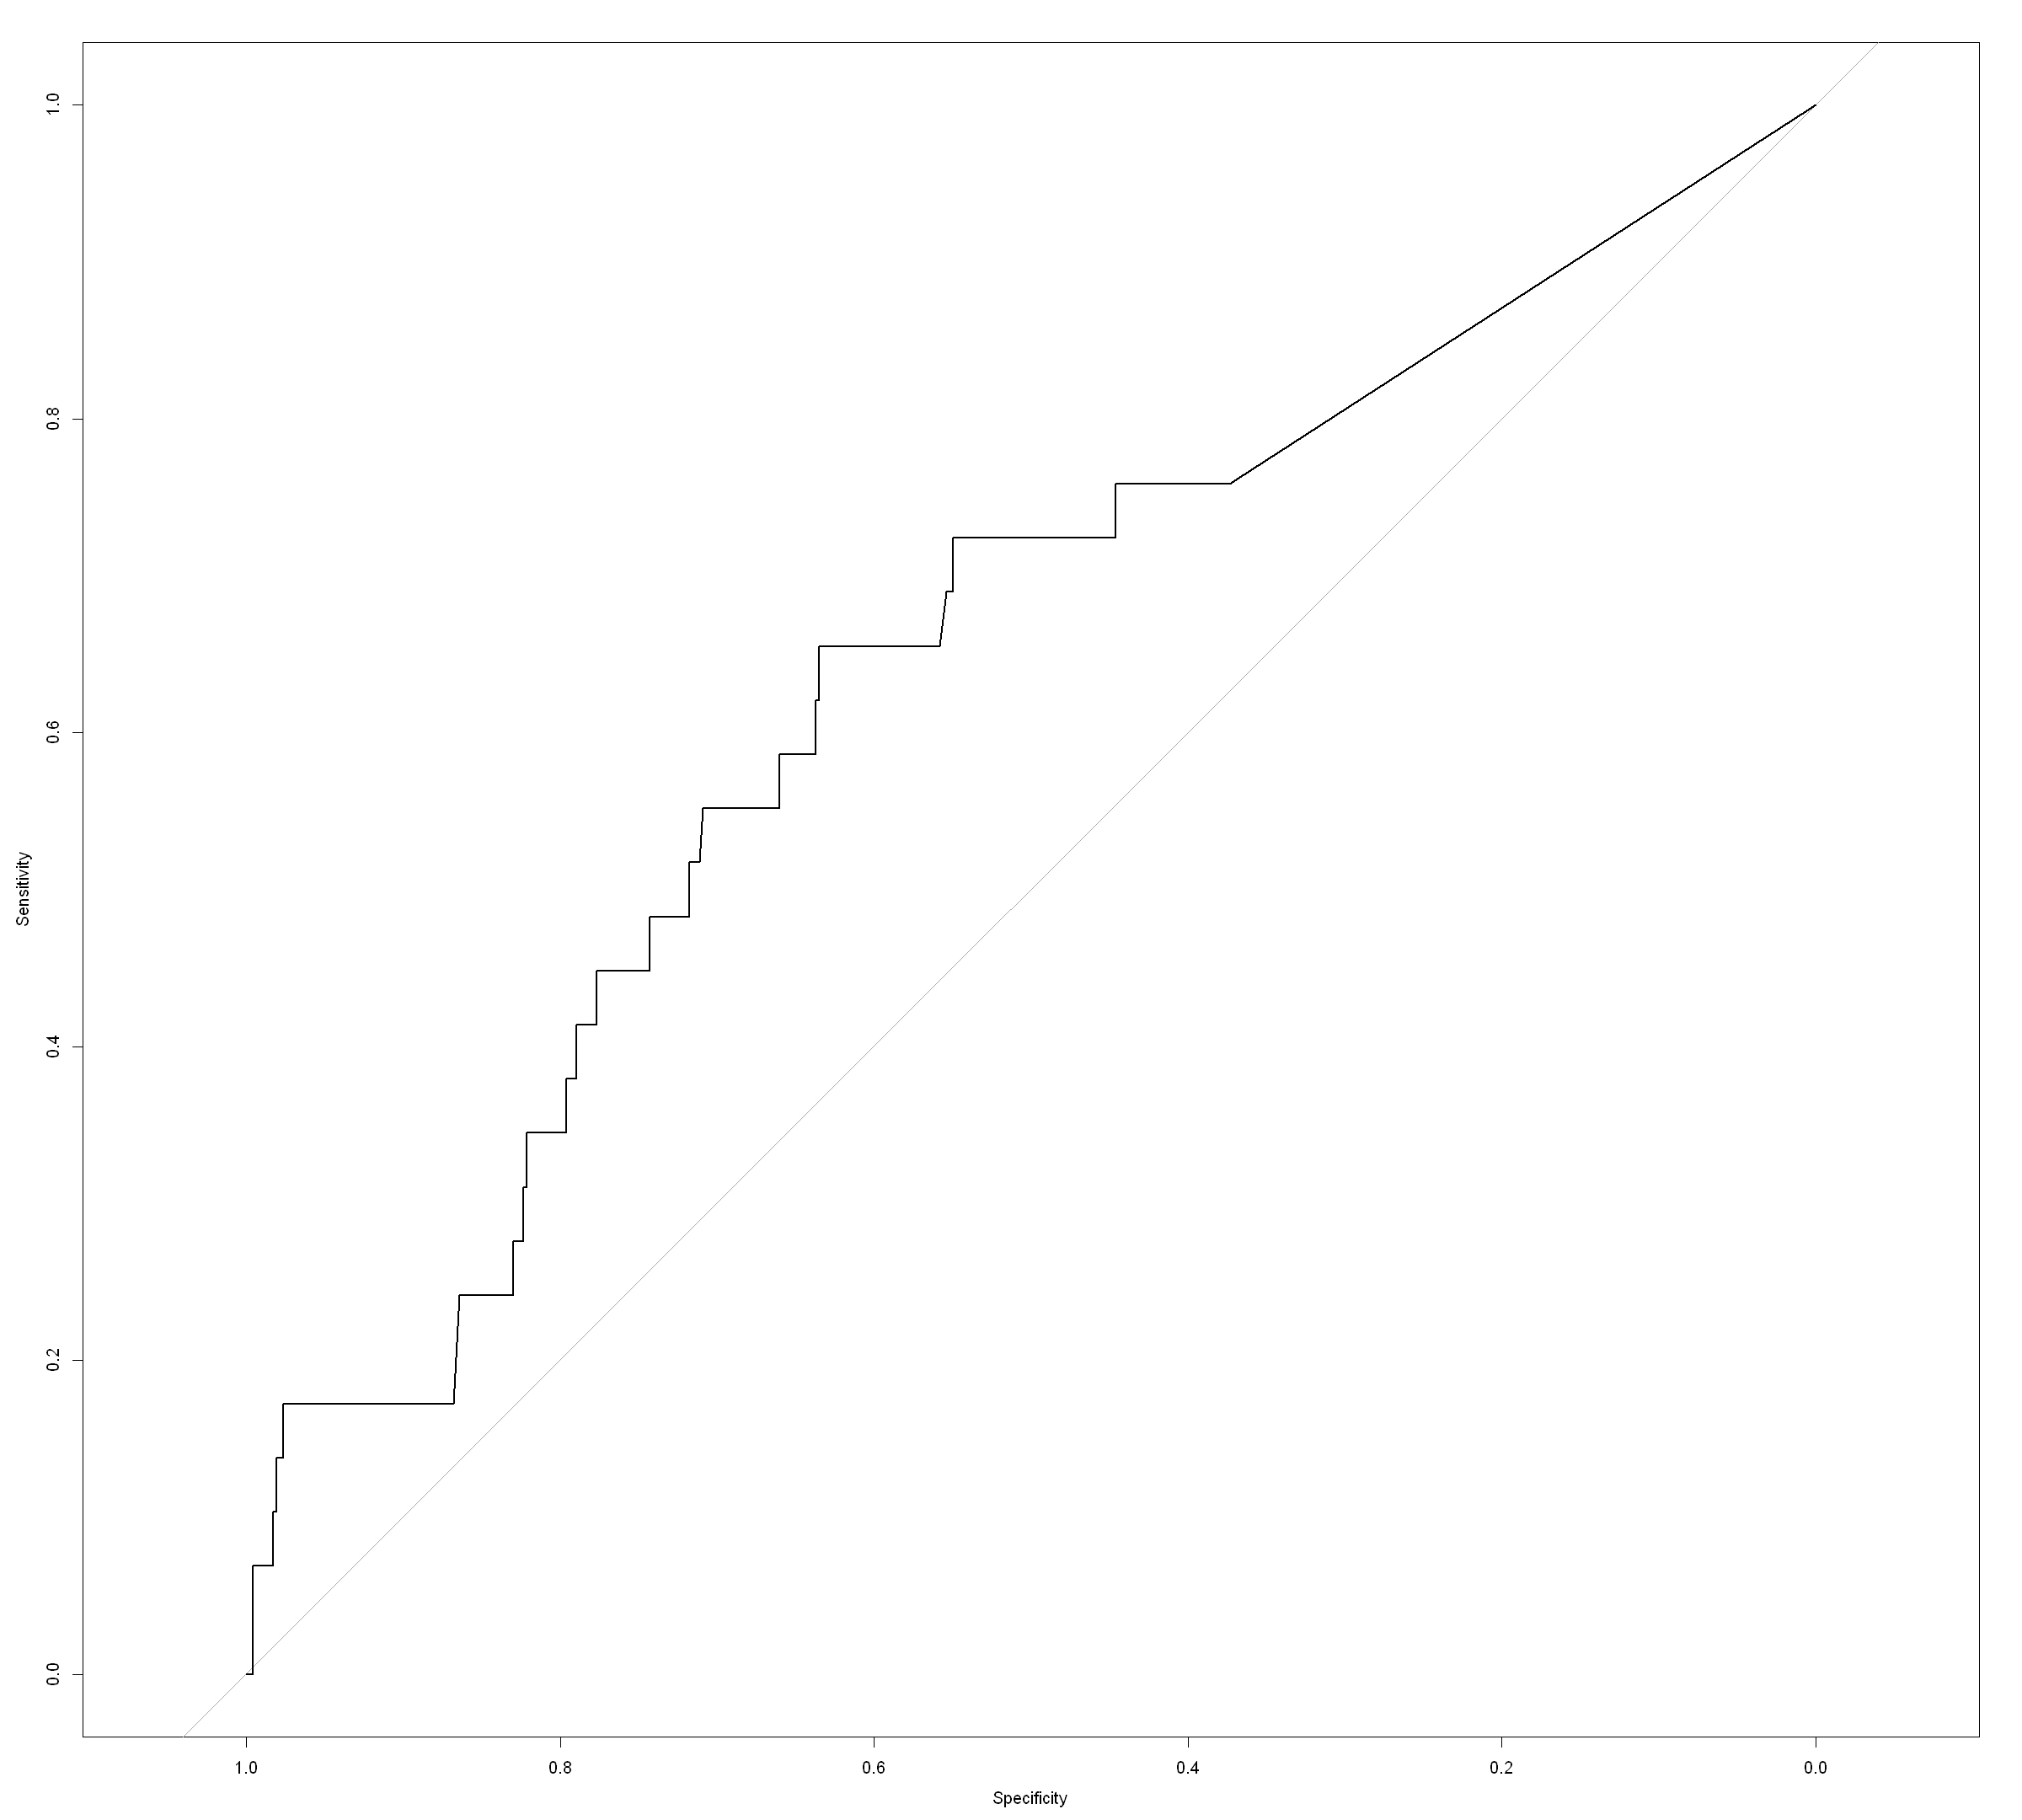

In [1339]:
roc_plot <- roc(OUTCOME ~ pred_validation_pca_nnet, data = validation_pca)
plot(roc_plot)

#### 3. Select the best performing model

We choose the *Logistic Regression model* (model10) with attributes selected through *Principal Component Analysis* to run on the test data 

###### Get the Predicted outputs

In [1340]:
pred_test_pca <- predict(model10, test_pca, type = "response")

###### Save the predicted outputs in a csv file

In [1341]:
test_pca$OUTCOME_pred <- pred_test_pca

In [1342]:
head(test_pca)

,OUTCOME,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,OUTCOME_pred
1,NA,0.218158234343597,-1.30312514391947,1.62307571535544,1.35754829012586,-1.49680739178871,0.532618792727504,2.3772039829243,0.324787004528774,-1.21507131440583,...,-2.64897536823124,-0.517135633499844,-0.228340253081234,-1.21329181490686,1.92617563810873,2.07760713666515,0.0142717175546382,-0.809454229922882,-0.399706499796268,0.0594392844599371
2,NA,-2.05281445234973,-0.766397330865917,2.25210052796492,-0.55839318795372,-0.824971090006077,1.09204998812845,0.323333370881485,-0.133339026692251,-1.34249593211793,...,0.0266875812162585,-0.873817454307816,-0.441198536637948,0.781056046773806,-0.319206547934014,-0.296521574121577,0.28636783664611,-0.0523356076925083,-0.260848131131825,0.0584402873310041
3,NA,-7.06288698391796,5.08434281730075,-3.37035581278971,1.60255047404603,-0.953515715271784,-1.51454399595097,2.50861542541261,-1.51258102799102,-0.576053084119094,...,0.315646791614819,0.0336438651788172,0.734912108723207,-0.672821561953717,0.602914300066165,-0.0702012726407873,0.443082607634505,-0.91976133128577,-0.191447203037901,0.00951525195108481
4,NA,5.84438659564019,-0.325469529687857,-0.386585735258483,-0.195072226040613,-0.924454126570181,-1.26177339112216,-1.7629955360979,-1.95655901131744,-0.273066701574939,...,0.251782371849081,-1.29337034210863,-0.00872946229288249,-0.753908106209039,-0.307139491949625,1.70268319090685,0.0378868174942731,-1.55992103072943,2.15142196717911,0.0382722586926724
5,NA,2.86028382743359,3.25338998822249,-1.00252806052017,-0.756421978466176,0.492614421697984,0.58005366238439,1.34286639701167,0.435902213338428,0.950312622707965,...,-0.0243487146162434,-0.175962115327619,1.02163305739256,1.66750615234472,1.34148561559026,0.654479662979904,0.279527628641351,-0.140859146743828,1.12109294871453,0.137594664356189
6,NA,0.843258605924455,-0.749478139973177,0.254837297285228,0.0374354930682618,0.408493707771609,-0.346861119107317,1.52391108793675,-0.0828936845767773,0.768626525283481,...,0.00313575273722456,0.218312880552308,0.497897690373903,0.70954413051587,0.483368819306854,0.511122141354005,-0.0560038786704374,0.165098753126526,0.152271900655802,0.107375476898131


In [1343]:
test_pca$OUTCOME <- NULL
test_pca_total <- cbind(test, test_pca)

In [1344]:
write.csv(test_pca_total, 'Test_PCA_Predicted.csv')

Note: Please refer the OUTCOME_pred_class output for the final predicted value class (0 = NO, 1 = YES) of variable OUTCOME. Please note that we have taken the predicted values greater than 0.25 as 1 and less than 0.25 as 0 in OUTCOME_pred 